In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os
from os import getcwd
from os.path import join
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, join(getcwd(), "../module_code"))

import data.load
import cli_utils 
from data.utils import loading_message

sys.argv = [sys.argv[0]]
cli_utils.load_cli_args("../options.yml")
args = cli_utils.init_cli_args()

args.cedars_crrt_data_dir = "/radraid/jeffreyfeng/CRRT_Project/Data/Cedars"
args.ucla_crrt_data_dir = "/radraid/jeffreyfeng/CRRT_Project/Data/UCLA"

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Outcomes

### Loading Outcomes

In [2]:
outcomes = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'CRRT Deidentified 2015-2021YTD_VF.xlsx'), sheet_name="2015-2021 YTD")
outcomes_ucla = pd.read_excel(os.path.join(args.ucla_crrt_data_dir,'CRRT Deidentified 2015-2021YTD_VF.xlsx'), sheet_name="2015-2021 YTD")

# print(outcomes[outcomes.duplicated(subset=['PAT_ID','End Date','CRRT Total Days'])])
# ids = outcomes['IP_PATIENT_ID']
# print(outcomes[ids.isin(outcomes[outcomes.duplicated(subset=['IP_PATIENT_ID','End Date','CRRT Total Days'])]['IP_PATIENT_ID'])].sort_values("IP_PATIENT_ID"))

print(outcomes.columns)
print(outcomes_ucla.columns)
print(len(outcomes))
print(len(outcomes_ucla))

outcomes = data.load.load_outcomes(args.cedars_crrt_data_dir, ["IP_PATIENT_ID", "Start Date"])
outcomes_ucla = data.load.load_outcomes(args.ucla_crrt_data_dir, ["IP_PATIENT_ID", "Start Date"])

print(outcomes.columns)
print(outcomes_ucla.columns)
print(len(outcomes))
print(len(outcomes_ucla))

mealy | INFO - *****Loading Outcomes...*****


Index(['Month', 'Hospital name', 'IP_PATIENT_ID', 'CRRT Total Days',
       'End Date', 'Machine', 'ICU', 'Recov. renal funct.',
       'Transitioned to HD', 'Comfort Care', 'Expired ', 'Start Date'],
      dtype='object')
Index(['Month', 'Hospital name', 'IP_PATIENT_ID', 'CRRT Total Days',
       'End Date', 'Machine', 'ICU', 'Recov. renal funct.',
       'Transitioned to HD', 'Comfort Care', 'Expired ', 'Unnamed: 11',
       'Start Date', 'Age'],
      dtype='object')
3267
4210


mealy | INFO - *****Loading Outcomes...*****


Index(['Month', 'Hospital name', 'CRRT Total Days', 'End Date', 'Machine',
       'ICU', 'Recov. renal funct.', 'Transitioned to HD', 'Comfort Care',
       'Expired ', 'recommend_crrt', 'CRRT Year', 'Num Prev CRRT Treatments'],
      dtype='object')
Index(['Month', 'Hospital name', 'CRRT Total Days', 'End Date', 'Machine',
       'ICU', 'Recov. renal funct.', 'Transitioned to HD', 'Comfort Care',
       'Expired ', 'Unnamed: 11', 'recommend_crrt', 'CRRT Year',
       'Num Prev CRRT Treatments'],
      dtype='object')
3263
4161


# Table 1

## Controls 

In [3]:
from data.load import load_procedures, construct_outcomes
from functools import reduce
from pandas import merge

procedures_df = load_procedures(args.ucla_control_data_dir, aggregate=False)
outcomes_control = construct_outcomes(procedures_df, ["IP_PATIENT_ID", "Start Date"])

print(len(outcomes_control))
print(outcomes_control.columns)

mealy | INFO - *****Loading Procedures...*****


4725
Index(['recommend_crrt', 'CRRT Total Days', 'Num Prev CRRT Treatments',
       'CRRT Year', 'End Date'],
      dtype='object')


In [4]:
print(outcomes_ucla.index.get_level_values(1).min())
print(outcomes_ucla.index.get_level_values(1).max())
print(outcomes.index.get_level_values(1).min())
print(outcomes.index.get_level_values(1).max())
print(outcomes_control.index.get_level_values(1).min())
print(outcomes_control.index.get_level_values(1).max())

2014-11-08 00:00:00
2021-08-31 00:00:00
2016-06-19 00:00:00
2021-12-29 00:00:00
2006-01-06 00:00:00
2022-07-13 00:00:00


## Indicators

In [5]:
from data.longitudinal_utils import (
    get_time_window_mask
)

import data.longitudinal_features as lf
from typing import Union
from data.utils import get_pt_type_indicators

window = get_time_window_mask(outcomes.copy(), {'YEARS': 0, 'MONTHS': 0, 'DAYS': 10}, None, 'End Date', 0)
ucla_window = get_time_window_mask(outcomes_ucla.copy(), {'YEARS': 0, 'MONTHS': 0, 'DAYS': 10}, None, 'End Date', 0)
control_window = get_time_window_mask(outcomes_control.copy(), {'YEARS': 0, 'MONTHS': 0, 'DAYS': 10}, None, 'End Date', 0)


In [6]:
diagnoses = lf.load_diagnoses(args.cedars_crrt_data_dir,
                        time_window = window)

ucla_diagnoses = lf.load_diagnoses(args.ucla_crrt_data_dir,
                        time_window = ucla_window)

control_diagnoses = lf.load_diagnoses(args.ucla_control_data_dir,
                        time_window = control_window)

mealy | INFO - *****Loading Diagnoses...*****


Empty DataFrame
Columns: [Start Date, Window Start, Window End]
Index: []
5
[              Start Date Window Start Window End
IP_PATIENT_ID                                   
38709252      2021-01-24   2021-01-14 2021-01-29
59619682      2019-02-26   2019-02-16 2019-02-28
92506080      2020-06-20   2020-06-10 2020-07-22
143830239     2019-10-08   2019-09-28 2019-11-16
232530773     2019-12-29   2019-12-19 2019-12-30
...                  ...          ...        ...
99802952636   2019-01-28   2019-01-18 2019-02-01
99830359295   2016-11-17   2016-11-07 2016-11-25
99840977905   2017-11-08   2017-10-29 2017-11-09
99943357591   2021-09-15   2021-09-05 2021-09-21
99961773631   2020-07-10   2020-06-30 2020-07-13

[2812 rows x 3 columns],               Start Date Window Start Window End
IP_PATIENT_ID                                   
38709252             NaT          NaT        NaT
59619682             NaT          NaT        NaT
92506080             NaT          NaT        NaT
143830239      

mealy | INFO - Dropping 45211 rows outside of time window.
mealy | INFO - *****Loading Diagnoses...*****


Empty DataFrame
Columns: [IP_PATIENT_ID, DIAGNOSIS_DATE, Start Date, dx_CCS_CODE_1, dx_CCS_CODE_10, dx_CCS_CODE_100, dx_CCS_CODE_101, dx_CCS_CODE_102, dx_CCS_CODE_103, dx_CCS_CODE_104, dx_CCS_CODE_105, dx_CCS_CODE_106, dx_CCS_CODE_107, dx_CCS_CODE_108, dx_CCS_CODE_109, dx_CCS_CODE_11, dx_CCS_CODE_110, dx_CCS_CODE_111, dx_CCS_CODE_112, dx_CCS_CODE_113, dx_CCS_CODE_114, dx_CCS_CODE_115, dx_CCS_CODE_116, dx_CCS_CODE_117, dx_CCS_CODE_118, dx_CCS_CODE_119, dx_CCS_CODE_12, dx_CCS_CODE_120, dx_CCS_CODE_121, dx_CCS_CODE_122, dx_CCS_CODE_123, dx_CCS_CODE_124, dx_CCS_CODE_125, dx_CCS_CODE_126, dx_CCS_CODE_127, dx_CCS_CODE_128, dx_CCS_CODE_129, dx_CCS_CODE_13, dx_CCS_CODE_130, dx_CCS_CODE_131, dx_CCS_CODE_132, dx_CCS_CODE_133, dx_CCS_CODE_134, dx_CCS_CODE_135, dx_CCS_CODE_136, dx_CCS_CODE_137, dx_CCS_CODE_138, dx_CCS_CODE_139, dx_CCS_CODE_14, dx_CCS_CODE_140, dx_CCS_CODE_141, dx_CCS_CODE_142, dx_CCS_CODE_143, dx_CCS_CODE_144, dx_CCS_CODE_145, dx_CCS_CODE_146, dx_CCS_CODE_147, dx_CCS_CODE_148, dx_

mealy | INFO - Dropping 1398335 rows outside of time window.


                           IP_PATIENT_ID DIAGNOSIS_DATE Start Date  \
123422  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
123423  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
123424  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
123425  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
123426  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
...                                  ...            ...        ...   
123493  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
123494  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
123495  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
123496  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
123497  C5AAA73BF48812D896DA53D5294E2C58     2021-06-08 2021-05-29   

        dx_CCS_CODE_1  dx_CCS_CODE_10  dx_CCS_CODE_100  dx_CCS_CODE_101  \
123422              0               0                0                0   
123423   

mealy | INFO - *****Loading Diagnoses...*****


Empty DataFrame
Columns: [Start Date, Window Start, Window End]
Index: []
1
[                                 Start Date Window Start Window End
IP_PATIENT_ID                                                      
00000064C94859EB973942C862550ABA 2020-07-14   2020-07-04 2020-07-14
000001070C909F1D89C349A52370F3C3 2020-04-29   2020-04-19 2020-04-29
000003BE051B025E04F32DBF8FF7334E 2017-08-04   2017-07-25 2017-08-04
000005F8F2265713B8C18DE5C273D03B 2017-10-19   2017-10-09 2017-10-19
000008E26F8F14E5099662DDB778C698 2017-10-31   2017-10-21 2017-10-31
...                                     ...          ...        ...
C91F02E25A3EBE4CD96F003668587FF9 2012-11-04   2012-10-25 2012-11-04
D2105B0EC7E6A4D4FE4370522C72B276 2007-07-03   2007-06-23 2007-07-03
F2B64924154BA4FA5D1123186135A1CE 2012-09-10   2012-08-31 2012-09-10
FE50F3FA3FDA9FC89C48C965D4743760 2009-11-04   2009-10-25 2009-11-04
FFA9E015C8296AA2696A4BA7D0E7D55F 2010-09-23   2010-09-13 2010-09-23

[4725 rows x 3 columns]]


mealy | INFO - Dropping 1998796 rows outside of time window.


Empty DataFrame
Columns: [IP_PATIENT_ID, DIAGNOSIS_DATE, Start Date, dx_CCS_CODE_1, dx_CCS_CODE_10, dx_CCS_CODE_100, dx_CCS_CODE_101, dx_CCS_CODE_102, dx_CCS_CODE_103, dx_CCS_CODE_104, dx_CCS_CODE_105, dx_CCS_CODE_106, dx_CCS_CODE_107, dx_CCS_CODE_108, dx_CCS_CODE_109, dx_CCS_CODE_11, dx_CCS_CODE_110, dx_CCS_CODE_111, dx_CCS_CODE_112, dx_CCS_CODE_113, dx_CCS_CODE_114, dx_CCS_CODE_115, dx_CCS_CODE_116, dx_CCS_CODE_117, dx_CCS_CODE_118, dx_CCS_CODE_119, dx_CCS_CODE_12, dx_CCS_CODE_120, dx_CCS_CODE_121, dx_CCS_CODE_122, dx_CCS_CODE_123, dx_CCS_CODE_124, dx_CCS_CODE_125, dx_CCS_CODE_126, dx_CCS_CODE_127, dx_CCS_CODE_128, dx_CCS_CODE_129, dx_CCS_CODE_13, dx_CCS_CODE_130, dx_CCS_CODE_131, dx_CCS_CODE_132, dx_CCS_CODE_133, dx_CCS_CODE_134, dx_CCS_CODE_135, dx_CCS_CODE_136, dx_CCS_CODE_137, dx_CCS_CODE_138, dx_CCS_CODE_139, dx_CCS_CODE_14, dx_CCS_CODE_140, dx_CCS_CODE_141, dx_CCS_CODE_142, dx_CCS_CODE_143, dx_CCS_CODE_144, dx_CCS_CODE_145, dx_CCS_CODE_146, dx_CCS_CODE_147, dx_CCS_CODE_148, dx_

In [7]:
problems = lf.load_problems(args.cedars_crrt_data_dir, 
                        time_window = window)

ucla_problems = lf.load_problems(args.ucla_crrt_data_dir, 
                        time_window = ucla_window)

control_problems = lf.load_problems(args.ucla_control_data_dir,
                        time_window = control_window)

mealy | INFO - *****Loading Problems...*****


Empty DataFrame
Columns: [Start Date, Window Start, Window End]
Index: []
5
[              Start Date Window Start Window End
IP_PATIENT_ID                                   
38709252      2021-01-24   2021-01-14 2021-01-29
59619682      2019-02-26   2019-02-16 2019-02-28
92506080      2020-06-20   2020-06-10 2020-07-22
143830239     2019-10-08   2019-09-28 2019-11-16
232530773     2019-12-29   2019-12-19 2019-12-30
...                  ...          ...        ...
99802952636   2019-01-28   2019-01-18 2019-02-01
99830359295   2016-11-17   2016-11-07 2016-11-25
99840977905   2017-11-08   2017-10-29 2017-11-09
99943357591   2021-09-15   2021-09-05 2021-09-21
99961773631   2020-07-10   2020-06-30 2020-07-13

[2812 rows x 3 columns],               Start Date Window Start Window End
IP_PATIENT_ID                                   
38709252             NaT          NaT        NaT
59619682             NaT          NaT        NaT
92506080             NaT          NaT        NaT
143830239      

mealy | INFO - Dropping 29698 rows outside of time window.
mealy | INFO - *****Loading Problems...*****


Empty DataFrame
Columns: [IP_PATIENT_ID, DATE_OF_ENTRY, Start Date, pr_CCS_CODE_1, pr_CCS_CODE_10, pr_CCS_CODE_100, pr_CCS_CODE_101, pr_CCS_CODE_102, pr_CCS_CODE_103, pr_CCS_CODE_104, pr_CCS_CODE_105, pr_CCS_CODE_106, pr_CCS_CODE_107, pr_CCS_CODE_108, pr_CCS_CODE_109, pr_CCS_CODE_11, pr_CCS_CODE_110, pr_CCS_CODE_111, pr_CCS_CODE_112, pr_CCS_CODE_113, pr_CCS_CODE_114, pr_CCS_CODE_115, pr_CCS_CODE_116, pr_CCS_CODE_117, pr_CCS_CODE_118, pr_CCS_CODE_12, pr_CCS_CODE_120, pr_CCS_CODE_121, pr_CCS_CODE_122, pr_CCS_CODE_123, pr_CCS_CODE_125, pr_CCS_CODE_126, pr_CCS_CODE_127, pr_CCS_CODE_128, pr_CCS_CODE_129, pr_CCS_CODE_13, pr_CCS_CODE_130, pr_CCS_CODE_131, pr_CCS_CODE_132, pr_CCS_CODE_133, pr_CCS_CODE_134, pr_CCS_CODE_135, pr_CCS_CODE_136, pr_CCS_CODE_137, pr_CCS_CODE_138, pr_CCS_CODE_139, pr_CCS_CODE_14, pr_CCS_CODE_140, pr_CCS_CODE_141, pr_CCS_CODE_143, pr_CCS_CODE_144, pr_CCS_CODE_145, pr_CCS_CODE_146, pr_CCS_CODE_147, pr_CCS_CODE_148, pr_CCS_CODE_149, pr_CCS_CODE_15, pr_CCS_CODE_151, pr_CC

mealy | WARNING - Unexpected encoding in Problem_Lists.txt. Encoding with cp1252.


                                             Start Date  \
IP_PATIENT_ID                                             
C5AAA73BF48812D896DA53D5294E2C58  [2021-05-29 00:00:00]   

                                           Window Start             Window End  
IP_PATIENT_ID                                                                   
C5AAA73BF48812D896DA53D5294E2C58  [2021-05-19 00:00:00]  [2021-07-10 00:00:00]  
9
[                                 Start Date Window Start Window End
IP_PATIENT_ID                                                      
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11   2020-02-01 2020-02-17
000A7F3313811793921F5292DED8952B 2020-03-01   2020-02-20 2020-03-17
00410D475813633FCD90F115426AC192 2021-06-27   2021-06-17 2021-07-09
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20   2015-08-10 2015-08-25
00685FAEF8CE2B7178D920E9C958791B 2019-09-14   2019-09-04 2019-09-17
...                                     ...          ...        ...
FFBB88418EEE2BE893542B6BA5A6471A

mealy | INFO - Dropping 5559096 rows outside of time window.


Empty DataFrame
Columns: [IP_PATIENT_ID, DATE_OF_ENTRY, Start Date, pr_CCS_CODE_1, pr_CCS_CODE_10, pr_CCS_CODE_100, pr_CCS_CODE_101, pr_CCS_CODE_102, pr_CCS_CODE_103, pr_CCS_CODE_104, pr_CCS_CODE_105, pr_CCS_CODE_106, pr_CCS_CODE_107, pr_CCS_CODE_108, pr_CCS_CODE_109, pr_CCS_CODE_11, pr_CCS_CODE_110, pr_CCS_CODE_111, pr_CCS_CODE_112, pr_CCS_CODE_113, pr_CCS_CODE_114, pr_CCS_CODE_115, pr_CCS_CODE_116, pr_CCS_CODE_117, pr_CCS_CODE_118, pr_CCS_CODE_119, pr_CCS_CODE_120, pr_CCS_CODE_121, pr_CCS_CODE_122, pr_CCS_CODE_123, pr_CCS_CODE_124, pr_CCS_CODE_125, pr_CCS_CODE_126, pr_CCS_CODE_127, pr_CCS_CODE_128, pr_CCS_CODE_129, pr_CCS_CODE_13, pr_CCS_CODE_130, pr_CCS_CODE_131, pr_CCS_CODE_132, pr_CCS_CODE_133, pr_CCS_CODE_134, pr_CCS_CODE_135, pr_CCS_CODE_136, pr_CCS_CODE_137, pr_CCS_CODE_138, pr_CCS_CODE_139, pr_CCS_CODE_14, pr_CCS_CODE_140, pr_CCS_CODE_141, pr_CCS_CODE_142, pr_CCS_CODE_143, pr_CCS_CODE_144, pr_CCS_CODE_145, pr_CCS_CODE_146, pr_CCS_CODE_147, pr_CCS_CODE_148, pr_CCS_CODE_149, pr_

mealy | INFO - *****Loading Problems...*****
mealy | INFO - Dropping 62561 rows outside of time window.


Empty DataFrame
Columns: [Start Date, Window Start, Window End]
Index: []
1
[                                 Start Date Window Start Window End
IP_PATIENT_ID                                                      
00000064C94859EB973942C862550ABA 2020-07-14   2020-07-04 2020-07-14
000001070C909F1D89C349A52370F3C3 2020-04-29   2020-04-19 2020-04-29
000003BE051B025E04F32DBF8FF7334E 2017-08-04   2017-07-25 2017-08-04
000005F8F2265713B8C18DE5C273D03B 2017-10-19   2017-10-09 2017-10-19
000008E26F8F14E5099662DDB778C698 2017-10-31   2017-10-21 2017-10-31
...                                     ...          ...        ...
C91F02E25A3EBE4CD96F003668587FF9 2012-11-04   2012-10-25 2012-11-04
D2105B0EC7E6A4D4FE4370522C72B276 2007-07-03   2007-06-23 2007-07-03
F2B64924154BA4FA5D1123186135A1CE 2012-09-10   2012-08-31 2012-09-10
FE50F3FA3FDA9FC89C48C965D4743760 2009-11-04   2009-10-25 2009-11-04
FFA9E015C8296AA2696A4BA7D0E7D55F 2010-09-23   2010-09-13 2010-09-23

[4725 rows x 3 columns]]
Empty DataFra

In [8]:
######### CEDARS
features = reduce(
        lambda df1, df2: merge(df1, df2, on=["IP_PATIENT_ID", "Start Date"], how="outer"), [diagnoses,problems]
    )
cedars_features_with_outcomes = features.join(outcomes, how="outer")
cedars_features_with_outcomes = get_pt_type_indicators(cedars_features_with_outcomes)

static_df = data.load.load_static_features(args.cedars_crrt_data_dir).set_index("IP_PATIENT_ID")
temp_df = cedars_features_with_outcomes.reset_index().set_index('IP_PATIENT_ID')
cedars_features_with_outcomes = static_df.join(temp_df, how="right")
cedars_features_with_outcomes['RACE'] = cedars_features_with_outcomes[['RACE_American Indian or Alaska Native', 'RACE_Asian',
       'RACE_Black or African American', 'RACE_Multiple Races',
       'RACE_Native Hawaiian or Other Pacific Islander', 'RACE_Unknown','RACE_White or Caucasian']].idxmax(axis=1)
cedars_features_with_outcomes['outcome'] = cedars_features_with_outcomes[['Recov. renal funct.', 'Transitioned to HD', 'Comfort Care',
       'Expired ']].idxmax(axis=1)

cedars_features_with_outcomes.replace(
       {'recommend_crrt': {0: 'Do not recommend', 1: 'Recommend'},
        'SEX': {0: 'Male', 1: 'Female'},
        'ETHNICITY': {0: 'Not Hispanic or Latino', 1: 'Hispanic or Latino'}}
       , inplace=True)

######### UCLA
features = reduce(
        lambda df1, df2: merge(df1, df2, on=["IP_PATIENT_ID", "Start Date"], how="outer"), [ucla_diagnoses,ucla_problems]
    )
ucla_features_with_outcomes = features.join(outcomes_ucla, how="outer")
ucla_features_with_outcomes = get_pt_type_indicators(ucla_features_with_outcomes)

static_df = data.load.load_static_features(args.ucla_crrt_data_dir).set_index("IP_PATIENT_ID")
temp_df = ucla_features_with_outcomes.reset_index().set_index('IP_PATIENT_ID')
ucla_features_with_outcomes = static_df.join(temp_df, how="inner")
# print(ucla_features_with_outcomes.columns)
ucla_features_with_outcomes['RACE'] = ucla_features_with_outcomes[['RACE_American Indian or Alaska Native', 'RACE_Asian',
       'RACE_Black or African American', 'RACE_Multiple Races',
       'RACE_Native Hawaiian or Other Pacific Islander', 'RACE_Unknown','RACE_White or Caucasian']].idxmax(axis=1)
ucla_features_with_outcomes['outcome'] = ucla_features_with_outcomes[['Recov. renal funct.', 'Transitioned to HD', 'Comfort Care',
       'Expired ']].idxmax(axis=1)
ucla_features_with_outcomes.replace(
       {'recommend_crrt': {0: 'Do not recommend', 1: 'Recommend'},
        'SEX': {0: 'Male', 1: 'Female'},
        'ETHNICITY': {0: 'Not Hispanic or Latino', 1: 'Hispanic or Latino'}}
       , inplace=True)

######## CONTROL
features = reduce(
        lambda df1, df2: merge(df1, df2, on=["IP_PATIENT_ID", "Start Date"], how="outer"), [control_diagnoses,control_problems]
    )
control_features_with_outcomes = features.join(outcomes_control, how="outer")
control_features_with_outcomes = get_pt_type_indicators(control_features_with_outcomes)

static_df = data.load.load_static_features(args.ucla_control_data_dir).set_index("IP_PATIENT_ID")
temp_df = control_features_with_outcomes.reset_index().set_index('IP_PATIENT_ID')
control_features_with_outcomes = static_df.join(temp_df, how="inner")
control_features_with_outcomes['RACE'] = control_features_with_outcomes[['RACE_American Indian or Alaska Native', 'RACE_Asian',
       'RACE_Black or African American', 'RACE_Multiple Races',
       'RACE_Native Hawaiian or Other Pacific Islander', 'RACE_Unknown','RACE_White or Caucasian']].idxmax(axis=1)
# control_features_with_outcomes['outcome'] = control_features_with_outcomes[['Recov. renal funct.', 'Transitioned to HD', 'Comfort Care',
#        'Expired ']].idxmax(axis=1)
control_features_with_outcomes.replace(
       {'recommend_crrt': {0: 'Do not recommend', 1: 'Recommend'},
        'SEX': {0: 'Male', 1: 'Female'},
        'ETHNICITY': {0: 'Not Hispanic or Latino', 1: 'Hispanic or Latino'}}
       , inplace=True)

mealy | INFO - *****Loading Static Features...*****
mealy | INFO - *****Loading Static Features...*****
mealy | INFO - *****Loading Static Features...*****


In [9]:
from tableone import TableOne
columns = ['outcome','CRRT Total Days','CRRT Year', 'Num Prev CRRT Treatments',
           'AGE','SEX','ETHNICITY','RACE',
           'heart_pt_indicator', 'liver_pt_indicator','infection_pt_indicator']
categorical = ['SEX','ETHNICITY','RACE','outcome',
                'heart_pt_indicator', 'liver_pt_indicator','infection_pt_indicator']
groupby = ['recommend_crrt']
nonnormal = ['CRRT Total Days','CRRT Year','AGE']
labels={'Expired ': 'Expired',
        'CRRT Total Days': "Total days on CRRT",
        'CRRT Year': "Year of CRRT",
        'Num Prev CRRT Treatments': 'Number of previous CRRT treatments',
        'SEX': "Sex",
        'ETHNICITY': "Ethnicity",
        'RACE': 'Race',
        'outcome': 'Outcome',
        'AGE':'Age',
        'heart_pt_indicator': "Heart comorbidities",
        'liver_pt_indicator': "Liver comorbidities",
        'infection_pt_indicator': "Infection comorbidities"}
min_max = ['CRRT Year']

In [10]:
mytable = TableOne(ucla_features_with_outcomes.reset_index(), columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, rename=labels, pval=False,min_max=min_max)
print(mytable.tabulate(tablefmt = "fancy_grid"))
mytable.to_excel('./posthoc/ucla_table.xlsx')

╒═══════════════════════════════════════════════╤════════════════════════════════════════════════╤═══════════╤════════════════════════╤════════════════════════╤════════════════════════╕
│                                               │                                                │ Missing   │ Overall                │ Do not recommend       │ Recommend              │
╞═══════════════════════════════════════════════╪════════════════════════════════════════════════╪═══════════╪════════════════════════╪════════════════════════╪════════════════════════╡
│ n                                             │                                                │           │ 4161                   │ 1920                   │ 2241                   │
├───────────────────────────────────────────────┼────────────────────────────────────────────────┼───────────┼────────────────────────┼────────────────────────┼────────────────────────┤
│ Outcome, n (%)                                │ Comfort Care        

In [11]:
mytable = TableOne(cedars_features_with_outcomes.reset_index(), columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, rename=labels, pval=False,min_max=min_max)
print(mytable.tabulate())
mytable.to_excel('./posthoc/cedars_table.xlsx')

+-----------------------------------------------+------------------------------------------------+-----------+------------------------+------------------------+------------------------+
|                                               |                                                | Missing   | Overall                | Do not recommend       | Recommend              |
+===============================================+================================================+===========+========================+========================+========================+
| n                                             |                                                |           | 3263                   | 1462                   | 1801                   |
+-----------------------------------------------+------------------------------------------------+-----------+------------------------+------------------------+------------------------+
| Outcome, n (%)                                | Comfort Care        

In [12]:
columns = ['CRRT Total Days','CRRT Year', 'Num Prev CRRT Treatments','AGE','SEX','ETHNICITY','RACE',
           'heart_pt_indicator', 'liver_pt_indicator','infection_pt_indicator']
categorical = ['SEX','ETHNICITY','RACE',
               'heart_pt_indicator', 'liver_pt_indicator','infection_pt_indicator']
groupby = ['recommend_crrt']
nonnormal = ['CRRT Total Days','CRRT Year','AGE']
labels={'Expired ': 'Expired',
        'CRRT Total Days': "Total days on CRRT",
        'CRRT Year': "Year of CRRT",
        'Num Prev CRRT Treatments': 'Number of previous CRRT treatments',
        'SEX': "Sex",
        'ETHNICITY': "Ethnicity",
        'RACE': 'Race',
        'outcome': 'Outcome',
        'AGE':'Age',
        'heart_pt_indicator': "Heart comorbidities",
        'liver_pt_indicator': "Liver comorbidities",
        'infection_pt_indicator': "Infection comorbidities"}
min_max = ['CRRT Year']

mytable = TableOne(control_features_with_outcomes.reset_index(), columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, rename=labels, pval=False,min_max=min_max)
print(mytable.tabulate())
mytable.to_excel('./posthoc/control_table.xlsx')


+-----------------------------------------------+------------------------------------------------+-----------+------------------------+------------------------+
|                                               |                                                | Missing   | Overall                | Do not recommend       |
+===============================================+================================================+===========+========================+========================+
| n                                             |                                                |           | 4725                   | 4725                   |
+-----------------------------------------------+------------------------------------------------+-----------+------------------------+------------------------+
| Total days on CRRT, median [Q1,Q3]            |                                                | 0         | 0.0 [0.0,0.0]          | 0.0 [0.0,0.0]          |
+---------------------------------

# Outcomes Statistics

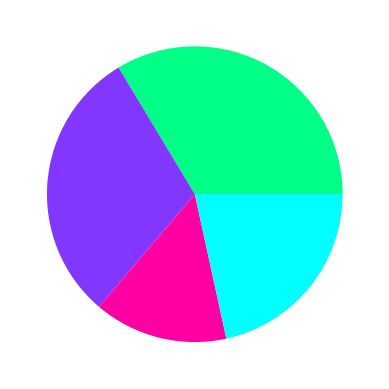

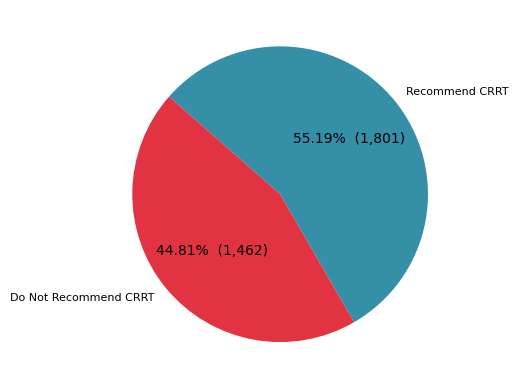

In [21]:
granular_outcome = outcomes[["Recov. renal funct.", "Transitioned to HD", "Comfort Care", "Expired "]].idxmax(axis=1)
binary_outcome = outcomes["recommend_crrt"]

import matplotlib.pyplot as plt
import seaborn as sns
counts = granular_outcome.value_counts()
counts = counts.reindex(["Transitioned to HD", "Comfort Care", "Expired ", "Recov. renal funct.",])

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
plt.pie(
    counts,
    # autopct="%1.1f%%",
    # labels=counts.index,
    # autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    # https://seaborn.pydata.org/tutorial/color_palettes.html
    colors=[
        '#00FF87',
        '#8237FF',
        '#FF00A5',
        '#00FFFF',
    ]
)
plt.savefig(f'./posthoc/cedarspie.svg', format='svg',  bbox_inches="tight")
plt.show()


counts = binary_outcome.value_counts()
# plt.pie(counts,  
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=["Recommend CRRT", "Do Not Recommend CRRT", ],
    colors=[
            sns.color_palette("mako")[-3],
            sns.color_palette("rocket")[-3],
    ],
    startangle=300
)
plt.show()


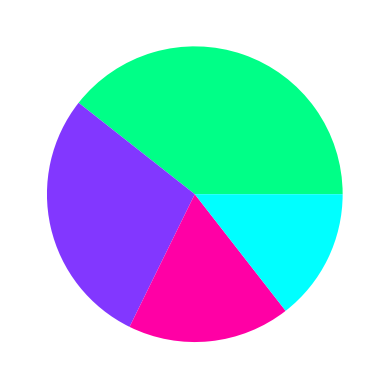

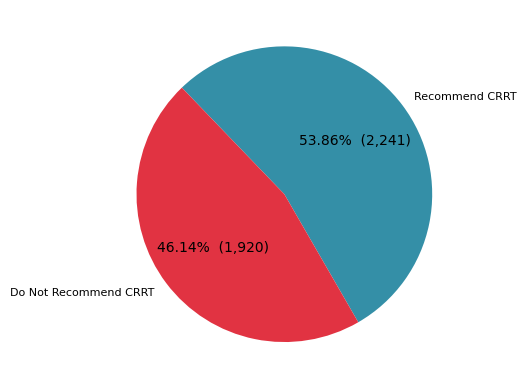

In [22]:
granular_outcome = outcomes_ucla[["Recov. renal funct.", "Transitioned to HD", "Comfort Care", "Expired "]].idxmax(axis=1)
binary_outcome = outcomes_ucla["recommend_crrt"]

import matplotlib.pyplot as plt
import seaborn as sns
counts = granular_outcome.value_counts()
counts = counts.reindex(["Transitioned to HD", "Comfort Care", "Expired ", "Recov. renal funct.",])

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
plt.pie(
    counts,
    # autopct="%1.1f%%",
    # labels=counts.index,
    # autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    # https://seaborn.pydata.org/tutorial/color_palettes.html
    colors=[
        '#00FF87',
        '#8237FF',
        '#FF00A5',
        '#00FFFF',
    ]
)
plt.savefig(f'./posthoc/uclapie.svg', format='svg',  bbox_inches="tight")
plt.show()

counts = binary_outcome.value_counts()
# plt.pie(counts,  
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=["Recommend CRRT", "Do Not Recommend CRRT", ],
    colors=[
            sns.color_palette("mako")[-3],
            sns.color_palette("rocket")[-3],
    ],
    startangle=300
)
plt.show()


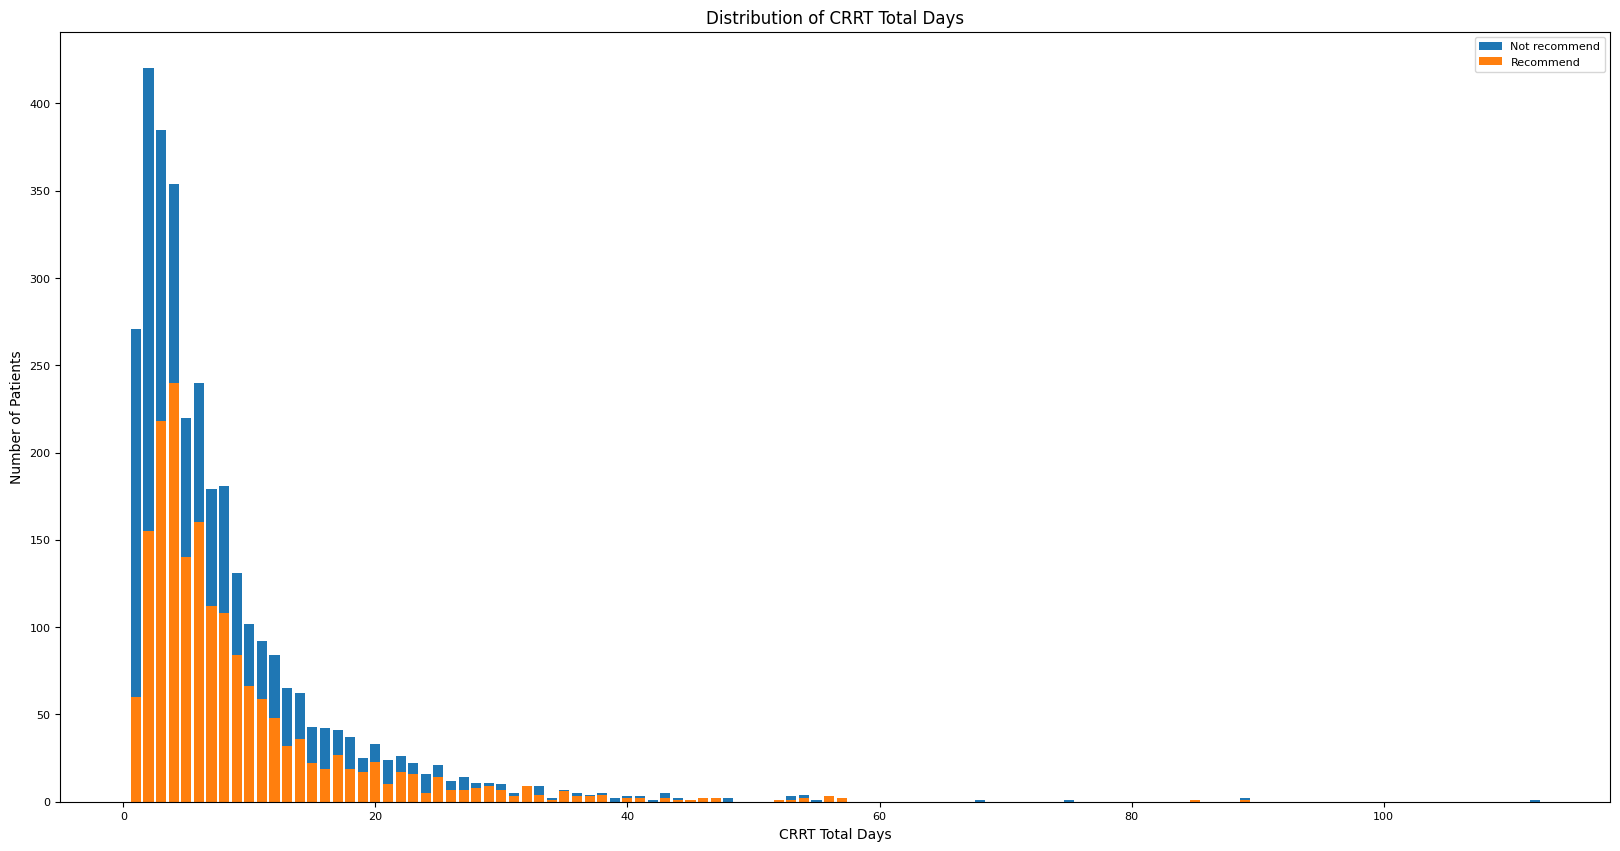

count    3263.000000
mean        8.159363
std         8.734540
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max       112.000000
Name: CRRT Total Days, dtype: float64
count    1801.000000
mean        8.816768
std         8.624176
min         1.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        89.000000
Name: CRRT Total Days, dtype: float64
count    1462.000000
mean        7.349521
std         8.804298
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max       112.000000
Name: CRRT Total Days, dtype: float64


In [13]:
import numpy as np

# Total
crrt_days = outcomes['CRRT Total Days'].value_counts().sort_index()
fig = plt.figure(figsize=(20, 10))
plt.bar(crrt_days.index, height=crrt_days.values)
plt.title('Distribution of CRRT Total Days')
plt.xlabel('CRRT Total Days')
plt.ylabel('Number of Patients')

recommend_days = outcomes[outcomes['recommend_crrt'] == 1]
crrt_days = recommend_days['CRRT Total Days'].value_counts().sort_index()
plt.bar(crrt_days.index, height=crrt_days.values)
plt.legend(["Not recommend", "Recommend"])
plt.show()

print(outcomes['CRRT Total Days'].describe())
print(recommend_days['CRRT Total Days'].describe())

not_recommend_days = outcomes[outcomes['recommend_crrt'] != 1]
print(not_recommend_days['CRRT Total Days'].describe())


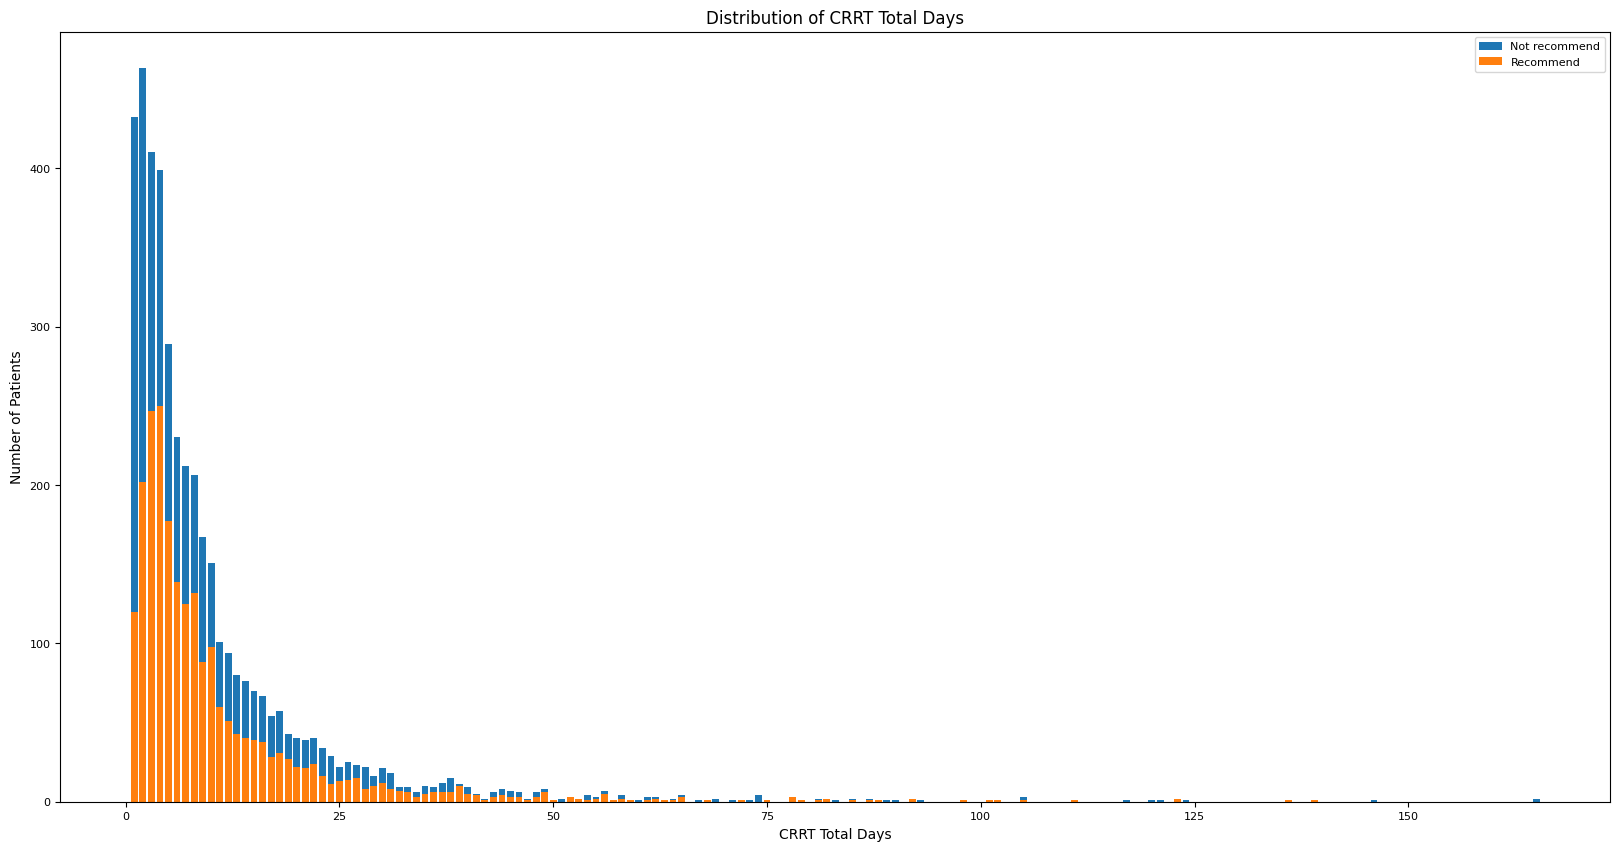

count    4161.000000
mean       10.350156
std        13.956412
min         1.000000
25%         3.000000
50%         6.000000
75%        12.000000
max       165.000000
Name: CRRT Total Days, dtype: float64
count    2241.000000
mean       10.731370
std        13.507146
min         1.000000
25%         3.000000
50%         6.000000
75%        12.000000
max       139.000000
Name: CRRT Total Days, dtype: float64
count    1920.000000
mean        9.905208
std        14.453980
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       165.000000
Name: CRRT Total Days, dtype: float64


In [14]:
import numpy as np

# Total
crrt_days = outcomes_ucla['CRRT Total Days'].value_counts().sort_index()
fig = plt.figure(figsize=(20, 10))
plt.bar(crrt_days.index, height=crrt_days.values)
plt.title('Distribution of CRRT Total Days')
plt.xlabel('CRRT Total Days')
plt.ylabel('Number of Patients')

recommend_days = outcomes_ucla[outcomes_ucla['recommend_crrt'] == 1]
crrt_days = recommend_days['CRRT Total Days'].value_counts().sort_index()
plt.bar(crrt_days.index, height=crrt_days.values)
plt.legend(["Not recommend", "Recommend"])
plt.show()

print(outcomes_ucla['CRRT Total Days'].describe())
print(recommend_days['CRRT Total Days'].describe())

not_recommend_days = outcomes_ucla[outcomes_ucla['recommend_crrt'] != 1]
print(not_recommend_days['CRRT Total Days'].describe())

In [21]:
display((outcomes['CRRT Total Days'] <= 7).value_counts())
display((outcomes_ucla['CRRT Total Days'] <=7).value_counts())

display((outcomes['CRRT Total Days'] <= 7).value_counts(normalize=True))
display((outcomes_ucla['CRRT Total Days'] <=7).value_counts(normalize=True))


True     2069
False    1194
Name: CRRT Total Days, dtype: int64

True     2435
False    1726
Name: CRRT Total Days, dtype: int64

True     0.634079
False    0.365921
Name: CRRT Total Days, dtype: float64

True     0.585196
False    0.414804
Name: CRRT Total Days, dtype: float64

Number of Unique Patients:  2812


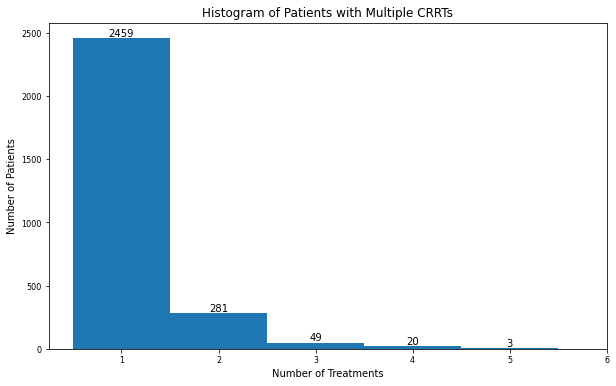

Patients with 1 treatments


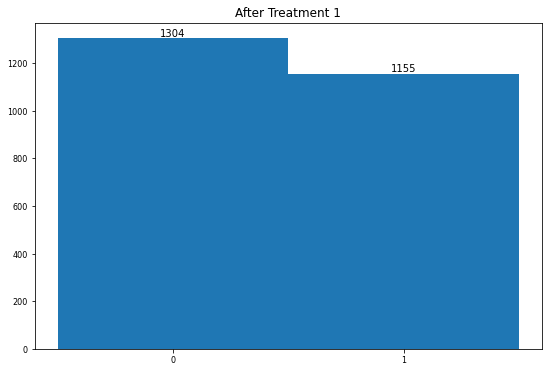

Patients with 2 treatments


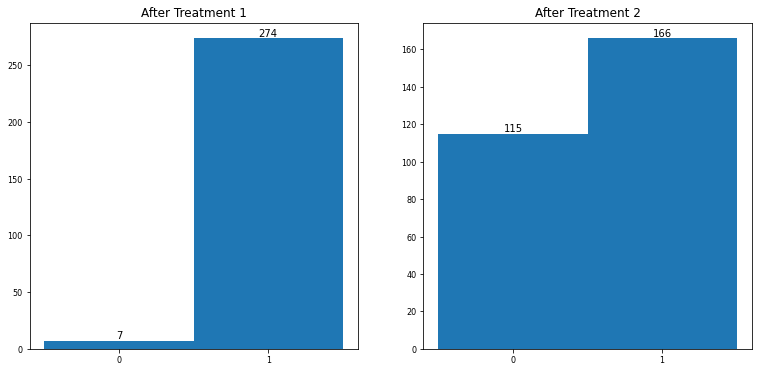

Patients with 3 treatments


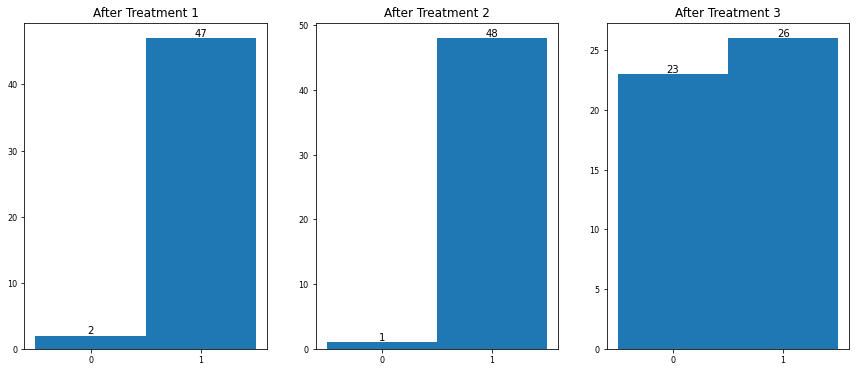

Patients with 4 treatments


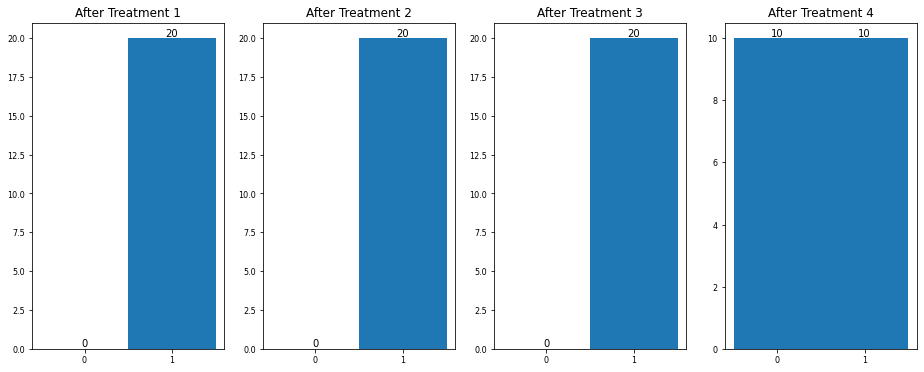

Patients with 5 treatments


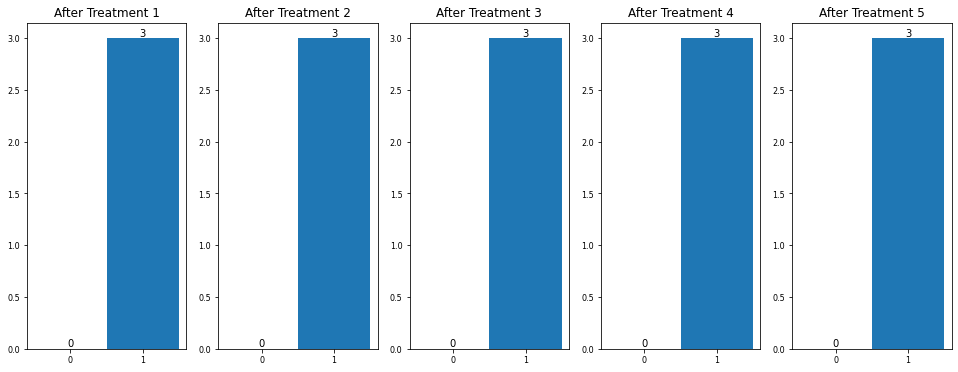

In [4]:
n_unique = len(outcomes.index.get_level_values('IP_PATIENT_ID').unique())
print('Number of Unique Patients: ', n_unique)

repeats_per_patient = outcomes.index.get_level_values('IP_PATIENT_ID').value_counts().values
fig = plt.figure(figsize=(10,6))
counts, edges, bars = plt.hist(repeats_per_patient, bins=range(min(repeats_per_patient), max(repeats_per_patient) + 2, 1), align='left')
plt.xticks(range(min(repeats_per_patient), max(repeats_per_patient) + 2, 1))
plt.bar_label(bars)
plt.title('Histogram of Patients with Multiple CRRTs')
plt.xlabel('Number of Treatments')
plt.ylabel('Number of Patients')
plt.show()

# for i in range(min(repeats_per_patient)+1, max(repeats_per_patient)+1):
#     n_treatments = outcomes.index.get_level_values('IP_PATIENT_ID').value_counts()
#     n_treatments = n_treatments[n_treatments==i].index
#     recommend_days = outcomes[outcomes.index.get_level_values('IP_PATIENT_ID').isin(n_treatments)].reset_index()
#     recommend_days = recommend_days.set_index(['IP_PATIENT_ID','Num Prev CRRT Treatments'])
#     fig = plt.figure(figsize=(10,6))
#     recommend_days.unstack('IP_PATIENT_ID')['recommend_crrt'].plot.line()
#     plt.legend([])
#     plt.show()

for i in range(min(repeats_per_patient), max(repeats_per_patient)+1):
    print(f'Patients with {i} treatments')
    n_treatments = outcomes.index.get_level_values('IP_PATIENT_ID').value_counts()
    n_treatments = n_treatments[n_treatments==i].index
    
    recommend_days = outcomes[outcomes.index.get_level_values('IP_PATIENT_ID').isin(n_treatments)]

    fig = plt.figure(figsize=(20,6))
    for j in range(i):
        plt.subplot(1, i+1, j+1)
        temp = recommend_days[recommend_days['Num Prev CRRT Treatments'] == j]['recommend_crrt']
        counts, edges, bars = plt.hist(temp, bins=[0,1,2], align='left')
        plt.xticks([0,1])
        plt.bar_label(bars)
        plt.gca().set_title(f'After Treatment {j+1}')

    plt.show()


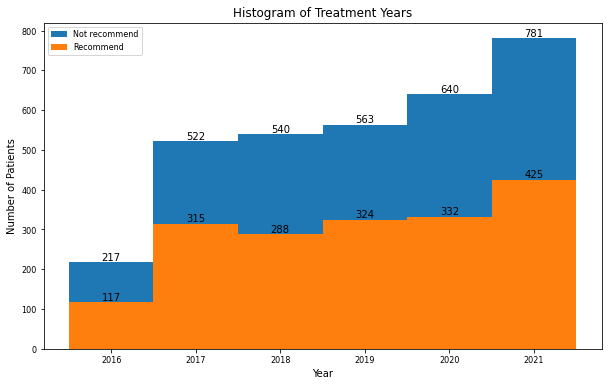

min date: 2016-07-02 00:00:00
max date: 2021-12-31 00:00:00


In [5]:
years = outcomes['CRRT Year']
fig = plt.figure(figsize=(10,6))
counts, edges, bars = plt.hist(years, bins=range(min(years), max(years) + 2, 1), align='left')
plt.xticks(range(min(years), max(years) + 1, 1))
plt.bar_label(bars)
plt.title('Histogram of Treatment Years')
plt.xlabel('Year')
plt.ylabel('Number of Patients')

recommend_days = outcomes[outcomes['recommend_crrt'] == 1]
recommend_years = recommend_days['CRRT Year']
counts, edges, bars = plt.hist(recommend_years, bins=range(min(years), max(years) + 2, 1), align='left')
plt.bar_label(bars)
plt.legend(["Not recommend", "Recommend"])
plt.show()

print(f"min date: {outcomes['End Date'].min()}")
print(f"max date: {outcomes['End Date'].max()}")


# UCLA to Cedars

## File Descriptions

In [ ]:
cedars_features = [
    "karumanchi_00001867_adt - anonymized.xlsx", # admission, discharge, transfer
    "karumanchi_00001867_allergy - anonymized.xlsx",
    "karumanchi_00001867_demographics - anonymized.xlsx",
    "karumanchi_00001867_enc_dx - anonymized.xlsx",
    "karumanchi_00001867_encounters - anonymized.xlsx",
    "karumanchi_00001867_family_hx - anonymized.xlsx",
    "karumanchi_00001867_flowsheet_daily_io - anonymized.xlsx", # have to resave as xlsx
    "karumanchi_00001867_flowsheet_vitals - anonymized.xlsx", # have to resave as xlsx
    "karumanchi_00001867_labs - anonymized.xlsx", 
    "karumanchi_00001867_medications - anonymized.xlsx",
    "karumanchi_00001867_problem_list - anonymized.xlsx",
    "karumanchi_00001867_procedures - anonymized.xlsx", # have to resave as xlsx
    "karumanchi_00001867_social_hx - anonymized (1).xlsx",
]

ucla_features = [
    'Allergies.txt',
    'Encounter_Diagnoses.txt',
    'Encounters.txt',
    'Family_History.txt',
    'Flowsheet_Vitals.txt',
    'Hospital_Unit_Transfers.txt',
    'Labs.txt',
    'Medications.txt',
    'Patient_Demographics.txt',
    'Problem_List_Diagnoses.txt',
    'Problem_Lists.txt',
    'Procedures.txt',
    'Providers.txt',
    'Social_History.txt'
]

mapping = {
    "karumanchi_00001867_adt - anonymized.xlsx": 'Hospital_Unit_Transfers.txt',
    "karumanchi_00001867_allergy - anonymized.xlsx": 'Allergies.txt',
    "karumanchi_00001867_demographics - anonymized.xlsx": 'Patient_Demographics.txt',
    "karumanchi_00001867_enc_dx - anonymized.xlsx": 'Encounter_Diagnoses.txt',
    "karumanchi_00001867_encounters - anonymized.xlsx": 'Encounters.txt',
    "karumanchi_00001867_family_hx - anonymized.xlsx": 'Family_History.txt',
    "karumanchi_00001867_flowsheet_daily_io - anonymized.xlsx": None,
    "karumanchi_00001867_flowsheet_vitals - anonymized.xlsx": 'Flowsheet_Vitals.txt',
    "karumanchi_00001867_labs - anonymized.xlsx": 'Labs.txt',
    "karumanchi_00001867_medications - anonymized.xlsx": 'Medications.txt',
    "karumanchi_00001867_problem_list - anonymized.xlsx": 'Problem_Lists.txt', #'Problem_List_Diagnoses.txt'
    "karumanchi_00001867_procedures - anonymized.xlsx": 'Procedures.txt',
    "karumanchi_00001867_social_hx - anonymized (1).xlsx": 'Social_History.txt',
} # Missing from cedars: Providers

# UCLA ignore
ucla_ignore = [
    'Patient_Identifiers.txt',
]

# Used in UCLA
FILE_NAMES = {
    "cpt": "Procedures.txt",
    "pr": "Problem_Lists.txt",
    "pr_dx": "Problem_List_Diagnoses.txt",
    "labs": "Labs.txt",
    "rx": "Medications.txt",
    "vitals": "Flowsheet_Vitals.txt",
    "dx": "Encounter_Diagnoses.txt",
}

## Cedars Counts

In [ ]:
from data.utils import read_files_and_combine

enc = pd.read_csv(os.path.join(args.cedars_crrt_data_dir, 'Encounters.txt'))

for file in mapping.keys():
    # df = read_files_and_combine([file], args.cedars_crrt_data_dir, on=["IP_PATIENT_ID"])

    if mapping[file] is None:
        continue

    df = pd.read_csv(os.path.join(args.cedars_crrt_data_dir, mapping[file]))
    # df2 = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, file))
    # df2.rename(columns={'PAT_ID': "IP_PATIENT_ID", 'PAT_ENC_CSN_ID':'IP_ENCOUNTER_ID'}, inplace=True)
    # assert all(x == y for x, y in zip(df.columns, df2.columns)), (df.columns, df2.columns)
    # for column in df.columns:
    #     if 'Month' in column or 'time' in column.lower() or 'date' in column.lower():
    #         continue
    #     set1 = set(df[column].unique())
    #     set2 = set(df2[column].unique())
    #     print(column, set1.difference(set2))

    if 'labs' in file:
        df = df.merge(enc[['IP_ENCOUNTER_ID', 'IP_PATIENT_ID']], on='IP_ENCOUNTER_ID', how='left')
        # coalesce cost column to get first non NA value
        df['IP_PATIENT_ID'] = df['IP_PATIENT_ID_x'].combine_first(df['IP_PATIENT_ID_y'])
        # remove the cols
        df = df.drop(['IP_PATIENT_ID_x', 'IP_PATIENT_ID_y'], 1)
        
    merged = pd.merge(df, outcomes, on="IP_PATIENT_ID", how="inner")
    
    print("*"*25 +  f" {file.split('_')[2]} " + "*" * 25)
    print(f"N null: {df['IP_PATIENT_ID'].isna().sum()}, N entries: {len(df)}, N unique IDs: {len(df.drop_duplicates('IP_PATIENT_ID'))}")
    print(f"MERGED WITH OUTCOME: N entries {len(merged)}, N unique IDs: {len(merged.drop_duplicates('IP_PATIENT_ID'))}")
    # print(f"Difference in # unique patients: {len(outcomes)  - len(df.drop_duplicates('IP_PATIENT_ID'))}")

## UCLA Counts

In [ ]:
from data.utils import read_files_and_combine

enc = pd.read_csv(os.path.join(args.cedars_crrt_data_dir, 'Encounters.txt'))

for file in mapping.keys():
    # df = read_files_and_combine([file], args.cedars_crrt_data_dir, on=["IP_PATIENT_ID"])

    if mapping[file] is None:
        continue

    try:
        df = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, mapping[file]))
    except:
        df = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, mapping[file]), encoding='cp1252')
    
    df.columns = [col.upper() for col in df.columns]

    # if 'labs' in file:
    #     df = pd.merge(df, enc[['IP_ENCOUNTER_ID', 'IP_PATIENT_ID']], on='IP_ENCOUNTER_ID', how='left')
    #     # coalesce cost column to get first non NA value
    #     df['IP_PATIENT_ID'] = df['IP_PATIENT_ID_x'].combine_first(df['IP_PATIENT_ID_y'])
    #     # remove the cols
    #     df = df.drop(['IP_PATIENT_ID_x', 'IP_PATIENT_ID_y'], 1)
        
    merged = pd.merge(df, outcomes_ucla, on="IP_PATIENT_ID", how="inner")
    
    print("*"*25 +  f" {file.split('_')[2]} " + "*" * 25)
    print(f"N null: {df['IP_PATIENT_ID'].isna().sum()}, N entries: {len(df)}, N unique IDs: {len(df.drop_duplicates('IP_PATIENT_ID'))}")
    print(f"MERGED WITH OUTCOME: N entries {len(merged)}, N unique IDs: {len(merged.drop_duplicates('IP_PATIENT_ID'))}")
    # print(f"Difference in # unique patients: {len(outcomes)  - len(df.drop_duplicates('IP_PATIENT_ID'))}")

# Comparisons of features (i.e., DataFrame Columns)

## Hospital Transfers

In [ ]:
adt = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_adt - anonymized.xlsx'))
hospital_transfer = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Hospital_Unit_Transfers.txt'))

In [ ]:
print(adt.columns)
print(hospital_transfer.columns)

#### Notes
* Same columns under different names
* We don't use these futures, just keeping here for reference

## Allergies

In [ ]:
cedars_allerg = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_allergy - anonymized.xlsx'))
ucla_allerg = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Allergies.txt'))

In [ ]:
print(cedars_allerg.columns)
print(ucla_allerg.columns)

## Demographics

In [4]:
cedars_demog = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_demographics - anonymized.xlsx'))
ucla_demog = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Patient_Demographics.txt'))

In [18]:
print(cedars_demog.columns)
print(ucla_demog.columns)

Index(['PAT_ID', 'CURRENT_AGE', 'SEX', 'RACE_1', 'RACE_2', 'RACE_3',
       'ETHNIC_GROUP', 'LIVING_STATUS', 'CURRENT_PCP_ID'],
      dtype='object')
Index(['IP_PATIENT_ID', 'AGE', 'GENDER', 'RACE', 'ETHNICITY', 'VITAL_STATUS',
       'PCP_IP_PROVIDER_ID'],
      dtype='object')


In [19]:
print(cedars_demog.columns)
print(ucla_demog.columns)

Index(['PAT_ID', 'CURRENT_AGE', 'SEX', 'RACE_1', 'RACE_2', 'RACE_3',
       'ETHNIC_GROUP', 'LIVING_STATUS', 'CURRENT_PCP_ID'],
      dtype='object')
Index(['IP_PATIENT_ID', 'AGE', 'GENDER', 'RACE', 'ETHNICITY', 'VITAL_STATUS',
       'PCP_IP_PROVIDER_ID'],
      dtype='object')


In [20]:
cedars_demog_clean = cedars_demog.rename(
            {
                # CONTROLS
                "GENDER": "SEX",
                "IP_CURRENT_PCP_ID": "PCP_IP_PROVIDER_ID",
                "VITAL_STATUS": "KNOWN_DECEASED",

                # CEDARS
                'CURRENT_AGE': "AGE",
                'RACE_1': 'RACE',
                'ETHNIC_GROUP': 'ETHNICITY',
                'LIVING_STATUS': 'KNOWN_DECEASED',
                "CURRENT_PCP_ID": "PCP_IP_PROVIDER_ID",
                'PAT_ID': "IP_PATIENT_ID"
            },
            axis=1,
        )

# Cleanup RACE for Cedars data. Combine RACE_2 and RACE_3 into multiple races
if 'RACE_2' in cedars_demog_clean.columns and 'RACE_3' in cedars_demog_clean.columns:
    cedars_demog_clean.loc[cedars_demog_clean['RACE_2'].notna() | cedars_demog_clean['RACE_3'].notna(), 'RACE'] = 'Multiple Races'
    cedars_demog_clean = cedars_demog_clean.replace({'RACE': {'White': 'White or Caucasian', 'Patient Declined': 'Patient Refused'}}) 
    cedars_demog_clean = cedars_demog_clean.drop(["RACE_2","RACE_3"], axis=1)


In [ ]:
age = cedars_demog['CURRENT_AGE']
plt.figure(figsize=(20,10))
counts, edges, bars = plt.hist(age, bins=range(0, max(age) + 5, 5), align='mid')
plt.bar_label(bars)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
import seaborn as sns
sex = cedars_demog['SEX']
plt.figure(figsize=(5,5))
counts = sex.value_counts()
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=["Male", "Female", "Unknown" ],
    colors=[
            sns.color_palette("mako")[-3],
            sns.color_palette("rocket")[-3],
            sns.color_palette("rocket")[-2],
    ],
    startangle=300
)
plt.show()

RACE_1
White                                        1616
Black or African American                     451
Other                                         287
Asian                                         230
Unknown                                       207
Native Hawaiian or Other Pacific Islander      10
American Indian or Alaska Native                8
Patient Declined                                2
Name: count, dtype: int64


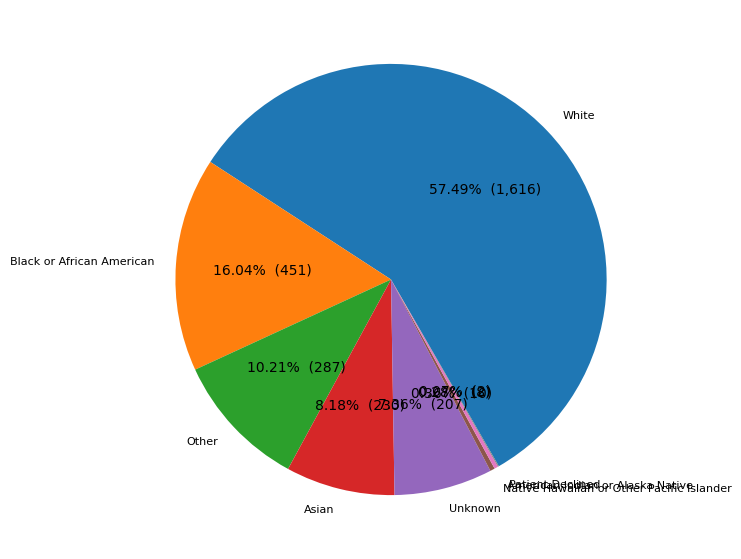

RACE
White or Caucasian                           1566
Black or African American                     437
Other                                         255
Asian                                         227
Unknown                                       203
Multiple Races                                107
Native Hawaiian or Other Pacific Islander      10
American Indian or Alaska Native                4
Patient Refused                                 2
Name: count, dtype: int64


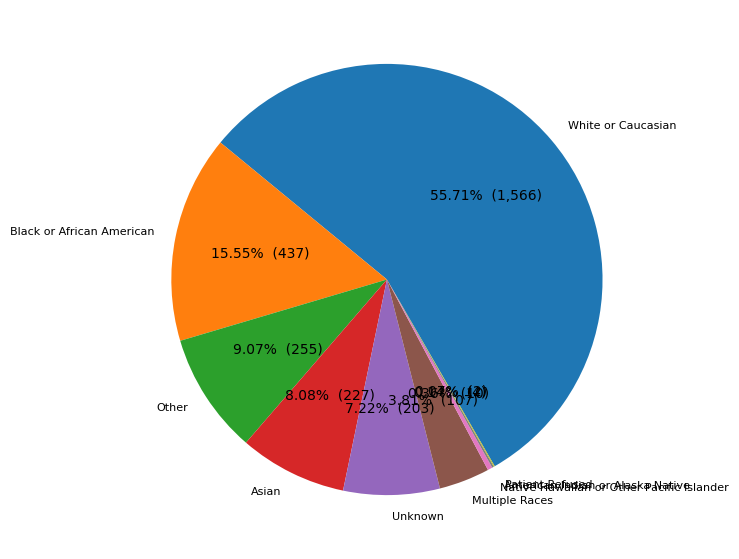

RACE_2
White                                        36
Other                                        35
Unknown                                      27
Asian                                         4
American Indian or Alaska Native              2
Black or African American                     2
Native Hawaiian or Other Pacific Islander     1
Name: count, dtype: int64


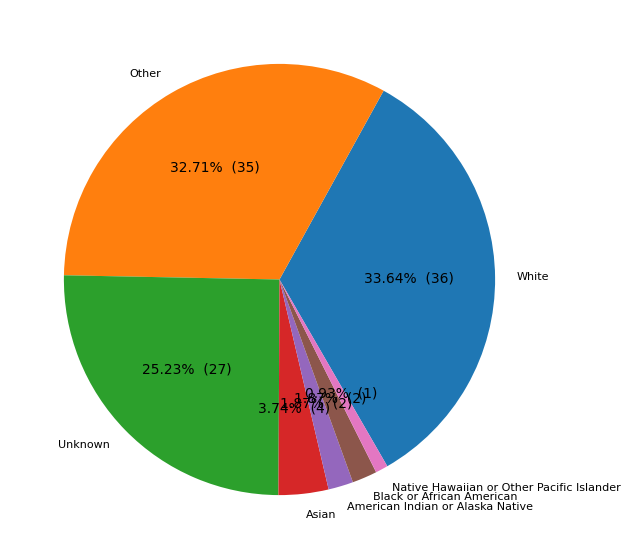

RACE_3
Unknown    2
Other      1
Name: count, dtype: int64


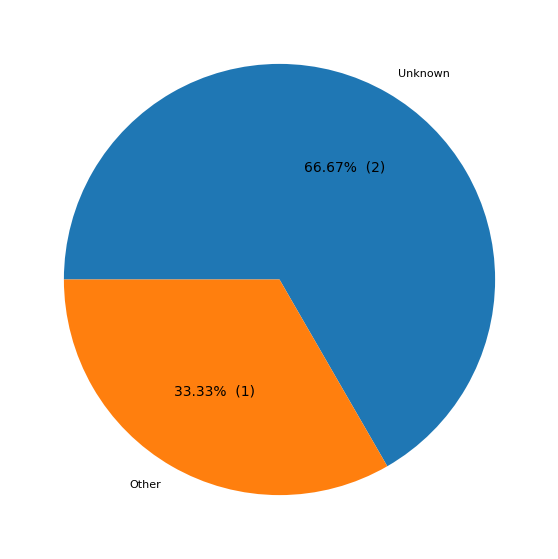

In [21]:
import seaborn as sns
race = cedars_demog['RACE_1']
plt.figure(figsize=(7,7))
counts = race.value_counts()
print(counts)
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=list(counts.index),
    startangle=300
)
plt.show()

race = cedars_demog_clean['RACE']
plt.figure(figsize=(7,7))
counts = race.value_counts()
print(counts)
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=list(counts.index),
    startangle=300
)
plt.show()


race = cedars_demog['RACE_2']
plt.figure(figsize=(7,7))
counts = race.value_counts()
print(counts)
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=list(counts.index),
    startangle=300
)
plt.show()

race = cedars_demog['RACE_3']
plt.figure(figsize=(7,7))
counts = race.value_counts()
print(counts)
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=list(counts.index),
    startangle=300
)
plt.show()



In [ ]:
import seaborn as sns
ethnicity = cedars_demog_clean['ETHNICITY']
plt.figure(figsize=(5,5))
counts = ethnicity.value_counts()
print(counts)
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=list(counts.index),
    startangle=300
)
plt.show()

In [ ]:
import seaborn as sns
ethnicity = cedars_demog['LIVING_STATUS']
plt.figure(figsize=(5,5))
counts = ethnicity.value_counts()
print(counts)
plt.pie(
    counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(counts)/100),
    labels=list(counts.index),
    startangle=300
)
plt.show()

#### Notes
* RACE_3 is basically empty, don't use
* RACE_2 is also almost empty - consists of few race descriptions, mostly 'Other' or 'Empty'.
* Probaly always take RACE_1. Or have to create a new 'Mixed' column
* Some descriptions are different (e.g. Cedars has "White" but UCLA has "White or Caucausian")
* Cedars has "Alive/Deceased" but UCLA has "Known Deceased/Not Known Deceased"
* Age is int not float

## Encounters

In [ ]:
cedars_enc = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_encounters - anonymized.xlsx'))
ucla_enc = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Encounters.txt'), encoding="cp1252")

In [ ]:
print(cedars_enc.columns)
print(ucla_enc.columns)

## Encounters Diagnosis

In [3]:
cedars_enc_dx = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_enc_dx - anonymized.xlsx'))
ucla_enc_dx = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Encounter_Diagnoses.txt'))

In [4]:
print(cedars_enc_dx.columns)
print(ucla_enc_dx.columns)

Index(['PAT_ID', 'PAT_ENC_CSN_ID', 'CONTACT_DATE', 'CURRENT_ICD10_LIST',
       'DX_NAME', 'RECORD_TYPE', 'PRESENT_ON_ADM', 'HSP_FINAL_DIAGNOSIS_FLAG',
       'PRIMARY_DX_YN'],
      dtype='object')
Index(['IP_PATIENT_ID', 'IP_ENCOUNTER_ID', 'DIAGNOSIS_DATE', 'ICD_TYPE',
       'ICD_CODE', 'ICD_DESC', 'PRIMARY_DIAGNOSIS_FLAG',
       'ADMIT_DIAGNOSIS_FLAG', 'PRESENT_ON_ADMIT_FLAG',
       'HSP_FINAL_DIAGNOSIS_FLAG'],
      dtype='object')


In [11]:
ucla_enc_dx[ucla_enc_dx.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"]
ucla_enc_dx[ucla_enc_dx['IP_PATIENT_ID'] == "C5AAA73BF48812D896DA53D5294E2C58"]['DIAGNOSIS_DATE'].value_counts()


05/29/2021    73
04/12/2021     3
05/21/2021     2
04/13/2021     1
06/08/2021     1
Name: DIAGNOSIS_DATE, dtype: int64

In [ ]:
print(cedars_enc_dx.groupby("CURRENT_ICD10_LIST").size().sort_values(ascending=False)[:15])
icd_dx_dates = pd.to_datetime(cedars_enc_dx["CONTACT_DATE"])
print(f"min date: {icd_dx_dates.min()}, max_date: {icd_dx_dates.max()}")

#### Notes
* UCLA has ICD_TYPE. Cedars it's all ICD10

left (cedars), right (ucla)
* CONACT_DATE == DIAGNOSIS_DATE
* CURRENT_ICD10_LIST == ICD_CODE
* DX_NAME == ICD_DESC
* PRIMARY_DX_YN == PRIMARY_DIAGNOSIS_FLAG (Y/N ==> S/P)
* HSP_FINAL_DIAGNOSIS_FLAG == HSP_FINAL_DIAGNOSIS_FLAG (Y/N ==> 0.0/1.0)
* PRESENT_ON_ADM == PRESENT_ON_ADMIT_FLAG (Y/N ==> 0.0/1.0)

* Cedars has no 'ADMIT_DIAGNOSIS_FLAG'
* Cedars has extra 'RECORD_TYPE'

## Family History

In [ ]:
cedars_fam = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_family_hx - anonymized.xlsx'))
ucla_fam = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Family_History.txt'))

In [ ]:
print(cedars_fam.columns)
print(ucla_fam.columns)

## Flowsheet

In [5]:
ucla_flow = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Flowsheet_Vitals.txt'))
cedars_flow = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_flowsheet_vitals - anonymized.xlsx'))

In [ ]:
ucla_flow[ucla_flow.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"]
ucla_flow[ucla_flow['IP_PATIENT_ID'] == "C5AAA73BF48812D896DA53D5294E2C58"]


In [ ]:
cedars_flow_daily = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_flowsheet_daily_io - anonymized.xlsx'))

In [6]:
# print(cedars_flow_daily.columns)
print(ucla_flow.columns)
print(cedars_flow.columns)

Index(['IP_PATIENT_ID', 'IP_ENCOUNTER_ID', 'VITAL_SIGN_SOURCE',
       'VITAL_SIGN_TYPE', 'VITAL_SIGN_TAKEN_TIME', 'VITAL_SIGN_VALUE'],
      dtype='object')
Index(['Unnamed: 0', 'PAT_ID', 'INPATIENT_DATA_ID', 'MEAS_NAME', 'MEAS_VALUE',
       'RECORDED_TIME'],
      dtype='object')


#### Notes
* UCLA doesn't have the equivalent 'daily_io'
* UCLA has 'VITAL_SIGN_SOURCE' which is all just 'FLOWSHEET'
* VITAL_SIGN_TYPE == MEAS_NAME (Cedars - ALL CAPS)
* VITAL_SIGN_VALUE == MEAS_VALUE
* VITAL_SIGN_TAKEN_TIME == RECORDED_TIME

* Cedars BP maybe needs to be separated into SBP and DBP

In [ ]:
cedars_flow["MEAS_NAME"].replace({"BP": "SBP/DBP"}, inplace=True)
cedars_flow_drop = cedars_flow.dropna(subset=['MEAS_VALUE'])
explode_cols = ["MEAS_VALUE", "MEAS_NAME"]
cedars_flow_drop['MEAS_VALUE'] = cedars_flow_drop['MEAS_VALUE'].astype(str)

# Ref: https://stackoverflow.com/a/57122617/1888794
# don't explode the columsn you set index to, explode the rest via apply, reset everything to normal
cedars_flow_splitbp = cedars_flow_drop.apply(
        lambda col: col.str.split("/") if col.name in explode_cols else col
    ).explode(explode_cols)

In [ ]:
cedars_flow_splitbp['MEAS_NAME'].unique()

## Labs

In [7]:
cedars_labs = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_labs - anonymized.xlsx'))
ucla_labs = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Labs.txt'),  encoding="cp1252")

In [138]:
ucla_labs[ucla_labs.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"]
# ucla_labs[ucla_labs['IP_PATIENT_ID'] == "C5AAA73BF48812D896DA53D5294E2C58"]['RESULT_TIME'].unique()
test = ucla_labs[(ucla_labs['IP_PATIENT_ID'] == "C5AAA73BF48812D896DA53D5294E2C58")&
          (ucla_labs['RESULT_TIME'] == "05/28/2021 17:59:00")]


In [8]:
print(cedars_labs.columns)
print(ucla_labs.columns)

Index(['PAT_ID', 'PAT_ENC_CSN_ID', 'COMPONENT_ID', 'NAME',
       'SPECIMN_TAKEN_TIME', 'PROC_ID', 'DESCRIPTION', 'ORDER_TIME',
       'RESULT_TIME', 'RESULTS', 'REFERENCE_UNIT', 'LOINC_CODE'],
      dtype='object')
Index(['IP_PATIENT_ID', 'IP_ENCOUNTER_ID', 'PROC_ID', 'DESCRIPTION',
       'COMPONENT_ID', 'COMPONENT_NAME', 'ORDER_TIME', 'RESULT_TIME',
       'SPECIMN_TAKEN_TIME', 'RESULTS', 'REFERENCE_UNIT', 'LOINC_CODE'],
      dtype='object')


In [ ]:
print(ucla_labs['IP_PATIENT_ID'].isnull().values.any())
print(cedars_labs['PAT_ID'].isnull().values.any())

#### Notes
* Same except Cedars "NAME" is UCLA "COMPONENT_NAME"
* Lots of missing PAT_ID in cedars - use enc_id?

## Medications

In [13]:
cedars_meds = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_medications - anonymized.xlsx'))
ucla_meds = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Medications.txt'))

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
ucla_meds[ucla_meds.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"]
ucla_meds[ucla_meds['IP_PATIENT_ID'] == "C5AAA73BF48812D896DA53D5294E2C58"]['START_DATE'].value_counts()


In [14]:
print(cedars_meds.columns)
print(ucla_meds.columns)

Index(['PAT_ID', 'PAT_ENC_CSN_ID', 'ORDERING_DATE', 'START_DATE', 'END_DATE',
       'MEDICATION_ID', 'NAME', 'GENERIC_NAME', 'PHARM_CLASS', 'THERA_CLASS',
       'PHARM_SUBCLASS', 'QUANTITY', 'REFILLS', 'SIG', 'TAKEN_TIME',
       'FREQUENCY', 'ORDERING_MODE', 'ROUTE', 'DOSE', 'DOSE_UNIT'],
      dtype='object')
Index(['IP_PATIENT_ID', 'IP_ENCOUNTER_ID', 'ORDERING_MODE', 'ORDER_DATE',
       'START_DATE', 'END_DATE', 'MEDICATION_ID', 'MEDICATION_NAME',
       'GENERIC_NAME', 'DOSE', 'DOSE_UNIT', 'TAKEN_TIME_ORDER_DATE',
       'MEDISPAN_CLASS_NAME', 'THERA_CLASS', 'PHARM_SUBCLASS', 'REFILLS',
       'FREQUENCY', 'QUANTITY', 'SIG'],
      dtype='object')


#### Notes
CEDARS ==> UCLA
* NAME == MEDICATION_NAME
* TAKEN_TIME == TAKEN_TIME_ORDER_DATE
* PHARM_CLASS == MEDISPAN_CLASS_NAME
* ORDERING_DATE == ORDER_DATE

* CEDARS has ROUTE

## Problem List

In [9]:
cedars_problems = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_problem_list - anonymized.xlsx'))
cedars_problems_updated = pd.read_excel(os.path.join(args.cedars_crrt_data_dir,'karumanchi_00001867_problem_list - anonymized - updated.xlsx'))
ucla_problems = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Problem_Lists.txt'),encoding="cp1252")
ucla_problems_dx = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Problem_List_Diagnoses.txt'))

In [24]:
ucla_problems[ucla_problems.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"]
ucla_problems[ucla_problems['ip_patient_id'] == "C5AAA73BF48812D896DA53D5294E2C58"]


,ip_patient_id,ip_encounter_id,encounter_date,problem_list_id,prob_desc,noted_date,date_of_entry,resolved_date,problem_status,problem_cmt


In [22]:
ucla_problems_dx[ucla_problems_dx.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"]
ucla_problems_dx[ucla_problems_dx['ip_patient_id'] == "C5AAA73BF48812D896DA53D5294E2C58"]


,ip_patient_id,ip_encounter_id,diagnosis_source,icd_type,icd_code,icd_desc,diagnosis_date,primary_dx_yn


In [ ]:
display(cedars_problems)
display(cedars_problems[cedars_problems['NOTED_DATE'].isna()])
display(cedars_problems[~cedars_problems['DATE_OF_ENTRY'].isna()]['STATUS'].value_counts())

In [ ]:
display(ucla_problems)
display(ucla_problems[ucla_problems['noted_date'].isna()])
display(ucla_problems[ucla_problems['date_of_entry'].isna()])

In [ ]:
display(cedars_problems_updated)
display(cedars_problems_updated[cedars_problems_updated['NOTED_DATE'].isna()])
display(cedars_problems_updated[~cedars_problems_updated['DATE_OF_ENTRY'].isna()]['STATUS'].value_counts())

In [10]:
print(cedars_problems.columns)
print(cedars_problems_updated.columns)
print(ucla_problems.columns)
print(ucla_problems_dx.columns)

Index(['PAT_ID', 'PROBLEM_EPT_CSN', 'CONTACT_DATE', 'PROBLEM_LIST_ID',
       'DESCRIPTION', 'NOTED_DATE', 'DATE_OF_ENTRY', 'RESOLVED_DATE', 'STATUS',
       'PROBLEM_CMT', 'CURRENT_ICD10_LIST', 'DX_NAME', 'ACCT_DX_YN',
       'PRIMARY_DX_YN', 'PRIORITY'],
      dtype='object')
Index(['PAT_ID', 'PAT_ENC_CSN_ID', 'CONTACT_DATE', 'PROBLEM_LIST_ID',
       'DESCRIPTION', 'NOTED_DATE', 'DATE_OF_ENTRY', 'RESOLVED_DATE', 'STATUS',
       'PROBLEM_CMT', 'CURRENT_ICD10_LIST', 'DX_NAME', 'ACCT_DX_YN',
       'PRIMARY_DX_YN', 'PRIORITY'],
      dtype='object')
Index(['ip_patient_id', 'ip_encounter_id', 'encounter_date', 'problem_list_id',
       'prob_desc', 'noted_date', 'date_of_entry', 'resolved_date',
       'problem_status', 'problem_cmt'],
      dtype='object')
Index(['ip_patient_id', 'ip_encounter_id', 'diagnosis_source', 'icd_type',
       'icd_code', 'icd_desc', 'diagnosis_date', 'primary_dx_yn'],
      dtype='object')


In [ ]:
from hcuppy.ccs import CCSEngine
ce = CCSEngine(mode="dx")
ccs_dict = cedars_problems[cedars_problems['STATUS']=='ACTIVE']['CURRENT_ICD10_LIST'].apply(lambda icd_code: ce.get_ccs(icd_code))
# series of dicts, explode each dict attribute to its own column
ccs_dict = pd.DataFrame(ccs_dict.values.tolist())
ccs_dict.columns = ["CCS_CODE", "CCS_DESCRIPTION", "CCS_LEVEL1", "CCS_LEVEL1_DESCRIPTION", "CCS_LEVEL2", "CCS_LEVEL2_DESCRIPTION"]

# combine the granular icd codes with the higher level CCS ones
cedars_problems_ccs = pd.concat([cedars_problems, ccs_dict], axis=1)

print(cedars_problems_ccs.groupby("CCS_CODE").size().sort_values(ascending=False)[:15])
print(len(cedars_problems_ccs['CCS_CODE'].unique()))
onehot_ccs = pd.get_dummies(cedars_problems_ccs[["PAT_ID", "CCS_CODE"]], columns=["CCS_CODE"])
onehot_ccs

In [ ]:
from hcuppy.ccs import CCSEngine
ce = CCSEngine(mode="dx")
ccs_dict = cedars_problems_updated[cedars_problems_updated['STATUS']=='ACTIVE']['CURRENT_ICD10_LIST'].apply(lambda icd_code: ce.get_ccs(icd_code))
# series of dicts, explode each dict attribute to its own column
ccs_dict = pd.DataFrame(ccs_dict.values.tolist())
ccs_dict.columns = ["CCS_CODE", "CCS_DESCRIPTION", "CCS_LEVEL1", "CCS_LEVEL1_DESCRIPTION", "CCS_LEVEL2", "CCS_LEVEL2_DESCRIPTION"]

# combine the granular icd codes with the higher level CCS ones
cedars_problems_ccs = pd.concat([cedars_problems_updated, ccs_dict], axis=1)

print(cedars_problems_ccs.groupby("CCS_CODE").size().sort_values(ascending=False)[:15])
print(len(cedars_problems_ccs['CCS_CODE'].unique()))

onehot_ccs = pd.get_dummies(cedars_problems_ccs[["PAT_ID", "CCS_CODE"]], columns=["CCS_CODE"])
onehot_ccs

#### Notes

* CEDARS problems combines problem list and problem list dx


* CONTACT_DATE => encounter_date
* DESCRIPTION => prob_desc
* STATUS => problem_status





* UCLA dx has 'diagnosis source; which is just 'PROBLEM_LIST'
* UCLA has ICD_TYPE. Cedars it's all ICD10
* DX_NAME => icd_desc
* Cedars can have multiple codes??? 
* Cedars has ACCT_DC_YN
* Cedars has PRIOTITY
* UCLA has diagnosis_date


## Procedures

In [11]:
cedars_proc = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_procedures - anonymized.xlsx'))
ucla_proc = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Procedures.txt'))

In [ ]:
ucla_proc[ucla_proc.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"]
ucla_proc[ucla_proc['IP_PATIENT_ID'] == "C5AAA73BF48812D896DA53D5294E2C58"]


In [12]:
print(cedars_proc.columns)
print(ucla_proc.columns)

Index(['Unnamed: 0', 'PAT_ID', 'PAT_ENC_CSN_ID', 'PROC_CODE', 'PROC_NAME',
       'PROC_START_TIME'],
      dtype='object')
Index(['IP_PATIENT_ID', 'IP_ENCOUNTER_ID', 'PROC_DATE', 'PROC_CODE',
       'PROC_NAME'],
      dtype='object')


#### Notes
* PROC_START_TIME is more granular than PROC_DATE
* Weird proc codes

## Social History

In [ ]:
cedars_soc = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_social_hx - anonymized (1).xlsx'))
ucla_soc = pd.read_csv(os.path.join(args.ucla_crrt_data_dir, 'Social_History.txt'))

In [ ]:
print(cedars_soc.columns)
print(ucla_soc.columns)

#### Notes
* SMOKING_TOBACCO_USE => SMOKING_TOB_STATUS
* TOBACCO_USE => TOBACCO_USER

* UCLA has CIGARETTES_YN

* ALCOHOL_USE => ALCOHOL_USER
* ALCOHOL_COMMENT => ALCOHOL_TYPE (MIGHT NEED FORMATTING)

* Cedars has ILLICIT_DRUG_USER

# Using Load Functions

## Static Features

In [ ]:
import data.load
import data.preprocess

static_df = data.load.load_static_features(args.cedars_crrt_data_dir).set_index("IP_PATIENT_ID")

# ids = static_df['PAT_ID']
# dupe = static_df[ids.isin(ids[ids.duplicated()])].sort_values("PAT_ID")
# print(dupe)

temp_df = outcomes.reset_index().set_index('IP_PATIENT_ID')
features_with_outcomes = static_df.join(temp_df, how="inner")

display(static_df)


In [29]:
import data.load
import data.preprocess

static_df = data.load.load_static_features(args.ucla_crrt_data_dir).set_index("IP_PATIENT_ID")

# ids = static_df['PAT_ID']
# dupe = static_df[ids.isin(ids[ids.duplicated()])].sort_values("PAT_ID")
# print(dupe)

temp_df = outcomes.reset_index().set_index('IP_PATIENT_ID')
features_with_outcomes = static_df.join(temp_df, how="inner")

display(static_df)
display(static_df[static_df.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"])
#ucla_proc[ucla_proc['IP_PATIENT_ID'] == "C5AAA73BF48812D896DA53D5294E2C58"]


mealy | INFO - *****Loading Static Features...*****


,AGE,SEX,ETHNICITY,KNOWN_DECEASED,RACE_American Indian or Alaska Native,RACE_Asian,RACE_Black or African American,RACE_Multiple Races,RACE_Native Hawaiian or Other Pacific Islander,RACE_Unknown,RACE_White or Caucasian
IP_PATIENT_ID,,,,,,,,,,,
190EEEB1D0D98BF512DCD2B38F698517,67.0,0,0,1,0,0,0,0,0,0,1
FB9E13C1092FC991E3B00FCE85989EF0,80.0,0,0,0,0,0,0,1,0,0,0
A2631FE4BF2371ED63288EB31D6548DC,55.0,0,1,1,0,0,0,0,0,0,1
114407DC6649633A97CCC48FD55AB2AF,72.0,1,0,1,0,0,0,0,0,0,1
1CCBD8BC4942F9F047844B7FA81B0A8D,54.0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
D03D66FBBB29439AA2A673E3A31E5370,83.0,0,1,0,0,0,0,0,0,0,1
CE2973055A83792F17A6953025E29287,44.0,0,0,0,0,0,0,0,0,0,1
789738AF42B81299F1F23487CD994D34,69.0,0,0,0,0,0,0,0,0,1,0


,AGE,SEX,ETHNICITY,KNOWN_DECEASED,RACE_American Indian or Alaska Native,RACE_Asian,RACE_Black or African American,RACE_Multiple Races,RACE_Native Hawaiian or Other Pacific Islander,RACE_Unknown,RACE_White or Caucasian
IP_PATIENT_ID,,,,,,,,,,,
C5AAA73BF48812D896DA53D5294E2C58,60.0,1,0,1,0,0,0,0,0,0,1


## Longitudinal Features

In [123]:
from data.longitudinal_utils import (
    get_time_window_mask
)

import data.longitudinal_features as lf

from typing import Union

temp = outcomes_ucla.copy()
temp.index.rename({'PAT_ID':'IP_PATIENT_ID'}, inplace=True)
window = get_time_window_mask(temp, {'YEARS': 0, 'MONTHS': 0, 'DAYS': 7}, None, 'Start Date', 0)
ucla_window = get_time_window_mask(outcomes_ucla.copy(), {'YEARS': 10, 'MONTHS': 0, 'DAYS': 7}, None, 'End Date', 0)

### Diagnoses

In [ ]:
diagnoses = lf.load_diagnoses(args.cedars_crrt_data_dir,
                        time_window = window, time_interval='1D')
display(diagnoses)

In [113]:
diagnoses = lf.load_diagnoses(args.ucla_crrt_data_dir,
                        time_window = window)
# display(diagnoses)

mealy | INFO - *****Loading Diagnoses...*****


                                             Start Date  \
IP_PATIENT_ID                                             
C5AAA73BF48812D896DA53D5294E2C58  [2021-05-29 00:00:00]   

                                           Window Start             Window End  
IP_PATIENT_ID                                                                   
C5AAA73BF48812D896DA53D5294E2C58  [2021-05-23 00:00:00]  [2021-05-30 00:00:00]  
9
[                                 Start Date Window Start Window End
IP_PATIENT_ID                                                      
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11   2020-02-05 2020-02-12
000A7F3313811793921F5292DED8952B 2020-03-01   2020-02-24 2020-03-02
00410D475813633FCD90F115426AC192 2021-06-27   2021-06-21 2021-06-28
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20   2015-08-14 2015-08-21
00685FAEF8CE2B7178D920E9C958791B 2019-09-14   2019-09-08 2019-09-15
...                                     ...          ...        ...
FFBB88418EEE2BE893542B6BA5A6471A

mealy | INFO - Dropping 1444946 rows outside of time window.


                          IP_PATIENT_ID DIAGNOSIS_DATE Start Date  \
88536  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
88537  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
88538  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
88539  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
88540  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
...                                 ...            ...        ...   
88604  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
88605  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
88606  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
88607  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   
88608  C5AAA73BF48812D896DA53D5294E2C58     2021-05-29 2021-05-29   

       dx_CCS_CODE_1  dx_CCS_CODE_10  dx_CCS_CODE_100  dx_CCS_CODE_101  \
88536              0               0                0                0   
88537              0   

In [114]:
display(diagnoses[diagnoses.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"])

,,dx_CCS_CODE_1,dx_CCS_CODE_10,dx_CCS_CODE_100,dx_CCS_CODE_101,dx_CCS_CODE_102,dx_CCS_CODE_103,dx_CCS_CODE_104,dx_CCS_CODE_105,dx_CCS_CODE_106,dx_CCS_CODE_107,...,dx_CCS_CODE_91,dx_CCS_CODE_92,dx_CCS_CODE_93,dx_CCS_CODE_94,dx_CCS_CODE_95,dx_CCS_CODE_96,dx_CCS_CODE_97,dx_CCS_CODE_98,dx_CCS_CODE_99,dx_CCS_CODE_na
IP_PATIENT_ID,Start Date,,,,,,,,,,,,,,,,,,,,,
C5AAA73BF48812D896DA53D5294E2C58,2021-05-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2


### Vitals

In [ ]:
vitals = lf.load_vitals(args.cedars_crrt_data_dir,
                        time_window = window, time_interval='1D')
display(vitals)

In [108]:
vitals = lf.load_vitals(args.ucla_crrt_data_dir,
                        time_window = window)
# display(vitals)

mealy | INFO - *****Loading Vitals...*****


mealy | INFO - Dropped 0 rows that were na.
mealy | INFO - Dropped 30027 rows that were duplicates.
mealy | INFO - Dropping 8682 rows outside of time window.


                                             Start Date  \
IP_PATIENT_ID                                             
C5AAA73BF48812D896DA53D5294E2C58  [2021-05-29 00:00:00]   

                                           Window Start             Window End  
IP_PATIENT_ID                                                                   
C5AAA73BF48812D896DA53D5294E2C58  [2021-05-24 00:00:00]  [2021-05-31 00:00:00]  
8
[                                 Start Date Window Start Window End
IP_PATIENT_ID                                                      
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11   2020-02-06 2020-02-13
000A7F3313811793921F5292DED8952B 2020-03-01   2020-02-25 2020-03-03
00410D475813633FCD90F115426AC192 2021-06-27   2021-06-22 2021-06-29
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20   2015-08-15 2015-08-22
00685FAEF8CE2B7178D920E9C958791B 2019-09-14   2019-09-09 2019-09-16
...                                     ...          ...        ...
FFB3CABBBDCA58627F64910115FC1E11

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


Empty DataFrame
Columns: [min, max, mean, std, skew, len]
Index: []


In [58]:
display(vitals[vitals.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"])

,,Height_min,Height_max,Height_mean,Height_std,Height_len,DBP_min,DBP_max,DBP_mean,DBP_std,DBP_len,...,Weight_min,Weight_max,Weight_mean,Weight_std,Weight_len,BMI_min,BMI_max,BMI_mean,BMI_std,BMI_len
IP_PATIENT_ID,Start Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
display(vitals)

### Medication

In [ ]:
meds = lf.load_medications(args.cedars_crrt_data_dir, 
                        time_window = window, time_interval=None)

In [63]:
meds = lf.load_medications(args.ucla_crrt_data_dir, 
                        time_window = window, time_interval=None)

mealy | INFO - *****Loading Medications...*****


Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
mealy | INFO - Dropping 3724207 rows outside of time window.


In [64]:
display(meds[meds.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"])

,,PHARM_SUBCLASS_0,PHARM_SUBCLASS_100 EACH,PHARM_SUBCLASS_11,PHARM_SUBCLASS_5-HT3 RECEPTOR ANTAGONISTS,PHARM_SUBCLASS_5-HT4 RECEPTOR AGONISTS,PHARM_SUBCLASS_90 EACH,PHARM_SUBCLASS_ACE INHIBITORS,"PHARM_SUBCLASS_ACIDS, BASES, & BUFFERS",PHARM_SUBCLASS_ACNE PRODUCTS,PHARM_SUBCLASS_AGENTS FOR PHEOCHROMOCYTOMA,...,PHARM_SUBCLASS_VAGINAL ANTI-INFECTIVES,PHARM_SUBCLASS_VALPROIC ACID,PHARM_SUBCLASS_VASODILATORS,PHARM_SUBCLASS_VASOPRESSIN RECEPTOR ANTAGONISTS,PHARM_SUBCLASS_VASOPRESSORS,PHARM_SUBCLASS_VIRAL VACCINES,PHARM_SUBCLASS_WATER SOLUBLE VITAMINS,PHARM_SUBCLASS_WOUND CARE PRODUCTS,PHARM_SUBCLASS_XANTHINES,PHARM_SUBCLASS_ZINC
IP_PATIENT_ID,Start Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
display(meds)

### Labs

In [ ]:
labs = lf.load_labs(args.cedars_crrt_data_dir, 
                        time_window = window, time_interval=None)
display(labs)

In [65]:
labs = lf.load_labs(args.ucla_crrt_data_dir, 
                        time_window = window, time_interval=None)
display(labs)

mealy | INFO - *****Loading Labs...*****
mealy | WARNING - Unexpected encoding in Labs.txt. Encoding with cp1252.


The default value of regex will change from True to False in a future version.
mealy | WARNING - Redefining 'micro' (<class 'pint.delegates.txt_defparser.plain.PrefixDefinition'>)
mealy | WARNING - Redefining 'u' (<class 'pint.delegates.txt_defparser.plain.PrefixDefinition'>)
mealy | INFO - Dropping 13695722 rows outside of time window.
Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


ABSOLUTE BASO COUNT_min  \
IP_PATIENT_ID                    Start Date                            
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                     0.01   
                                 2020-03-03                     0.02   
000A7F3313811793921F5292DED8952B 2020-03-01                      NaN   
00410D475813633FCD90F115426AC192 2021-06-27                     0.01   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                     0.00   
...                                                              ...   
FFBB88418EEE2BE893542B6BA5A6471A 2016-05-29                     0.01   
FFCB1F6B465D87300BDEE7AB7C271467 2020-10-25                     0.07   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                     0.04   
                                 2016-09-07                      NaN   
FFF843AEBA183EBBF3BC5DBFFB364039 2015-07-04                      NaN   

                                             ABSOLUTE BASO COUNT_max  \
IP_PATIENT_ID                    Start Date                            
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                     0.05   
                                 2020-03-03                     0.05   
000A7F3313811793921F5292DED8952B 2020-03-01                      NaN   
00410D475813633FCD90F115426AC192 2021-06-27                     0.04   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                     0.00   
...                                                              ...   
FFBB88418EEE2BE893542B6BA5A6471A 2016-05-29                     0.05   
FFCB1F6B465D87300BDEE7AB7C271467 2020-10-25                     0.07   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                     0.04   
                                 2016-09-07                      NaN   
FFF843AEBA183EBBF3BC5DBFFB364039 2015-07-04                      NaN   

                                             ABSOLUTE BASO COUNT_mean  \
IP_PATIENT_ID                    Start Date                             
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                  0.022500   
                                 2020-03-03                  0.030000   
000A7F3313811793921F5292DED8952B 2020-03-01                       NaN   
00410D475813633FCD90F115426AC192 2021-06-27                  0.022500   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                  0.000000   
...                                                               ...   
FFBB88418EEE2BE893542B6BA5A6471A 2016-05-29                  0.027273   
FFCB1F6B465D87300BDEE7AB7C271467 2020-10-25                  0.070000   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                  0.040000   
                                 2016-09-07                       NaN   
FFF843AEBA183EBBF3BC5DBFFB364039 2015-07-04                       NaN   

                                             ABSOLUTE BASO COUNT_std  \
IP_PATIENT_ID                    Start Date                            
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                 0.012990   
                                 2020-03-03                 0.010690   
000A7F3313811793921F5292DED8952B 2020-03-01                      NaN   
00410D475813633FCD90F115426AC192 2021-06-27                 0.010897   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                 0.000000   
...                                                              ...   
FFBB88418EEE2BE893542B6BA5A6471A 2016-05-29                 0.012129   
FFCB1F6B465D87300BDEE7AB7C271467 2020-10-25                 0.000000   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                 0.000000   
                                 2016-09-07                      NaN   
FFF843AEBA183EBBF3BC5DBFFB364039 2015-07-04                      NaN   

                                             ABSOLUTE BASO COUNT_skew  \
IP_PATIENT_ID                    Start Date                             
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                  0.898100   
                                 2020-03-03                  0.70

In [66]:
display(labs[labs.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"])

,,ABSOLUTE BASO COUNT_min,ABSOLUTE BASO COUNT_max,ABSOLUTE BASO COUNT_mean,ABSOLUTE BASO COUNT_std,ABSOLUTE BASO COUNT_skew,ABSOLUTE BASO COUNT_len,ABSOLUTE EOS COUNT_min,ABSOLUTE EOS COUNT_max,ABSOLUTE EOS COUNT_mean,ABSOLUTE EOS COUNT_std,...,MCH CONCENTRATION (OSL)_min,MCH CONCENTRATION (OSL)_max,MCH CONCENTRATION (OSL)_mean,MCH CONCENTRATION (OSL)_std,MCH CONCENTRATION (OSL)_len,"ALBUMIN/CREAT RATIO,UR_skew","BICARBONATE,ANES_skew","PCO2,VENOUS,ANES_skew","PH,VENOUS,ANES_skew","PO2,VENOUS,ANES_skew"
IP_PATIENT_ID,Start Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
display(labs)

### Problems

In [ ]:
problems = lf.load_problems(args.cedars_crrt_data_dir,  
                        time_window = window, time_interval=None)
display(problems)

In [61]:
problems = lf.load_problems(args.ucla_crrt_data_dir, 
                        time_window = window, time_interval=None)
display(problems)

mealy | INFO - *****Loading Problems...*****
mealy | WARNING - Unexpected encoding in Problem_Lists.txt. Encoding with cp1252.


mealy | INFO - Dropping 5622645 rows outside of time window.


pr_CCS_CODE_1  pr_CCS_CODE_10  \
IP_PATIENT_ID                    Start Date                                  
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11              0               0   
                                 2020-03-03              0               0   
00410D475813633FCD90F115426AC192 2021-06-27              0               0   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20              0               0   
0082BCA7EDD40FF3FD96CC154A350288 2019-08-08              0               0   
...                                                    ...             ...   
FF8D9CED0FAC87D2B35756CB5A4F83CD 2016-12-15              0               0   
FF9FB96475EE9DF93DED1AF1EBE8671E 2020-12-01              0               0   
FFAB238AC36771723953F4B5A912FF8B 2016-07-25              0               0   
FFB3CABBBDCA58627F64910115FC1E11 2016-07-11              0               0   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14              0               0   

                                             pr_CCS_CODE_100  pr_CCS_CODE_101  \
IP_PATIENT_ID                    Start Date                                     
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                0                0   
                                 2020-03-03                0                0   
00410D475813633FCD90F115426AC192 2021-06-27                0                0   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                0                0   
0082BCA7EDD40FF3FD96CC154A350288 2019-08-08                0                0   
...                                                      ...              ...   
FF8D9CED0FAC87D2B35756CB5A4F83CD 2016-12-15                4                0   
FF9FB96475EE9DF93DED1AF1EBE8671E 2020-12-01                0                0   
FFAB238AC36771723953F4B5A912FF8B 2016-07-25                0                0   
FFB3CABBBDCA58627F64910115FC1E11 2016-07-11                0                0   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                0                0   

                                             pr_CCS_CODE_102  pr_CCS_CODE_103  \
IP_PATIENT_ID                    Start Date                                     
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                0                0   
                                 2020-03-03                0                0   
00410D475813633FCD90F115426AC192 2021-06-27                0                0   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                0                0   
0082BCA7EDD40FF3FD96CC154A350288 2019-08-08                0                0   
...                                                      ...              ...   
FF8D9CED0FAC87D2B35756CB5A4F83CD 2016-12-15                2                0   
FF9FB96475EE9DF93DED1AF1EBE8671E 2020-12-01                0                0   
FFAB238AC36771723953F4B5A912FF8B 2016-07-25                0                0   
FFB3CABBBDCA58627F64910115FC1E11 2016-07-11                0                0   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                0                0   

                                             pr_CCS_CODE_104  pr_CCS_CODE_105  \
IP_PATIENT_ID                    Start Date                                     
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                0                0   
                                 2020-03-03                0                0   
00410D475813633FCD90F115426AC192 2021-06-27                0                0   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                0                0   
0082BCA7EDD40FF3FD96CC154A350288 2019-08-08                0                0   
...                                                      ...              ...   
FF8D9CED0FAC87D2B35756CB5A4F83CD 2016-12-15                0                0   
FF9FB96475EE9DF93DED1AF1EBE8671E 2020-12-01                0                0   
FFAB238AC36771723953F4B5A912FF8B 2016-07-25                0                0   
FFB3CABBBDCA58627F64910115FC1E1

In [62]:
display(problems[problems.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"])

,,pr_CCS_CODE_1,pr_CCS_CODE_10,pr_CCS_CODE_100,pr_CCS_CODE_101,pr_CCS_CODE_102,pr_CCS_CODE_103,pr_CCS_CODE_104,pr_CCS_CODE_105,pr_CCS_CODE_106,pr_CCS_CODE_107,...,pr_CCS_CODE_91,pr_CCS_CODE_92,pr_CCS_CODE_93,pr_CCS_CODE_94,pr_CCS_CODE_95,pr_CCS_CODE_96,pr_CCS_CODE_97,pr_CCS_CODE_98,pr_CCS_CODE_99,pr_CCS_CODE_na
IP_PATIENT_ID,Start Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
display(problems)

### Procedures

In [ ]:
proc = lf.load_procedures(args.cedars_crrt_data_dir, 
                        time_window = window, time_interval=None)
display(proc)

In [59]:
proc = lf.load_procedures(args.ucla_crrt_data_dir, 
                        time_window = window, time_interval=None)
display(proc)

mealy | INFO - *****Loading Procedures...*****


mealy | INFO - Dropping 3144906 rows outside of time window.


CPT_SECTION_ preventive or other interventions  \
IP_PATIENT_ID                    Start Date                                                   
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                                               0   
                                 2020-03-03                                               0   
000A7F3313811793921F5292DED8952B 2020-03-01                                               0   
00410D475813633FCD90F115426AC192 2021-06-27                                               0   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                                               0   
...                                                                                     ...   
FFB3CABBBDCA58627F64910115FC1E11 2016-07-11                                               0   
FFBB88418EEE2BE893542B6BA5A6471A 2016-05-29                                               0   
FFCB1F6B465D87300BDEE7AB7C271467 2020-10-25                                               0   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                                               0   
FFF843AEBA183EBBF3BC5DBFFB364039 2015-07-04                                               0   

                                             CPT_SECTION_CPT1-A  \
IP_PATIENT_ID                    Start Date                       
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                  13   
                                 2020-03-03                   3   
000A7F3313811793921F5292DED8952B 2020-03-01                  10   
00410D475813633FCD90F115426AC192 2021-06-27                  17   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                   6   
...                                                         ...   
FFB3CABBBDCA58627F64910115FC1E11 2016-07-11                   9   
FFBB88418EEE2BE893542B6BA5A6471A 2016-05-29                  13   
FFCB1F6B465D87300BDEE7AB7C271467 2020-10-25                   7   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                  15   
FFF843AEBA183EBBF3BC5DBFFB364039 2015-07-04                  13   

                                             CPT_SECTION_CPT1-B  \
IP_PATIENT_ID                    Start Date                       
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                   1   
                                 2020-03-03                   0   
000A7F3313811793921F5292DED8952B 2020-03-01                   0   
00410D475813633FCD90F115426AC192 2021-06-27                   0   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                   0   
...                                                         ...   
FFB3CABBBDCA58627F64910115FC1E11 2016-07-11                   0   
FFBB88418EEE2BE893542B6BA5A6471A 2016-05-29                   0   
FFCB1F6B465D87300BDEE7AB7C271467 2020-10-25                   0   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                   0   
FFF843AEBA183EBBF3BC5DBFFB364039 2015-07-04                   0   

                                             CPT_SECTION_CPT1-C  \
IP_PATIENT_ID                    Start Date                       
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                   6   
                                 2020-03-03                   2   
000A7F3313811793921F5292DED8952B 2020-03-01                  11   
00410D475813633FCD90F115426AC192 2021-06-27                   7   
005DE8D3BA075A3E439E4535E9E6B998 2015-08-20                   3   
...                                                         ...   
FFB3CABBBDCA58627F64910115FC1E11 2016-07-11                   7   
FFBB88418EEE2BE893542B6BA5A6471A 2016-05-29                   3   
FFCB1F6B465D87300BDEE7AB7C271467 2020-10-25                   6   
FFDC60CAB85E68EB394EB2CF8A8736EA 2016-07-14                   7   
FFF843AEBA183EBBF3BC5DBFFB364039 2015-07-04                   1   

                                             CPT_SECTION_CPT1-D  \
IP_PATIENT_ID                    Start Date                       
0005F7B7C7B389A7778C442AAD8BB325 2020-02-11                

In [60]:
display(proc[proc.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"])

,,CPT_SECTION_ preventive or other interventions,CPT_SECTION_CPT1-A,CPT_SECTION_CPT1-B,CPT_SECTION_CPT1-C,CPT_SECTION_CPT1-D,CPT_SECTION_CPT1-E,CPT_SECTION_CPT1-F,CPT_SECTION_CPT2-C,CPT_SECTION_CPT2-E,CPT_SECTION_CPT2-H,...,CPT_SECTION_HCPCS2-C,CPT_SECTION_HCPCS2-G,CPT_SECTION_HCPCS2-J,CPT_SECTION_HCPCS2-L,CPT_SECTION_HCPCS2-P,CPT_SECTION_HCPCS2-Q,CPT_SECTION_HCPCS2-S,CPT_SECTION_HCPCS2-V,CPT_SECTION_na,surgery_indicator
IP_PATIENT_ID,Start Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
display(proc)

In [115]:
longitudinal_dfs = [
    diagnoses[diagnoses.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"],
    vitals[vitals.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"],
    meds[meds.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"],
    labs[labs.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"],
    problems[problems.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"],
    proc[proc.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"],
]   

In [116]:
from functools import reduce
from pandas import merge 
merge_on=["IP_PATIENT_ID", "Start Date"]
features = reduce(
        lambda df1, df2: merge(df1, df2, on=merge_on, how="outer"), longitudinal_dfs
    )

In [117]:
features

,,dx_CCS_CODE_1,dx_CCS_CODE_10,dx_CCS_CODE_100,dx_CCS_CODE_101,dx_CCS_CODE_102,dx_CCS_CODE_103,dx_CCS_CODE_104,dx_CCS_CODE_105,dx_CCS_CODE_106,dx_CCS_CODE_107,...,CPT_SECTION_HCPCS2-C,CPT_SECTION_HCPCS2-G,CPT_SECTION_HCPCS2-J,CPT_SECTION_HCPCS2-L,CPT_SECTION_HCPCS2-P,CPT_SECTION_HCPCS2-Q,CPT_SECTION_HCPCS2-S,CPT_SECTION_HCPCS2-V,CPT_SECTION_na,surgery_indicator
IP_PATIENT_ID,Start Date,,,,,,,,,,,,,,,,,,,,,
C5AAA73BF48812D896DA53D5294E2C58,2021-05-29,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
features.join(outcomes_ucla[outcomes_ucla.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"], 
              how="inner").isna().sum()

dx_CCS_CODE_1               0
dx_CCS_CODE_10              0
dx_CCS_CODE_100             0
dx_CCS_CODE_101             0
dx_CCS_CODE_102             0
                           ..
Expired                     1
Unnamed: 11                 1
recommend_crrt              0
CRRT Year                   0
Num Prev CRRT Treatments    0
Length: 10800, dtype: int64

In [88]:
outcomes_ucla[outcomes_ucla.index.get_level_values(0) == "C5AAA73BF48812D896DA53D5294E2C58"]

,,Month,Hospital name,CRRT Total Days,End Date,Machine,ICU,Recov. renal funct.,Transitioned to HD,Comfort Care,Expired,Unnamed: 11,recommend_crrt,CRRT Year,Num Prev CRRT Treatments
IP_PATIENT_ID,Start Date,,,,,,,,,,,,,,
C5AAA73BF48812D896DA53D5294E2C58,2021-05-29,Jul-21,UCLA MEDICAL CENTER-ADULT,43,2021-07-10,NxStage,8ICU,NaN,NaN,1.0,NaN,NaN,0,2021,0


# Value Alignment

In [30]:
import jellyfish
import itertools
from fuzzywuzzy import fuzz

def jelly_pairwise_diff(left:list, right:list) -> pd.DataFrame:
    results = {
        combo: jellyfish.levenshtein_distance(*combo) for combo in itertools.product(left, right)
    }
    distances = pd.DataFrame({'Distance':results.values()}, index = results.keys()).sort_values('Distance')
    return distances

def fuzzy_pairwise_diff(left:list, right:list, mode:str = None) -> pd.DataFrame:

    if mode == 'sort':
        comparison_function = fuzz.token_sort_ratio
    elif mode == 'partial':
        comparison_function = fuzz.partial_ratio
    else:
        comparison_function = fuzz.ratio
    
    results = {
        combo: comparison_function(*combo) for combo in itertools.product(left, right)
    }
    distances = pd.DataFrame({'Distance':results.values()}, index = results.keys()).sort_values('Distance', ascending=False)
    return distances

def assess_value_alignment(df1, df2, cols=None, len_only=False, permute=False):

    if cols is None:
        cols = set(df1.columns).intersection(set(df2.columns))
    else:
        cols = set(cols)

    cols = cols - set({'IP_PATIENT_ID', 'IP_ENCOUNTER_ID'})
    
    if not permute:
        for column in cols:
            unique1 = set(df1[column].unique())
            unique2 = set(df2[column].unique())

            print('Assessing column: ', column)
            if len_only:
                print("Only in first df: ", len(unique1.difference(unique2)))
                print("Only in second df: ", len(unique2.difference(unique1)))
                print("In both df: ", len(unique2.intersection(unique1)))
            else:
                print("Only in first df: ", unique1.difference(unique2))
                print("Only in second df: ", unique2.difference(unique1))
                print("In both df: ", unique2.intersection(unique1))
            print('')
    else:
        for column1 in cols:
            for column2 in cols:
                unique1 = set(df1[column1].unique())
                unique2 = set(df2[column2].unique())

                print('Assessing column: ', column1, ' vs. ', column2)
                if len_only:
                    print("Only in first df: ", len(unique1.difference(unique2)))
                    print("Only in second df: ", len(unique2.difference(unique1)))
                    print("In both df: ", len(unique2.intersection(unique1)))
                else:
                    print("Only in first df: ", unique1.difference(unique2))
                    print("Only in second df: ", unique2.difference(unique1))
                    print("In both df: ", unique2.intersection(unique1))
                print('')

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning


### Demographics

In [31]:
import data.load
import numpy as np
from pandas import to_numeric

cedars_static_df = data.load.read_files_and_combine(["Patient_Demographics.txt"], args.cedars_crrt_data_dir, how="outer")
ucla_static_df = data.load.read_files_and_combine(["Patient_Demographics.txt"], args.ucla_crrt_data_dir, how="outer")

def static_preprocess(static_df):
    collapse_ethnicity_map = {  # Collapse everything to (Not) Hisp/Lat
            "Not Hispanic or Latino": [
                # UCLA
                "Choose Not to Answer",
                "Patient Refused",
                "Unknown",
                # Cedars
                "Non-Hispanic",
                "Patient Declined",
                np.nan
            ],
            "Hispanic or Latino": [
                # UCLA
                "Mexican, Mexican American, Chicano/a",
                "Hispanic/Spanish origin Other",
                "Puerto Rican",
                "Cuban",
                # Cedars
                "Hispanic",
            ],
        }
    
    
    column_alignment = {
            # CONTROLS
            "GENDER": "SEX",
            "IP_CURRENT_PCP_ID": "PCP_IP_PROVIDER_ID",
            "VITAL_STATUS": "KNOWN_DECEASED",
            # CEDARS
            "CURRENT_AGE": "AGE",
            "RACE_1": "RACE",
            "ETHNIC_GROUP": "ETHNICITY",
            "LIVING_STATUS": "KNOWN_DECEASED",
            "CURRENT_PCP_ID": "PCP_IP_PROVIDER_ID",
        }
    
    static_df = static_df.rename(column_alignment, axis=1).replace(
            {
                "ETHNICITY": {
                    col: collapsed_name
                    for collapsed_name, cols in collapse_ethnicity_map.items()
                    for col in cols
                }
            }
        )

    #### ADD TO LOAD.PY ####
    # Cleanup RACE for Cedars data. Combine RACE_2 and RACE_3 into multiple races
    if "RACE_2" in static_df.columns and "RACE_3" in static_df.columns:
        static_df.loc[
            static_df["RACE_2"].notna() | static_df["RACE_3"].notna(), "RACE"
        ] = "Multiple Races"
        static_df = static_df.replace(
            {
                "RACE": {
                    "White": "White or Caucasian",
                    "Patient Declined": "Patient Refused",
                }
            }
        )
        static_df = static_df.drop(["RACE_2", "RACE_3"], axis=1)

    static_df["AGE"] = static_df["AGE"].astype(float)
    static_df = static_df[
        ~((static_df["SEX"] != "Male") & (static_df["SEX"] != "Female"))
    ]

    collapse_race_map = {
        "Unknown": [
            "Other",
            'Patient Refused',
            np.nan
        ]

    }
    static_df = static_df.replace(
        {
                "RACE": {
                    col: collapsed_name
                    for collapsed_name, cols in collapse_race_map.items()
                    for col in cols
                }
            }
    )
    # static_df = static_df.dropna(subset=["AGE","RACE"])
    #### ADD TO LOAD.PY ####

    static_df = static_df.drop('PCP_IP_PROVIDER_ID', axis=1, errors="ignore")
    # static_df = map_provider_id_to_type(static_df, raw_data_dir)

    # explicitly mapping here instead of numerical encoding automatically so that you know which is which when referencing outputs/data/etc.
    bin_cols_mapping = {
            "SEX": {"Male": 0, "Female": 1},
            "KNOWN_DECEASED": {
                "Not Known Deceased": 0,
                "Known Deceased": 1,
                "Alive": 0,  # Cedars
                "Deceased": 1,  # Cedars
            },
            "ETHNICITY": {
                "Not Hispanic or Latino": 0,
                "Hispanic or Latino": 1,
            },
        }
    static_df = static_df.replace(bin_cols_mapping)
        
    return static_df

cedars_static_df = static_preprocess(cedars_static_df)
ucla_static_df = static_preprocess(ucla_static_df)

assess_value_alignment(cedars_static_df, ucla_static_df)

Assessing column:  AGE
Only in first df:  {98.0, 99.0, 101.0, 102.0, 104.0, 172.0}
Only in second df:  {nan, 1.0, 2.0, 0.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 3.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 11.0}
In both df:  {22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 100.0}

Assessing column:  ETHNICITY
Only in first df:  set()
Only in second df:  set()
In both df:  {0, 1}

Assessing column:  SEX
Only in first df:  set()
Only in second df:  set()
In both df:  {0, 1}

Assessing column:  RACE
Only in first df:  set()
Only in second df:  set()
In both df:  {'White

#### Notes
* Collased Ethnicity to binary categories (hispanic/non-hispanic)
* Renaming of columns to match UCLA
* Cast AGE as float
* Removal of one "unknown" from gender - keep this as unknown
* Combine Race_1, Race_2, Race_3 into "multiple races" if Race_2 or Race_3 are not nan, otherwise take Race_1
* *Drop rows with null ages or race?* - consider null patients as unkown and combine them all with other, unkown, refused, etc. do not remove null age, this will be filtered

In [ ]:
age_cedars = cedars_static_df['AGE']
plt.figure(figsize=(15,10))
counts, edges, bars = plt.hist(age_cedars, bins=range(0, int(max(age_cedars)) + 5, 5), align='mid', alpha=0.5,)
plt.bar_label(bars)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
# plt.show()

age = ucla_static_df['AGE']
# plt.figure(figsize=(20,10))
counts, edges, bars = plt.hist(age, bins=range(0, int(max(age_cedars)) + 5, 5), align='mid', alpha=0.5,)
plt.bar_label(bars)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Cedars','UCLA'])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

def pie_plot(value_counts, title="Cedars", labels=None):
    if labels is None:
        labels = list(value_counts.index)
    plt.pie(
    value_counts,
    # autopct="%1.1f%%",
    autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(value_counts)/100),
    labels=labels,
    startangle=300
    )
    plt.title(title)

plt.subplot(1,2,1)
pie_plot(cedars_static_df['SEX'].value_counts(), title="Cedars", labels=['Male', 'Female'])

plt.subplot(1,2,2)
pie_plot(ucla_static_df['SEX'].value_counts(), title="UCLA", labels=['Male', 'Female'])

plt.show()

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
pie_plot(cedars_static_df['RACE'].value_counts().reindex(ucla_static_df['RACE'].value_counts().index), title="Cedars")

plt.subplot(2,1,2)
pie_plot(ucla_static_df['RACE'].value_counts(), title="UCLA")

print('-------------------Cedars------------------')
print(cedars_static_df['RACE'].value_counts().reindex(ucla_static_df['RACE'].value_counts().index))
print('-------------------UCLA------------------')
print(ucla_static_df['RACE'].value_counts())

In [ ]:
def stacked_plot(value_count):
    legend = list(value_count.index)
    number = value_count.values

    bottom = 0
    for i in range(len(number)):
        plt.bar('Cedars', number[i], bottom=bottom)
        bottom = number[i] + bottom
        legend[i] = f'{legend[i]}: {number[i]*100:.3f}%'
        # plt.text(0.2, bottom-number[i]/2, number[i])
    plt.legend(legend)

plt.subplot(1,2,1)
stacked_plot(cedars_static_df['RACE'].value_counts(normalize=True))
plt.subplot(1,2,2)
stacked_plot(ucla_static_df['RACE'].value_counts(normalize=True))
plt.show()

* Use side-by-side bar charts

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
pie_plot(cedars_static_df['ETHNICITY'].value_counts(), title="Cedars", labels=['Non Hispanic or Latino','Hispanic or Latino'])

plt.subplot(1,2,2)
pie_plot(ucla_static_df['ETHNICITY'].value_counts(), title="UCLA", labels=['Non Hispanic or Latino','Hispanic or Latino'])


In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
pie_plot(cedars_static_df['KNOWN_DECEASED'].value_counts(), title="Cedars", labels=['Not Known Deceased','Known Deceased'])

plt.subplot(1,2,2)
pie_plot(ucla_static_df['KNOWN_DECEASED'].value_counts(), title="UCLA", labels=['Not Known Deceased','Known Deceased'])

### Diagnoses

In [8]:
cedars_dx_df = data.load.read_files_and_combine(['Encounter_Diagnoses.txt'], args.cedars_crrt_data_dir)
ucla_dx_df = data.load.read_files_and_combine(['Encounter_Diagnoses.txt'], args.ucla_crrt_data_dir)

# Cedars alignment. Assume contact date is diagnosis date since that's the date we have
cedars_dx_df = cedars_dx_df.rename({"CURRENT_ICD10_LIST": "ICD_CODE",
                        "CONTACT_DATE": "DIAGNOSIS_DATE"}, axis=1)

assess_value_alignment(cedars_dx_df, ucla_dx_df, cols=['ICD_CODE'], len_only=True)

Assessing column:  ICD_CODE
Only in first df:  749
Only in second df:  11493
In both df:  4313



In [35]:
cedars_diag_icd10 = set(cedars_dx_df['ICD_CODE'])
ucla_diag_icd10 = set(ucla_dx_df['ICD_CODE'])

only_cedars = cedars_diag_icd10.difference(ucla_diag_icd10)
only_ucla = ucla_diag_icd10.difference(cedars_diag_icd10)
both_diag = cedars_diag_icd10.intersection(ucla_diag_icd10)

print('Rows in Cedars Diagnosis File: ', len(cedars_dx_df))
print('Rows in Cedars Diagnosis File with codes unique from UCLA: ', 
      len(cedars_dx_df[cedars_dx_df['ICD_CODE'].isin(only_cedars)]), '|',
      len(cedars_dx_df[cedars_dx_df['ICD_CODE'].isin(only_cedars)])/len(cedars_dx_df))
print('Rows in Cedars Diagnosis File with codes shared with UCLA: ', 
      len(cedars_dx_df[cedars_dx_df['ICD_CODE'].isin(both_diag)]),'|',
      len(cedars_dx_df[cedars_dx_df['ICD_CODE'].isin(both_diag)])/len(cedars_dx_df))

print('Rows in UCLA Diagnosis File: ', len(ucla_dx_df))
print('Rows in UCLA Diagnosis File with codes unique from Cedars: ', 
      len(ucla_dx_df[ucla_dx_df['ICD_CODE'].isin(only_ucla)]),'|',
      len(ucla_dx_df[ucla_dx_df['ICD_CODE'].isin(only_ucla)])/len(ucla_dx_df))
print('Rows in UCLA Diagnosis File with codes shared with Cedars: ', 
      len(ucla_dx_df[ucla_dx_df['ICD_CODE'].isin(both_diag)]),'|',
      len(ucla_dx_df[ucla_dx_df['ICD_CODE'].isin(both_diag)])/len(ucla_dx_df))

# print(cedars_dx_df[cedars_dx_df['ICD_CODE'].isin(only_cedars)]['ICD_CODE'].value_counts()[:10])
# print(cedars_dx_df[cedars_dx_df['ICD_CODE'].isin(both_diag)]['ICD_CODE'].value_counts()[:10])

# print(ucla_dx_df[ucla_dx_df['ICD_CODE'].isin(only_ucla)]['ICD_CODE'].value_counts()[:10])
# print(ucla_dx_df[ucla_dx_df['ICD_CODE'].isin(both_diag)]['ICD_CODE'].value_counts()[:10])

Rows in Cedars Diagnosis File:  131207
Rows in Cedars Diagnosis File with codes unique from UCLA:  2035 | 0.015509843224827943
Rows in Cedars Diagnosis File with codes shared with UCLA:  129172 | 0.984490156775172
Rows in UCLA Diagnosis File:  1565142
Rows in UCLA Diagnosis File with codes unique from Cedars:  345340 | 0.22064451659977177
Rows in UCLA Diagnosis File with codes shared with Cedars:  1219802 | 0.7793554834002282


#### Notes
* This one just combine via outer join

### Problems

In [ ]:
cedars_prob = data.load.read_files_and_combine(['Problem_Lists_Outdated.txt'], args.cedars_crrt_data_dir)
ucla_prob = data.load.read_files_and_combine(['Problem_Lists.txt', "Problem_List_Diagnoses.txt"], args.ucla_crrt_data_dir)

print(len(cedars_prob['IP_PATIENT_ID'].unique()))
cedars_prob = cedars_prob.rename({'STATUS': 'PROBLEM_STATUS',
                                    "CURRENT_ICD10_LIST": "ICD_CODE"}, axis=1)
assess_value_alignment(cedars_prob, ucla_prob, cols=['ICD_CODE'], len_only=True)
#### This one just combine via outer join

In [ ]:
cedars_diag_icd10 = set(cedars_prob['ICD_CODE'])
ucla_diag_icd10 = set(ucla_prob['ICD_CODE'])

only_cedars = cedars_diag_icd10.difference(ucla_diag_icd10)
only_ucla = ucla_diag_icd10.difference(cedars_diag_icd10)
both_diag = cedars_diag_icd10.intersection(ucla_diag_icd10)

print('Rows in Cedars Diagnosis File: ', len(cedars_prob))
print('Rows in Cedars Diagnosis File with codes unique from UCLA: ', 
      len(cedars_prob[cedars_prob['ICD_CODE'].isin(only_cedars)]), '|',
      len(cedars_prob[cedars_prob['ICD_CODE'].isin(only_cedars)])/len(cedars_prob))
print('Rows in Cedars Diagnosis File with codes shared with UCLA: ', 
      len(cedars_prob[cedars_prob['ICD_CODE'].isin(both_diag)]),'|',
      len(cedars_prob[cedars_prob['ICD_CODE'].isin(both_diag)])/len(cedars_prob))

print('Rows in UCLA Diagnosis File: ', len(ucla_prob))
print('Rows in UCLA Diagnosis File with codes unique from Cedars: ', 
      len(ucla_prob[ucla_prob['ICD_CODE'].isin(only_ucla)]),'|',
      len(ucla_prob[ucla_prob['ICD_CODE'].isin(only_ucla)])/len(ucla_prob))
print('Rows in UCLA Diagnosis File with codes shared with Cedars: ', 
      len(ucla_prob[ucla_prob['ICD_CODE'].isin(both_diag)]),'|',
      len(ucla_prob[ucla_prob['ICD_CODE'].isin(both_diag)])/len(ucla_prob))

# print(cedars_prob[cedars_prob['ICD_CODE'].isin(only_cedars)]['ICD_CODE'].value_counts()[:10])
# print(cedars_prob[cedars_prob['ICD_CODE'].isin(both_diag)]['ICD_CODE'].value_counts()[:10])

# print(ucla_prob[ucla_prob['ICD_CODE'].isin(only_ucla)]['ICD_CODE'].value_counts()[:10])
# print(ucla_prob[ucla_prob['ICD_CODE'].isin(both_diag)]['ICD_CODE'].value_counts()[:10])

In [ ]:
cedars_prob = data.load.read_files_and_combine(['Problem_Lists.txt'], args.cedars_crrt_data_dir)
ucla_prob = data.load.read_files_and_combine(['Problem_Lists.txt', "Problem_List_Diagnoses.txt"], args.ucla_crrt_data_dir)

cedars_prob = cedars_prob.rename({'STATUS': 'PROBLEM_STATUS',
                                    "CURRENT_ICD10_LIST": "ICD_CODE"}, axis=1)

print(len(cedars_prob['IP_PATIENT_ID'].unique()))
assess_value_alignment(cedars_prob, ucla_prob, cols=['ICD_CODE'], len_only=True)
#### This one just combine via outer join

In [ ]:
cedars_diag_icd10 = set(cedars_prob['ICD_CODE'])
ucla_diag_icd10 = set(ucla_prob['ICD_CODE'])

only_cedars = cedars_diag_icd10.difference(ucla_diag_icd10)
only_ucla = ucla_diag_icd10.difference(cedars_diag_icd10)
both_diag = cedars_diag_icd10.intersection(ucla_diag_icd10)

print('Rows in Cedars Diagnosis File: ', len(cedars_prob))
print('Rows in Cedars Diagnosis File with codes unique from UCLA: ', 
      len(cedars_prob[cedars_prob['ICD_CODE'].isin(only_cedars)]), '|',
      len(cedars_prob[cedars_prob['ICD_CODE'].isin(only_cedars)])/len(cedars_prob))
print('Rows in Cedars Diagnosis File with codes shared with UCLA: ', 
      len(cedars_prob[cedars_prob['ICD_CODE'].isin(both_diag)]),'|',
      len(cedars_prob[cedars_prob['ICD_CODE'].isin(both_diag)])/len(cedars_prob))

print('Rows in UCLA Diagnosis File: ', len(ucla_prob))
print('Rows in UCLA Diagnosis File with codes unique from Cedars: ', 
      len(ucla_prob[ucla_prob['ICD_CODE'].isin(only_ucla)]),'|',
      len(ucla_prob[ucla_prob['ICD_CODE'].isin(only_ucla)])/len(ucla_prob))
print('Rows in UCLA Diagnosis File with codes shared with Cedars: ', 
      len(ucla_prob[ucla_prob['ICD_CODE'].isin(both_diag)]),'|',
      len(ucla_prob[ucla_prob['ICD_CODE'].isin(both_diag)])/len(ucla_prob))

# print(cedars_prob[cedars_prob['ICD_CODE'].isin(only_cedars)]['ICD_CODE'].value_counts()[:10])
# print(cedars_prob[cedars_prob['ICD_CODE'].isin(both_diag)]['ICD_CODE'].value_counts()[:10])

# print(ucla_prob[ucla_prob['ICD_CODE'].isin(only_ucla)]['ICD_CODE'].value_counts()[:10])
# print(ucla_prob[ucla_prob['ICD_CODE'].isin(both_diag)]['ICD_CODE'].value_counts()[:10])

#### Notes
* This one just combine via outer join

### Vitals

In [ ]:
cedars_vitals = data.load.read_files_and_combine(['Flowsheet_Vitals.txt'], args.cedars_crrt_data_dir)
ucla_vitals = data.load.read_files_and_combine(['Flowsheet_Vitals.txt'], args.ucla_crrt_data_dir)

mapping = {
        "Temp": "Temperature",
        "BMI (Calculated)": "BMI",
        "R BMI": "BMI",
        "WEIGHT/SCALE": "Weight",
        "BP": "SBP/DBP",
        "BLOOD PRESSURE": "SBP/DBP",
        "Resp": "Respirations",
        "PULSE OXIMETRY": "SpO2",

        'HEIGHT_IN': 'Height', # inches is correct
        'TEMP': 'Temperature',                  
        'O2_SATURATION': 'SpO2',
        'RESP_RATE': 'Respirations',
        'HEART_RATE': 'Pulse',
        "WEIGHT_OZ": 'Weight' # oz is correct
    }

In [ ]:
## UCLA alignment
ucla_vitals = ucla_vitals.replace({"VITAL_SIGN_TYPE": mapping})
print(len(ucla_vitals))

ucla_vitals = ucla_vitals.drop_duplicates(
        subset=["IP_PATIENT_ID", "VITAL_SIGN_TYPE", "VITAL_SIGN_TAKEN_TIME"]
    )
print(len(ucla_vitals))

ucla_vitals = ucla_vitals.apply(
        lambda col: col.str.split("/") if col.name in ["VITAL_SIGN_VALUE", "VITAL_SIGN_TYPE"] else col
    ).explode(["VITAL_SIGN_VALUE", "VITAL_SIGN_TYPE"])

print(len(ucla_vitals))

ignore_vitals = ["O2 Device"]
ignore_mask = ~ucla_vitals["VITAL_SIGN_TYPE"].isin(ignore_vitals)
ucla_vitals = ucla_vitals[ignore_mask]
print(len(ucla_vitals))

ucla_vitals["VITAL_SIGN_VALUE"] = ucla_vitals["VITAL_SIGN_VALUE"].astype(float)

########## Add to load_vitals
cedars_vitals = cedars_vitals.rename({"MEAS_NAME": "VITAL_SIGN_TYPE",
                        "RECORDED_TIME": "VITAL_SIGN_TAKEN_TIME",
                        "MEAS_VALUE": "VITAL_SIGN_VALUE"}, axis=1)

cedars_vitals = cedars_vitals.replace({'VITAL_SIGN_TYPE': mapping}) 

cedars_vitals = cedars_vitals.dropna(subset=['VITAL_SIGN_VALUE'])
print(len(ucla_vitals))

cedars_vitals = cedars_vitals.apply(
        lambda col: col.str.split("/") if col.name in ["VITAL_SIGN_VALUE", "VITAL_SIGN_TYPE"] else col
    ).explode(["VITAL_SIGN_VALUE", "VITAL_SIGN_TYPE"])

cedars_vitals = cedars_vitals.drop_duplicates(
        subset=["IP_PATIENT_ID", "VITAL_SIGN_TYPE", "VITAL_SIGN_TAKEN_TIME"]
    )

cedars_vitals["VITAL_SIGN_VALUE"] = cedars_vitals["VITAL_SIGN_VALUE"].astype(float)

In [ ]:
## BMI

bmi_df = pd.DataFrame({column: {} for column in cedars_vitals.columns})

# for a patient, if they had weight and height emasured on same day, calculate BMI
weights = cedars_vitals.loc[cedars_vitals['VITAL_SIGN_TYPE'] == 'Weight'].copy()
heights = cedars_vitals.loc[cedars_vitals['VITAL_SIGN_TYPE'] == 'Height'].copy()

weights["VITAL_SIGN_TAKEN_TIME"] = pd.to_datetime(weights["VITAL_SIGN_TAKEN_TIME"])
heights["VITAL_SIGN_TAKEN_TIME"] = pd.to_datetime(heights["VITAL_SIGN_TAKEN_TIME"])

for patient in heights['IP_PATIENT_ID'].unique():
    patient_heights = heights[heights['IP_PATIENT_ID'] == patient].copy()
    patient_weights = weights[weights['IP_PATIENT_ID'] == patient].copy()

    for j, weight in patient_weights.iterrows():
        patient_heights['TIME_DIFF'] = patient_heights['VITAL_SIGN_TAKEN_TIME'] - weight['VITAL_SIGN_TAKEN_TIME']

        selected_height = patient_heights[patient_heights['TIME_DIFF'] == patient_heights['TIME_DIFF'].min()]
        bmi = 703/16*weight['VITAL_SIGN_VALUE']/selected_height['VITAL_SIGN_VALUE']**2

        new = { 'IP_PATIENT_ID': weight['IP_PATIENT_ID'],
               'INPATIENT_DATA_ID':weight['INPATIENT_DATA_ID'],
                    'VITAL_SIGN_TAKEN_TIME': weight['VITAL_SIGN_TAKEN_TIME'],
                    'VITAL_SIGN_TYPE': 'BMI',
                    'VITAL_SIGN_VALUE' : bmi
        }
        new = pd.DataFrame(new)

        bmi_df = pd.concat([bmi_df, new])

# bmi = weight.merge(height, on=['IP_PATIENT_ID', 'VITAL_SIGN_TAKEN_TIME'], how='inner')
# bmi['BMI'] = 703/16*bmi['VITAL_SIGN_VALUE_x']/bmi['VITAL_SIGN_VALUE_y']**2
# bmi = bmi.drop(['INPATIENT_DATA_ID_y','VITAL_SIGN_TYPE_y','VITAL_SIGN_TYPE_x','VITAL_SIGN_VALUE_y','VITAL_SIGN_VALUE_x'], axis=1)
# bmi = bmi.rename(columns={'INPATIENT_DATA_ID_x':'INPATIENT_DATA_ID' ,'VITAL_SIGN_TAKEN_TIME': 'VITAL_SIGN_TAKEN_TIME', 'BMI': 'VITAL_SIGN_VALUE'})
# bmi['VITAL_SIGN_TYPE'] = 'BMI'

In [ ]:
"""
# Merge weight and height only for measurements that occured for the same patients at the same time
# Since weight and height are located the same column (VITAL_SIGN_VALUE), we must remember weight as VITAL_SIGN_VALUE_x and height as VITAL_SIGN_VALUE_y
bmi = weight.merge(
    height, on=["IP_PATIENT_ID", "VITAL_SIGN_TAKEN_TIME"], how="inner"
)

# Calculate BMI as 703*weight_in_lb/height_in_inch^2
bmi["BMI"] = 703 / 16 * bmi["VITAL_SIGN_VALUE_x"] / bmi["VITAL_SIGN_VALUE_y"] ** 2

# Drop unecessary columns due to the merge. Can probably be done in a cleaner way
bmi = bmi.drop(
    [
        "INPATIENT_DATA_ID_y",
        "VITAL_SIGN_TYPE_y",
        "VITAL_SIGN_TYPE_x",
        "VITAL_SIGN_VALUE_y",
        "VITAL_SIGN_VALUE_x",
    ],
    axis=1,
)

# Rename to align with the original dataframe
bmi = bmi.rename(
    columns={"INPATIENT_DATA_ID_x": "INPATIENT_DATA_ID", "BMI": "VITAL_SIGN_VALUE"}
)

# Fill out a the VITAL_SIGN_TYPE column with 'BMI' since all values are BMI
bmi["VITAL_SIGN_TYPE"] = "BMI"
    """

In [ ]:
cedars_vitals = pd.concat([cedars_vitals, bmi_df])
assess_value_alignment(cedars_vitals, ucla_vitals, cols=['VITAL_SIGN_TYPE'])

In [ ]:
cedars_vitals

In [ ]:
from scipy import stats
from sklearn.neighbors import KernelDensity
import numpy as np

number = []
frequency = []
ks = []

for i, patient in enumerate(sorted(cedars_vitals['IP_PATIENT_ID'].unique())):
    
    patient_subset = cedars_vitals[cedars_vitals['IP_PATIENT_ID']==patient]
    number.append(len(patient_subset))
    times = sorted(pd.DatetimeIndex(patient_subset['VITAL_SIGN_TAKEN_TIME']))
    times = sorted(list(set(times)))
    
    if len(times) < 2:
        frequency.append(0)
        ks.append(0)
        continue
    
    total_distribution = []
    for x in times:
        total_distribution.append((x-times[0]).total_seconds()/3600)

    differences = []
    for x, y in zip(times[0::], times[1::]):
        differences.append((y-x).total_seconds()/(3600))

    frequency.append(np.mean(differences))
    ks.append(stats.kurtosis(total_distribution))
    
    if i < 5:
        print(differences)
        print(total_distribution)
        print(ks[-1])
        all_freq = np.array(total_distribution)[:,None]
        X_plot = np.linspace(-5, 20, 1000)[:, np.newaxis]
        kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(all_freq)
        log_dens = kde.score_samples(X_plot)
        plt.plot(
            X_plot[:, 0],
            np.exp(log_dens)
        )
        plt.show()



In [ ]:
freq = pd.DataFrame({'IP_PATIENT_ID': sorted(cedars_vitals['IP_PATIENT_ID'].unique()),
                     'VISITS': number,
                     'FREQ': frequency,
                     'KS':ks,
                     })

display(freq['VISITS'].describe())
display(freq['FREQ'].describe())
display(freq['KS'].describe())


In [ ]:
from scipy import stats
from sklearn.neighbors import KernelDensity
import numpy as np

number = []
frequency = []
ks = []

for i, patient in enumerate(sorted(ucla_vitals['IP_PATIENT_ID'].unique())):
    
    patient_subset = ucla_vitals[ucla_vitals['IP_PATIENT_ID']==patient]
    number.append(len(patient_subset))
    times = sorted(pd.DatetimeIndex(patient_subset['VITAL_SIGN_TAKEN_TIME']))
    times = sorted(list(set(times)))
    
    if len(times) < 2:
        frequency.append(0)
        ks.append(0)
        continue
    
    total_distribution = []
    for x in times:
        total_distribution.append((x-times[0]).total_seconds()/3600)

    differences = []
    for x, y in zip(times[0::], times[1::]):
        differences.append((y-x).total_seconds()/(3600))

    frequency.append(np.mean(differences))
    ks.append(stats.kurtosis(total_distribution))
    
    if i < 5:
        print(differences)
        print(total_distribution)
        print(ks[-1])
        all_freq = np.array(total_distribution)[:,None]
        X_plot = np.linspace(-5, 20, 1000)[:, np.newaxis]
        kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(all_freq)
        log_dens = kde.score_samples(X_plot)
        plt.plot(
            X_plot[:, 0],
            np.exp(log_dens)
        )
        plt.show()



In [ ]:
freq = pd.DataFrame({'IP_PATIENT_ID': sorted(ucla_vitals['IP_PATIENT_ID'].unique()),
                     'VISITS': number,
                     'FREQ': frequency,
                     'KS':ks,
                     })

display(freq['VISITS'].describe())
display(freq['FREQ'].describe())
display(freq['KS'].describe())

#### Notes
* UCLA has an explicit measure for BMI. Cedars does not have this, but it can be calculated from height and weight. The rule is that when there are measurements for height and weight at the EXACT same time, calculate the BMI. I found that we should be strict about time, because there are cases where weight can be measured multiple times a day with changes
* UCLA is more balanced between measures
* Cedars has fewer tempearture, weight, height, and thus BMI measures
* Of the 482 height measures, 424 have corresponding weight measures at the same time


*  whenever we have height, we can characterize BMI
* check average frequency of patient/ fixed frequency?

In [ ]:
plt.figure(figsize=[15,15])

plt.subplot(1,2,1)
pie_plot(cedars_vitals['VITAL_SIGN_TYPE'].value_counts().reindex(ucla_vitals['VITAL_SIGN_TYPE'].value_counts().index), title="Cedars")
print(cedars_vitals['VITAL_SIGN_TYPE'].value_counts(normalize=True))
plt.subplot(1,2,2)
pie_plot(ucla_vitals['VITAL_SIGN_TYPE'].value_counts(), title="UCLA")


In [ ]:
print(len(cedars_vitals))
print(len(cedars_vitals['IP_PATIENT_ID'].unique()))
print(len(ucla_vitals))
print(len(ucla_vitals['IP_PATIENT_ID'].unique()))

### Procedures

In [ ]:
cedars_proc = data.load.read_files_and_combine(['Procedures.txt'], args.cedars_crrt_data_dir)
ucla_proc = data.load.read_files_and_combine(['Procedures.txt'], args.ucla_crrt_data_dir)
proc_mapping = pd.read_excel(os.path.join(args.cedars_crrt_data_dir, 'karumanchi_00001867_proc_code_bridge_table.xlsx'))

# Cedars alignment. Assume contact date is diagnosis date since that's the date we have
cedars_proc = cedars_proc.rename(
        {
        # Control
        "PROCEDURE_CODE": "PROC_CODE", 
        "PROCEDURE_DATE": "PROC_DATE",

        # Cedars 
        "PROC_START_TIME": "PROC_DATE"}, axis=1
    )

cedars_proc['PROC_CODE'] = cedars_proc['PROC_CODE'].astype(str) # Already CPT: {99195, 93925, 92950}
ucla_proc['PROC_CODE'] = ucla_proc['PROC_CODE'].astype(str)
proc_mapping['PROC_CODE'] = proc_mapping['PROC_CODE'].astype(str)
proc_mapping['OT_PROC_CODE'] = proc_mapping['OT_PROC_CODE'].astype(str)

assess_value_alignment(cedars_proc, ucla_proc, cols=['PROC_CODE'], len_only=True)

##### Naive Mapping
* Naive mapping just uses PROC_CODE as the key and OT_PROC_CODE as the value
* Note that OT_CODE_TYPE can have different values: CPT, NaN, CUSTOM, HCPCS, ASA, ADA, HIPPS
* We naively consider everything a CPT code if it is not CUSTOM

In [ ]:
display(proc_mapping)

In [ ]:
cpt_mapping = proc_mapping
unique_codes = set(cedars_proc['PROC_CODE'].unique()).difference(set(cpt_mapping['PROC_CODE'].unique()))
intersection = set(cedars_proc['PROC_CODE'].unique()).intersection(set(cpt_mapping['PROC_CODE'].unique()))

print('Number of Mappings: ', len(proc_mapping))
print('Number of Unique Cedars Codes that exist in mapping file', len(intersection))
print('Number of Unique Cedars Codes that do not exist in mapping file: ', len(unique_codes))

cpt_mapping = proc_mapping[~proc_mapping['OT_CODE_TYPE'].isin(['CUSTOM'])]
unique_codes = set(cedars_proc['PROC_CODE'].unique()).difference(set(cpt_mapping['PROC_CODE'].unique()))
intersection = set(cedars_proc['PROC_CODE'].unique()).intersection(set(cpt_mapping['PROC_CODE'].unique()))
cpt_mapping = cpt_mapping[cpt_mapping['PROC_CODE'].isin(cedars_proc['PROC_CODE'].unique())]

print('Number of Unique Cedars Codes with direct CPT Mapping: ', len(intersection))
print('Number of Unique Cedars Codes without direct CPT Mapping: ', len(unique_codes))

mapping_dict_naive = dict(
    zip(cpt_mapping['PROC_CODE'], cpt_mapping['OT_PROC_CODE'])
)

cedars_proc["PROC_CODE"] = cedars_proc["PROC_CODE"].replace(
    mapping_dict_naive
    )

assess_value_alignment(cedars_proc, ucla_proc, cols=['PROC_CODE'], len_only=True)

##### Notes 
* We see that there are still some custom cedars codes with no mapping to CPT codes
* Also, it seems that (see below), there are cases when a Cedars code maps to both a Cedars code AND a CPT code. 
* The bad case below shows a case when there is no CPT code, but there are some cases where there are CPT codes but maybe they are also 'CUSTOM' type, and the mapping fails because the first mapping automatically obtained by pandas is the wrong code
* To fix this below, we individually find ALL the mappings for each Cedars procedure code, and then check the OT_PROC_CODE if it is a CPT code (regardless of OT_CODE_TYPE)

In [ ]:
display(proc_mapping[proc_mapping['PROC_CODE'] == 'IMG117'])# GOOD example
display(proc_mapping[proc_mapping['PROC_CODE'] == 'IMG1534']) # BAD example

##### Non Naive
* We individually find ALL the mappings for each Cedars procedure code, and then check the OT_PROC_CODE if it is a CPT code (regardless of OT_CODE_TYPE)

In [ ]:
from hcuppy.cpt import CPT
from pandas import DataFrame
from typing import List


def trace_code_connections(starting_code: str, mapping_df: DataFrame) -> List[str]:
    """
    Find all the different codes that a starting code is related to, as documented in the mapping_df
    Each PROC_CODE is associated with an OT_PROC_CODE, but mapping is not one-to-one nor one-way
    Perform a depth first search to find all codes that a given code is 'connected' to
    """

    cpt = CPT()

    found_code = "na"

    visited_codes = set()
    codes_to_visit = {starting_code}

    while len(codes_to_visit) > 0:

        current_code = codes_to_visit.pop()

        if current_code not in visited_codes:

            cpt_code = cpt.get_cpt_section(current_code)

            # If there is one cpt code, store it
            if cpt_code["sect"] != "na":
                found_code = current_code
                break

            # get related codes from OT_PROC_CODE when the current code is PROC_CODE
            # AND get related codes from PROC_CODE when the current code is OT_PROC_CODE
            neighbours_forwards = mapping_df[mapping_df["PROC_CODE"] == current_code][
                "OT_PROC_CODE"
            ].to_list()
            neighbours_backwards = mapping_df[
                mapping_df["OT_PROC_CODE"] == current_code
            ]["PROC_CODE"].to_list()

            neighbours_forwards = [x for x in neighbours_forwards if str(x) != "nan"]
            neighbours_backwards = [x for x in neighbours_forwards if str(x) != "nan"]
            additions = set(neighbours_backwards).union(set(neighbours_forwards))

            codes_to_visit = set(codes_to_visit).union(additions)

            visited_codes.add(current_code)

    return found_code

original_codes = []
cpt_codes = []

for i, code in enumerate(cedars_proc['PROC_CODE'].unique()):

    # Trace all codes
    found_code = trace_code_connections(code, proc_mapping)
    
    original_codes.append(code)
    cpt_codes.append(found_code)

mapping_dict = dict(
    zip(original_codes, cpt_codes)
)

cedars_proc["PROC_CODE"] = cedars_proc["PROC_CODE"].replace(
    mapping_dict
    )

assess_value_alignment(cedars_proc, ucla_proc, cols=['PROC_CODE'], len_only=True)

##### Notes
* The number of unique Cedars codes drops, showing many more now have mappings to CPT codes.
* But the number of intersecting codes does not increase. Which means that many of the Cedars codes map to the same CPT codes 

In [ ]:
from hcuppy.cpt import CPT
from pickle import load
from os.path import isfile
from pandas import DataFrame

def map_proc_code_to_cpt(
    static_df: DataFrame,
    raw_data_dir: str,
    proc_mapping_file: str = "Procedures_Code_Mapping.pkl",
) -> DataFrame:

    # Should only do for Cedars
    if not isfile(join(raw_data_dir, proc_mapping_file)):
        return static_df

    with open(join(raw_data_dir, proc_mapping_file), "rb") as f:
        loaded_dict = load(f)

    static_df["PROC_CODE"] = static_df["PROC_CODE"].astype(str)

    static_df["PROC_CODE"] = static_df["PROC_CODE"].replace(loaded_dict)

    return static_df

cedars_proc = map_proc_code_to_cpt(cedars_proc, args.cedars_crrt_data_dir)

cpt = CPT()

cedars_proc_cpt = data.longitudinal_utils.hcuppy_map_code(
        cedars_proc,
        code_col="PROC_CODE",
        exploded_cols=["CPT_SECTION", "SECTION_DESCRIPTION"],
        hcuppy_converter_function=cpt.get_cpt_section,
    )

ucla_proc_cpt = data.longitudinal_utils.hcuppy_map_code(
        ucla_proc,
        code_col="PROC_CODE",
        exploded_cols=["CPT_SECTION", "SECTION_DESCRIPTION"],
        hcuppy_converter_function=cpt.get_cpt_section,
    )


In [ ]:
cedars_proc_code = set(cedars_proc['PROC_CODE'])
ucla_proc_code = set(ucla_proc['PROC_CODE'])

only_cedars = cedars_proc_code.difference(ucla_proc_code)
only_ucla = ucla_proc_code.difference(cedars_proc_code)
both_diag = cedars_proc_code.intersection(ucla_proc_code)

print('Rows in Cedars Diagnosis File: ', len(cedars_proc))
print('Rows in Cedars Diagnosis File with codes unique from UCLA: ', 
      len(cedars_proc[cedars_proc['PROC_CODE'].isin(only_cedars)]), '|',
      len(cedars_proc[cedars_proc['PROC_CODE'].isin(only_cedars)])/len(cedars_proc))
print('Rows in Cedars Diagnosis File with codes shared with UCLA: ', 
      len(cedars_proc[cedars_proc['PROC_CODE'].isin(both_diag)]),'|',
      len(cedars_proc[cedars_proc['PROC_CODE'].isin(both_diag)])/len(cedars_proc))

print('Rows in UCLA Diagnosis File: ', len(ucla_proc))
print('Rows in UCLA Diagnosis File with codes unique from Cedars: ', 
      len(ucla_proc[ucla_proc['PROC_CODE'].isin(only_ucla)]),'|',
      len(ucla_proc[ucla_proc['PROC_CODE'].isin(only_ucla)])/len(ucla_proc))
print('Rows in UCLA Diagnosis File with codes shared with Cedars: ', 
      len(ucla_proc[ucla_proc['PROC_CODE'].isin(both_diag)]),'|',
      len(ucla_proc[ucla_proc['PROC_CODE'].isin(both_diag)])/len(ucla_proc))


In [ ]:
print("Number of Cedars Rows: ", len(cedars_proc_cpt))
print("Number of Cedars Unique CPT: ", len(cedars_proc_cpt["CPT_SECTION"].unique()))
print(cedars_proc_cpt["CPT_SECTION"].value_counts())

print("Number of UCLA Rows: ", len(ucla_proc_cpt))
print("Number of UCLA Unique CPT: ",len(ucla_proc_cpt["CPT_SECTION"].unique()))
print(ucla_proc_cpt["CPT_SECTION"].value_counts())


##### Notes
* Of the ~1 million rows, about 700 thousand are mapped to actual cpt codes
* The variety of CPT codes from cedars is much lower

### Medication

In [ ]:
cedars_meds = data.load.read_files_and_combine(['Medications.txt'], args.cedars_crrt_data_dir)
ucla_meds = data.load.read_files_and_combine(['Medications.txt'], args.ucla_crrt_data_dir)

cedars_meds = cedars_meds.dropna(subset=["PHARM_SUBCLASS"])
ucla_meds = ucla_meds.dropna(subset=["PHARM_SUBCLASS"])

for column in  ['PHARM_SUBCLASS']:
    ucla_meds[column] = ucla_meds[column].str.upper()
for column in  ['PHARM_SUBCLASS']:
    cedars_meds[column] = cedars_meds[column].str.upper()

cedars_meds = cedars_meds.rename({
                          "ORDERING_DATE": "ORDER_DATE",
                          "NAME": 'MEDICATION_NAME'}, axis=1)

ucla_meds = ucla_meds.rename({"MEDISPAN_CLASS_NAME": "PHARM_CLASS",
                          "ORDERING_DATE": "ORDER_DATE"}, axis=1)

ucla_meds = ucla_meds[~ucla_meds['PHARM_SUBCLASS'].str.contains('EACH')] #277
ucla_meds = ucla_meds[~ucla_meds['PHARM_SUBCLASS'].str.isnumeric()] # 251

assess_value_alignment(cedars_meds, ucla_meds, cols=['PHARM_SUBCLASS'], len_only=True)

In [ ]:
left = (set(cedars_meds['PHARM_SUBCLASS'].unique())).difference(set(ucla_meds['PHARM_SUBCLASS'].unique()))
right = set(ucla_meds['PHARM_SUBCLASS'].unique())
distsort = fuzzy_pairwise_diff(left, right, mode='sort')
distpart = fuzzy_pairwise_diff(left, right, mode='partial')
dist = fuzzy_pairwise_diff(left, right)
print(distsort)
print(distpart)
print(dist)

##### Notes
* 'sorted' distance looks for strings that have the same words but shifted. If these are very similar, then we consider them the same
* 'partial' distance looks for strings that are subsets of another. These need review
* Then we consider singular character differences. These also need review, but can be the same (e.g., singular vs plural) BUT also very different (e.g., Indirect vs Direct)

* What I do below is that I look at the three different string matchings, and if similarity is over 0.9, i consider it a good mapping. I save the output, and then manually inspect for required changes. For the medications without mapping, I manually looked for mappings by considering both the top choices from the similarity metrics above (maybe they just barely were below the threshold) or I manually looked through the UCLA medications

* From the 245 unique cedars medications, about 100 are automatically mapped, about 100 needed manual mapping, and about 40 do not have mappings

In [ ]:
import difflib
import pickle 

def create_mapping_dict(left, right):

    exceptions = {
        "ANTIDEPRESSANT - SEROTONIN-2 ANTAGONIST-REUPTAKE INHIBITORS (SARIS)",
        "ANTIDEPRESSANT-NOREPINEPHRINE AND DOPAMINE REUPTAKE INHIBITORS (NDRIS)",
        "BLOOD CELL AND PLATELET DISORDER TX-SPLEEN TYROSINE KINASE INHIBITORS",
        "HYPERURICEMIA THERAPY - XANTHINE OXIDASE INHIBITORS",
        "NARCOLEPSY THERAPY AGENTS - NON-SYMPATHOMIMETIC",
        "URINARY RETENTION THERAPY - PARASYMPATHOMIMETIC AGENTS",
        "CALCIMIMETIC, PARATHYROID CALCIUM RECEPTOR SENSITIVITY ENHANCER",
    }

    manual_mapping = {
        "CALCIUM CHANNEL BLOCKERS - DIHYDROPYRIDINES - CEREBROVASCULAR SPECIFIC": "CALCIUM CHANNEL BLOCKERS",
        "CALCIUM CHANNEL BLOCKERS - BENZOTHIAZEPINES": "CALCIUM CHANNEL BLOCKERS",
        "BETA BLOCKERS NON-CARDIAC SELECTIVE": "BETA BLOCKERS NON-SELECTIVE",
        "ASTHMA THERAPY - LEUKOTRIENE RECEPTOR ANTAGONISTS": "LEUKOTRIENE MODULATORS",
        "CMV ANTIVIRAL AGENT - INORGANIC PYROPHOSPHATE ANALOGS": "CMV AGENTS",
        "OVERACTIVE BLADDER AGENTS - BETA -3 ADRENERGIC RECEPTOR AGONIST": "URINARY ANTISPASMODICS - BETA-3 ADRENERGIC AGONISTS 61",
        "ANTIPARKINSON - DOPAMINERG-PERIPHERAL DOPA-DECARBOXYLASE INHIBIT COMB": "ANTIPARKINSON DOPAMINERGICS",
        "CONTRAST MEDIA - BARIUM": "RADIOGRAPHIC CONTRAST MEDIA",
        "ANTIPSYCHOTIC - ATYPICAL DOPAMINE-SEROTONIN ANTAG- BENZISOTHIAZOLONES": "BENZODIAZEPINE ANTAGONISTS",
        "THROMBOLYTIC - TISSUE PLASMINOGEN ACTIVATORS": "THROMBOLYTIC ENZYMES",
        "ANTICONVULSANT - BARBITURATES AND DERIVATIVES": "ANTICONVULSANTS - MISC.",
        "ANTIHISTAMINES - 2ND GENERATION": "ANTIHISTAMINES - NON-SEDATING",
        "CONTRAST MEDIA - MAGNETIC RESONANCE GADOLINIUM COMPLEXES": "RADIOGRAPHIC CONTRAST MEDIA",
        "ANTIDEPRESSANT-TRICYCLICS AND RELATED (NON-SELECT REUPTAKE INHIBITORS)": "TRICYCLIC AGENTS",
        "ANTIARRHYTHMIC - CLASS IV": "ANTIARRHYTHMICS - MISC.",
        "AGENTS FOR OPIOID WITHDRAWAL, OPIOID-TYPE": "OPIOID PARTIAL AGONISTS",
        "ANTIANXIETY AGENT - ANTIHISTAMINE TYPE": "ANTIANXIETY AGENTS - MISC.",
        "ANTISEPTIC - OXIDIZING AGENTS": "ANTISEPTICS & DISINFECTANTS",
        "VACCINE VIRAL - INFLUENZA A AND B": "VIRAL VACCINES",
        "CONTRAST MEDIA - IODINATED NONIONIC": "RADIOGRAPHIC CONTRAST MEDIA",
        "DERMATOLOGICAL - PROTECTANTS": "MISC. DERMATOLOGICAL PRODUCTS",
        "DERMATOLOGICAL - ANTIBACTERIAL MIXTURES": "MISC. DERMATOLOGICAL PRODUCTS",
        "ANTIDOTE - CYANIDE POISONING": "ANTIDOTES - CHELATING AGENTS",
        "PENICILLIN ANTIBIOTIC - NATURAL": "NATURAL PENICILLINS",
        "ANTISEPTIC - CHLORINE RELEASING": "CHLORINE ANTISEPTICS",
        "DEXTROSE SOLUTIONS": "PERITONEAL DIALYSIS SOLUTIONS",
        "DERMATOLOGICAL - ENZYME COMBINATIONS OTHER": "ENZYMES",
        "ANTIANXIETY AGENT - NON-BENZODIAZEPINE": "ANTIANXIETY AGENTS - MISC.",
        "ANTICONVULSANT - CARBOXYLIC ACID DERIVATIVES": "ANTICONVULSANTS - MISC.",
        "ANTIARRHYTHMIC - CLASS IB": "ANTIARRHYTHMICS - MISC.",
        "CEPHALOSPORIN ANTIBIOTICS - 1ST GENERATION": "CEPHALOSPORINS - 1ST GENERATION",
        "LAXATIVE - BULK FORMING": "BULK LAXATIVES",
        "ASTHMA THERAPY - INHALED CORTICOSTEROIDS (GLUCOCORTICOIDS)": "GLUCOCORTICOSTEROIDS",
        "ASTHMA/COPD THERAPY - BETA ADRENERGIC-GLUCOCORTICOID COMBINATIONS": "GLUCOCORTICOSTEROIDS",
        "DERMATOLOGICAL - GLUCOCORTICOID": "GLUCOCORTICOSTEROIDS",
        "ANTINEOPLASTIC - CD20 SPECIFIC RECOMBINANT MONOCLONAL ANTIBODY AGENTS": "MONOCLONAL ANTIBODIES",
        "ANTINEOPLASTIC - PHOTOSENSITIZERS": "ANTINEOPLASTICS MISC.",
        "ACNE THERAPY TOPICAL - ANTI-INFECTIVE": "ANTI-INFECTIVE AGENTS - MISC.",
        "ANALGESIC OPIOID HYDROMORPHONE COMBINATIONS": "ANALGESIC COMBINATIONS",
        "CONTRAST MEDIA - IODINATED IONIC": "RADIOGRAPHIC CONTRAST MEDIA",
        "ANTICONVULSANT - FUNCTIONALIZED AMINO ACID": "ANTICONVULSANTS - MISC.",
        "ANTIARRHYTHMIC - CLASS II": "ANTIARRHYTHMICS - MISC.",
        "MINERALS AND ELECTROLYTES - IODINE": "ELECTROLYTE MIXTURES",
        "VITAMINS - B-1, THIAMINE AND DERIVATIVES": "B-COMPLEX VITAMINS",
        "VITAMINS - B-6, PYRIDOXINE AND DERIVATIVES": "B-COMPLEX VITAMINS",
        "VITAMINS - FOLIC ACID AND DERIVATIVES": "B-COMPLEX VITAMINS",
        "ALTERNATIVE THERAPY - UNCLASSIFIED": "ALTERNATIVE MEDICINE - U",
        "ANTIPSYCHOTIC - ATYPICAL DOPAMINE-SEROTONIN ANTAG-DIBENZODIAZEPINE DER": "ANTIPSYCHOTICS - MISC.",
        "IMMUNOSUPPRESSIVE - CALCINEURIN INHIBITORS": "IMMUNOSUPPRESSIVE AGENTS",
        "ANTIPARKINSON THERAPY - NON-ERGOT DOPAMINE AGONIST AGENTS": "ANTIPARKINSON DOPAMINERGICS",
        "HEPATITIS C - NUCLEOSIDE ANALOGS": "HEPATITIS AGENTS",
        "HEPATITIS B TREATMENT- NUCLEOSIDE ANALOGS (ANTIVIRAL)": "HEPATITIS AGENTS",
        "ANALGESIC OPIOID CODEINE COMBINATIONS": "ANALGESIC COMBINATIONS",
        "ANORECTAL - GLUCOCORTICOIDS": "GLUCOCORTICOSTEROIDS",
        "IMMUNOSUPPRESSIVE - PURINE ANALOGS": "IMMUNOSUPPRESSIVE AGENTS",
        "OPHTHALMIC - ANTI-INFLAMMATORY, NSAIDS": "NONSTEROIDAL ANTI-INFLAMMATORY AGENTS (NSAIDS)",
        "RINGER'S AND LACTATED RINGER'S SOLUTIONS": "IRRIGATION SOLUTIONS",
        "DEXTROSE AND LACTATED RINGER'S SOLUTIONS": "IRRIGATION SOLUTIONS",
        "NSAID ANALGESIC, CYCLOOXYGENASE-2 (COX-2) SELECTIVE INHIBITORS": "NONSTEROIDAL ANTI-INFLAMMATORY AGENTS (NSAIDS)",
        "CEPHALOSPORIN ANTIBIOTICS - 4TH GENERATION": "CEPHALOSPORINS - 4TH GENERATION",
        "HEMOSTATIC TOPICAL AGENTS": "HEMOSTATICS - TOPICAL",
        "OPHTHALMIC - ANTICHOLINERGICS": "OPHTHALMICS - MISC.",
        "SEDATIVE-HYPNOTIC - GABA-RECEPTOR MODULATORS": "HORMONE RECEPTOR MODULATORS",
        "MACROLIDE ANTIBIOTICS": "ANTIBIOTICS - TOPICAL",
        "ANTIBACTERIAL FOLATE ANTAGONIST - OTHER COMBINATIONS": "ANTI-INFECTIVE MISC. - COMBINATIONS",
        "CEPHALOSPORIN ANTIBIOTICS - 2ND GENERATION": "CEPHALOSPORINS - 2ND GENERATION",
        "ANTIPSYCHOTIC -ATYPICAL DOPAMINE-SEROTONIN ANTAG-DIBENZOTHIAZEPINE DER": "ANTIPSYCHOTICS - MISC.",
        "CEPHALOSPORIN ANTIBIOTICS - 3RD GENERATION": "CEPHALOSPORINS - 3RD GENERATION",
        "GALLSTONE SOLUBILIZING (LITHOLYSIS) AGENTS": "GALLSTONE SOLUBILIZING AGENTS",
        "AGENTS TO TREAT HYPOGLYCEMIA (HYPERGLYCEMICS)": "ANTIHYPERLIPIDEMICS - COMBINATIONS",
        "DERMATOLOGICAL - ANTIBACTERIAL POVIDONE-IODINE PREPARATIONS": "MISC. DERMATOLOGICAL PRODUCTS",
        "ANGIOTENSIN II RECEPTOR BLOCKERS (ARBS)": "ANGIOTENSIN II RECEPTOR ANTAGONISTS",
        "ATTENTION DEFICIT-HYPERACTIVITY (ADHD) THERAPY, STIMULANT-TYPE": "ATTENTION-DEFICIT/HYPERACTIVITY DISORDER (ADHD) AGENTS",
        "ANTICONVULSANT - MONOSACCHARIDE DERIVATIVES": "ANTICONVULSANTS - MISC.",
        "ANTICONVULSANT - IMINOSTILBENE DERIVATIVES": "ANTICONVULSANTS - MISC.",
        "HERPES ANTIVIRAL AGENT - PURINE ANALOGS": "HERPES AGENTS",
        "ANTIHYPERGLYCEMIC, INCRETIN MIMETIC,GLP-1 RECEPTOR AGONIST ANALOG-TYPE": "INCRETIN MIMETIC AGENTS (GLP-1 RECEPTOR AGONISTS)",
        "PULMONARY FIBROSIS TREATMENT AGENTS - ANTIFIBROTIC THERAPY": "PULMONARY FIBROSIS AGENTS",
        "CMV ANTIVIRAL AGENT - NUCLEOSIDE ANALOGS": "CMV AGENTS",
        "GLUCOCORTICOIDS": "GLUCOCORTICOSTEROIDS",
        "ANTIARRHYTHMIC - CLASS III": "ANTIARRHYTHMICS TYPE III",
        "MU-OPIOID RECEPTOR ANTAGONISTS, PERIPHERALLY-ACTING": "PERIPHERAL OPIOID RECEPTOR ANTAGONISTS",
        "GENERAL ANESTHETIC - PARENTERAL, PHENOL DERIVATIVES": "ANESTHETICS - MISC.",
        "MINERALS AND ELECTROLYTES - PARENTERAL ELECTROLYTE COMBINATIONS": "ELECTROLYTE MIXTURES",
        "LOW MOLECULAR WEIGHT HEPARINS": "HEPARINS AND HEPARINOID-LIKE AGENTS",
        "ANTIEMETIC - CANNABINOID TYPE": "ANTIEMETICS - MISCELLANEOUS",
        "ANTIEMETIC - SELECTIVE SEROTONIN 5-HT3 ANTAGONISTS": "5-HT3 RECEPTOR ANTAGONISTS",
        "MINERALS AND ELECTROLYTES - PARENTERAL ELECTROLYTE COMBINATIONS": "ELECTROLYTE MIXTURES",
        "OXYTOCIC - OXYTOCIN AND ANALOGS": "OXYTOCICS",
        "NSAID ANALGESICS (COX NON-SPECIFIC) - PROPIONIC ACID DERIVATIVES": "NONSTEROIDAL ANTI-INFLAMMATORY AGENTS (NSAIDS)",
        "DERMATOLOGICAL - PROTECTANT COMBINATIONS": "MISC. DERMATOLOGICAL PRODUCTS",
        "HEMOSTATIC SYSTEMIC - ANTIFIBRINOLYTIC AGENTS": "HEMOSTATICS - SYSTEMIC",
        "PULMONARY ANTIHYPERTENSIVE AGENTS-SOLUBLE GUANYLATE CYCLASE STIMULATOR": "PULMONARY HYPERTENSION - SOL GUANYLATE CYCLASE STIMULATOR",
        "BIPOLAR THERAPY AGENTS - ATYPICAL ANTIPSYCHOTICS": "ANTIPSYCHOTICS - MISC.",
        "ANALGESIC OR ANTIPYRETIC NON-OPIOID": "ANALGESICS OTHER",
        "ANTIHISTAMINE - 1ST GENERATION - PIPERIDINES": "ANTIHISTAMINES - PIPERIDINES",
        "LAXATIVE - SALINE AND OSMOTIC": "SALINE LAXATIVES",
        "ANTACID - SIMETHICONE COMBINATIONS": "ANTACID COMBINATIONS",
        "ANALGESIC OPIOID OXYCODONE COMBINATIONS": "ANALGESIC COMBINATIONS",
        "DIURETIC - THIAZIDES AND RELATED": "THIAZIDES AND THIAZIDE-LIKE DIURETICS",
        "NASAL CORTICOSTEROIDS": "NASAL STEROIDS",
        "DERMATOLOGICAL - CALCINEURIN INHIBITORS": "MISC. DERMATOLOGICAL PRODUCTS",
        "HYPERPARATHYROID TREATMENT AGENTS - VITAMIN D ANALOG-TYPE": "ANTITHYROID AGENTS",
        "OPHTHALMIC - DIAGNOSTIC AGENTS": "OPHTHALMICS - MISC.",
        "PLATELET AGGREGATION INHIB-PDESTERASE AND ADENOSINE DEAMINASE INHIBITR": "PLATELET AGGREGATION INHIBITORS",
        "ANTIHISTAMINE - 1ST GENERATION - ETHANOLAMINES": "ANTIHISTAMINES - ETHANOLAMINES",
        "ANTIDEPRESSANT - ALPHA-2 RECEPTOR ANTAGONISTS (NASSA)": "ALPHA-2 RECEPTOR ANTAGONISTS (TETRACYCLICS)",
        "PHARMACEUTICAL ADJUVANT - FLAVORING AGENTS": "PHARMACEUTICAL EXCIPIENTS",
        "ANTICONVULSANT - PYRROLIDINE DERIVATIVES": "ANTICONVULSANTS - MISC.",
        "ANTIPROTOZOAL-ANTIBACTERIAL 1ST GENERATION 2-METHYL-5-NITROIMIDAZOLE": "ANTIPROTOZOAL AGENTS",
        "PULMONARY ARTERIAL HYPERTENSION - SELECTIVE CGMP-PDE5 INHIBITORS": "PULMONARY HYPERTENSION - PHOSPHODIESTERASE INHIBITORS",
        "CMV ANTIVIRAL AGENT - TERMINASE COMPLEX INHIBITORS": "CMV AGENTS",
    }

    # Got these from running the algorithm. Just saving here to save time for future reference
    mapping = {
        "CALCIUM CHANNEL BLOCKERS - DIHYDROPYRIDINES": "CALCIUM CHANNEL BLOCKERS",
        "BETA BLOCKERS CARDIAC SELECTIVE": "BETA BLOCKERS CARDIO-SELECTIVE",
        "INFLAMMATORY BOWEL AGENT - AMINOSALICYLATES AND RELATED AGENTS": "SALICYLATES",
        "DERMATOLOGICAL - TOPICAL LOCAL ANESTHETIC AMIDES": "LOCAL ANESTHETICS - AMIDES",
        "DEXTROSE AND SODIUM CHLORIDE SOLUTIONS": "SODIUM",
        "MINERALS AND ELECTROLYTES - POTASSIUM FOR INJECTION": "POTASSIUM",
        "ANTIFUNGAL - FLUORINATED PYRIMIDINE-TYPE AGENTS": "ANTIFUNGALS",
        "DERMATOLOGICAL - LOCAL ANESTHETIC COMBINATIONS": "LOCAL ANESTHETIC COMBINATIONS",
        "ANTIFUNGAL - GLUCAN SYNTHESIS INHIBITOR, ECHINOCANDINS": "ANTIFUNGAL - GLUCAN SYNTHESIS INHIBITORS",
        "ANALGESIC OPIOID AGONISTS": "OPIOID AGONISTS",
        "PHOSPHATE BINDERS": "PHOSPHATE",
        "ANTIANGINAL - CORONARY VASODILATORS (NITRATES)": "NITRATES",
        "ARTIFICIAL TEARS AND LUBRICANT SINGLE AGENTS": "ARTIFICIAL TEARS AND LUBRICANTS",
        "ANTIANXIETY AGENT - BENZODIAZEPINES": "BENZODIAZEPINES",
        "DERMATOLOGICAL - BURN PRODUCTS ANTI-INFECTIVE": "BURN PRODUCTS",
        "CARDIOVASCULAR SYMPATHOMIMETICS": "SYMPATHOMIMETICS",
        "DIURETIC - LOOP": "LOOP DIURETICS",
        "MINERALS AND ELECTROLYTES - POTASSIUM, ORAL": "POTASSIUM",
        "ANTACID - CALCIUM": "CALCIUM",
        "DIURETIC - CARBONIC ANHYDRASE INHIBITORS": "CARBONIC ANHYDRASE INHIBITORS",
        "METABOLIC MODIFIER - CARNITINE REPLENISHER AGENTS": "METABOLIC MODIFIERS",
        "DIURETIC - SELECTIVE ARGININE VASOPRESSIN V2 RECEPTOR ANTAGONISTS": "VASOPRESSIN RECEPTOR ANTAGONISTS",
        "OPHTHALMIC-INTRAOCULAR PRESSURE REDUCING AGENTS, PROSTAGLANDIN ANALOGS": "PROSTAGLANDINS",
        "OPHTHALMIC ANTIBIOTIC - FLUOROQUINOLONES": "FLUOROQUINOLONES",
        "INSULIN ANALOGS - RAPID ACTING": "INSULIN",
        "MOUTH AND THROAT - ANTISEPTICS": "ANTISEPTICS - MOUTH/THROAT",
        "MINERALS AND ELECTROLYTES - CALCIUM REPLACEMENT": "CALCIUM",
        "DERMATOLOGICAL - TOPICAL LOCAL ANESTHETIC ESTERS": "LOCAL ANESTHETICS - ESTERS",
        "SMOKING DETERRENTS - NICOTINE-TYPE": "SMOKING DETERRENTS",
        "HEPARINS": "HEPARINS AND HEPARINOID-LIKE AGENTS",
        "ABORTIFACIENTS OR CERVICAL RIPENING AGENTS - PROSTAGLANDIN ANALOGS": "PROSTAGLANDINS",
        "URINARY ANTISPASMODIC - SMOOTH MUSCLE RELAXANTS": "ANTISPASMODICS",
        "ANTICOAGULANTS - COUMARIN": "COUMARIN ANTICOAGULANTS",
        "INDIRECT FACTOR XA INHIBITORS": "DIRECT FACTOR XA INHIBITORS",
        "ANTIHISTAMINE - 1ST GENERATION - PHENOTHIAZINES": "PHENOTHIAZINES",
        "ANTIPSYCHOTIC - BUTYROPHENONE DERIVATIVES": "BUTYROPHENONES",
        "INSULINS": "INSULIN",
        "ANTITUBERCULAR - ISONICOTINIC ACID DERIVATIVES": "NICOTINIC ACID DERIVATIVES",
        "ARTIFICIAL TEARS AND LUBRICANT COMBINATIONS": "ARTIFICIAL TEARS AND LUBRICANTS",
        "SYSTEMIC SYMPATHOMIMETIC DECONGESTANTS": "SYMPATHOMIMETIC DECONGESTANTS",
        "MINERALS AND ELECTROLYTES - IRON": "IRON",
        "AMINOGLYCOSIDE ANTIBIOTIC": "AMINOGLYCOSIDES",
        "DMARD - PYRIMIDINE SYNTHESIS INHIBITORS": "PYRIMIDINE SYNTHESIS INHIBITORS",
        "PLATELET AGGREGATION INHIBITORS - PHOSPHODIESTERASE III INHIBITORS": "PLATELET AGGREGATION INHIBITORS",
        "DIAGNOSTIC RADIOPHARMACEUTICALS - RENAL IMAGING": "DIAGNOSTIC RADIOPHARMACEUTICALS",
        "DIAGNOSTIC DRUGS - IN VIVO OTHER": "DIAGNOSTIC DRUGS",
        "ANTIHYPERGLYCEMIC - SULFONYLUREA DERIVATIVES": "SULFONYLUREAS",
        "ANTINEOPLASTIC - ANTIMETABOLITE - FOLIC ACID ANALOGS": "ANTIMETABOLITES",
        "AMINOPENICILLIN ANTIBIOTIC": "AMINOPENICILLINS",
        "OPHTHALMIC - BETA BLOCKERS-CARBONIC ANHYDRASE INHIBITOR COMBINATIONS": "CARBONIC ANHYDRASE INHIBITORS",
        "CARBAPENEM ANTIBIOTICS (THIENAMYCINS)": "CARBAPENEMS",
        "ANTACID - BICARBONATE": "ANTACIDS - BICARBONATE",
        "DERMATOLOGICAL - EMOLLIENT MIXTURES": "EMOLLIENTS",
        "ANTINEOPLASTIC ANTIBIOTIC - ANTHRACYCLINES": "ANTINEOPLASTIC ANTIBIOTICS",
        "PROSTATIC HYPERTROPHY AGENT - ALPHA-1-ADRENOCEPTOR ANTAGONISTS": "PROSTATIC HYPERTROPHY AGENTS",
        "ANTIDIURETIC AND VASOPRESSOR HORMONES": "VASOPRESSORS",
        "LAXATIVE - LUBRICANT": "LUBRICANT LAXATIVES",
        "SODIUM CHLORIDE, PARENTERAL": "SODIUM",
        "THYROID HORMONES - SYNTHETIC T4 (THYROXINE)": "THYROID HORMONES",
        "THYROID HORMONES - SYNTHETIC T3 (TRIIODOTHYRONINE)": "THYROID HORMONES",
        "ANTIPSYCHOTIC - PHENOTHIAZINES, PIPERAZINE": "PHENOTHIAZINES",
        "MINERALS AND ELECTROLYTES - MAGNESIUM": "MAGNESIUM",
        "MUSCULOSKELETAL THERAPY AGENT - VISCOSUPPLEMENTS": "VISCOSUPPLEMENTS",
        "ANTINEOPLASTIC - ANTIMETABOLITE - UREA DERIVATIVES": "ANTIMETABOLITES",
        "TETRACYCLINE ANTIBIOTICS": "TETRACYCLINES",
        "GI ANTISPASMODIC - BELLADONNA ALKALOIDS": "ANTISPASMODICS",
        "ANTIPSYCHOTIC - ATYPICAL DOPAMINE-SEROTONIN ANTAG- BENZISOXAZOLE DERIV": "BENZISOXAZOLES",
        "LINCOSAMIDE ANTIBIOTICS": "LINCOSAMIDES",
        "ASTHMA/COPD -  PHOSPHODIESTERASE-4 (PDE4) INHIBITORS": "PHOSPHODIESTERASE 4 (PDE4) INHIBITORS",
        "GASTRIC ACID SECRETION REDUCING AGENTS - PROTON PUMP INHIBITORS (PPIS)": "PROTON PUMP INHIBITORS",
        "ANTIDIARRHEAL - ANTIPERISTALTIC AGENTS": "ANTIPERISTALTIC AGENTS",
        "B-COMPLEX VITAMIN COMBINATIONS": "B-COMPLEX VITAMINS",
        "ANTIRETROVIRAL-NUCLEOSIDE ANALOGS AND INTEGRASE INHIBITOR COMBINATIONS": "ANTIRETROVIRALS",
        "ANTIEMETIC - PHENOTHIAZINES": "PHENOTHIAZINES",
        "OPIOID ANTITUSSIVE-EXPECTORANT COMBINATIONS": "ANTITUSSIVES",
        "ANTIHYPERLIPIDEMIC - HMG COA REDUCTASE INHIBITORS (STATINS)": "HMG COA REDUCTASE INHIBITORS",
        "ANTIDEPRESSANT - SELECTIVE SEROTONIN REUPTAKE INHIBITORS (SSRIS)": "SELECTIVE SEROTONIN REUPTAKE INHIBITORS (SSRIS)",
        "ANTIHYPERLIPIDEMIC - BILE ACID SEQUESTRANTS": "BILE ACID SEQUESTRANTS",
        "SKELETAL MUSCLE RELAXANT - CENTRAL MUSCLE RELAXANTS": "CENTRAL MUSCLE RELAXANTS",
        "SEDATIVE-HYPNOTIC - BENZODIAZEPINES": "BENZODIAZEPINES",
        "ANTIRETROVIRAL - NON-NUCLEOSIDE REVERSE TRANSCRIPTASE INHIB (NNRTI)": "ANTIRETROVIRALS",
        "MULTIVITAMIN AND MINERAL COMBINATIONS": "MINERAL COMBINATIONS",
        "GLYCOPEPTIDE ANTIBIOTICS": "GLYCOPEPTIDES",
        "DERMATOLOGICAL - EMOLLIENTS": "EMOLLIENTS",
        "MIGRAINE THERAPY - SELECTIVE SEROTONIN AGONISTS 5-HT(1)": "SEROTONIN AGONISTS",
        "MINERALS AND ELECTROLYTES - BICARBONATE PRODUCING OR CONTAINING AGENTS": "BICARBONATES",
        "LOCAL ANESTHETIC - AMIDES": "LOCAL ANESTHETICS - AMIDES",
        "AMINOPENICILLIN ANTIBIOTIC - BETA-LACTAMASE INHIBITOR COMBINATIONS": "AMINOPENICILLINS",
        "URINARY ANTISPASMODIC - ANTICHOL., M(3) MUSCARINIC SELECTIVE (BLADDER)": "ANTISPASMODICS",
        "DERMATOLOGICAL - ANTIFUNGAL-GLUCOCORTICOID COMBINATIONS": "ANTIFUNGALS",
        "PULMONARY ARTERIAL HYPERTENSION - ENDOTHELIN RECEPTOR ANTAGONISTS": "PULMONARY HYPERTENSION - ENDOTHELIN RECEPTOR ANTAGONISTS",
        "MINERALS AND ELECTROLYTES - ZINC": "ZINC",
        "INSULIN ANALOGS - LONG ACTING": "INSULIN",
        "LOCAL ANESTHETIC - SYMPATHOMIMETIC COMBINATIONS": "SYMPATHOMIMETICS",
        "ANTIRETROVIRAL-NUCLEOSIDE, NUCLEOTIDE ANALOGS AND NON-NUCLEOSIDE RTI": "ANTIRETROVIRALS",
        "OPHTHALMIC - CARBONIC ANHYDRASE INHIBITORS": "CARBONIC ANHYDRASE INHIBITORS",
        "ANTIFUNGAL - AMPHOTERIC POLYENE MACROLIDES": "ANTIFUNGALS",
        "OPHTHALMIC - LOCAL ANESTHETIC ESTERS": "OPHTHALMIC LOCAL ANESTHETICS",
        "HUMAN INSULINS - SHORT ACTING": "INSULIN",
        "ANTIHYPERGLYCEMIC - MEGLITINIDE ANALOGS": "MEGLITINIDE ANALOGUES",
        "DIRECT ACTING VASODILATORS": "VASODILATORS",
        "LAXATIVE - STIMULANT": "STIMULANT LAXATIVES",
        "SALICYLATE ANALGESICS": "SALICYLATES",
        "DIAGNOSTIC DRUGS - CARDIOVASCULAR": "DIAGNOSTIC DRUGS",
    }

    missing_mapping = []

    for i, reference in enumerate(left):

        comparators = []
        sorted_results = []
        partial_results = []
        single_results =   []

        if reference in mapping.keys():
            print('Already have mapping: ', reference, ' -> ',mapping[reference])
            print()
            continue
        if reference in manual_mapping.keys():
            print('Overrided with manual mapping: ', reference,' -> ', manual_mapping[reference])
            print()
            continue
        

        for comparator in right:
            comparators.append(comparator)
            sorted_results.append(fuzz.token_sort_ratio(reference,comparator))
            partial_results.append(fuzz.partial_ratio(reference,comparator))
            single_results.append(fuzz.ratio(reference,comparator))
        
        sorted_distances = pd.DataFrame({'comparator': comparators, 'similarity': sorted_results}).sort_values(by=['similarity'],ascending=False).reset_index()
        partial_distances = pd.DataFrame({'comparator': comparators, 'similarity': partial_results}).sort_values(by=['similarity'],ascending=False).reset_index()
        single_distances = pd.DataFrame({'comparator': comparators, 'similarity': single_results}).sort_values(by=['similarity'],ascending=False).reset_index()

        if reference in exceptions:
            print('Exception')
            print('Top candidates: ', '\n', sorted_distances['comparator'][0], sorted_distances['similarity'][0], '\n',
                  partial_distances['comparator'][0], partial_distances['similarity'][0], '\n',
                  single_distances['comparator'][0], single_distances['similarity'][0])
            missing_mapping.append(reference)
            continue


        print(f'Comparing {reference}')
        if sorted_distances['similarity'][0] >= 90:
            print('Found similar: ', sorted_distances['comparator'][0], sorted_distances['similarity'][0])
            mapping[reference] = sorted_distances['comparator'][0]
        elif single_distances['similarity'][0] >= 90:
            diff = difflib.ndiff(reference, single_distances['comparator'][0])
            
            if not any(c.isnumeric() for c in diff):
                if not any(c in ['I','N'] for c in diff):
                    mapping[reference] = single_distances['comparator'][0]
                    print('Found similar: ', single_distances['comparator'][0], single_distances['similarity'][0])
            else:
                missing_mapping.append(reference)
                print('Reject: ', single_distances['comparator'][0], single_distances['similarity'][0])
        elif partial_distances['similarity'][0] >= 90:
            diff = difflib.ndiff(reference, partial_distances['comparator'][0])

            if not any(c.isnumeric() for c in diff):
                mapping[reference] = partial_distances['comparator'][0]
                print('Found similar: ', partial_distances['comparator'][0], partial_distances['similarity'][0])
        else:
            print('No similarity')
            print('Top candidates: ', '\n', sorted_distances['comparator'][0], sorted_distances['similarity'][0], '\n',
                  partial_distances['comparator'][0], partial_distances['similarity'][0], '\n',
                  single_distances['comparator'][0], single_distances['similarity'][0])
            missing_mapping.append(reference)

        print()

    print("Manually mapped: ", len(manual_mapping))
    print("Automatically mapped: ", len(mapping))
    print("Missing: ", len(missing_mapping))

    mapping = mapping | manual_mapping
    return mapping

only_cedars_meds = (set(cedars_meds['PHARM_SUBCLASS'].unique())).difference(set(ucla_meds['PHARM_SUBCLASS'].unique()))
all_ucla_meds = set(ucla_meds['PHARM_SUBCLASS'].unique())

mapping = create_mapping_dict(only_cedars_meds, all_ucla_meds)

In [ ]:
print("Total Cedars Rows: ", len(cedars_meds))
print("Total Cedars Rows Remapped: ", len(cedars_meds[cedars_meds['PHARM_SUBCLASS'].isin(mapping.keys())]))

print("Total UCLA Rows: ", len(ucla_meds))
print("Total UCLA Rows Corresponding to Mapping: ", len(ucla_meds[ucla_meds['PHARM_SUBCLASS'].isin(mapping.values())]))

In [ ]:
cedars_meds["PHARM_SUBCLASS"] = cedars_meds["PHARM_SUBCLASS"].replace(
    mapping
    )

assess_value_alignment(cedars_meds, ucla_meds, cols=['PHARM_SUBCLASS'], len_only=True)

In [ ]:
print(cedars_meds['PHARM_SUBCLASS'].value_counts())
print(ucla_meds['PHARM_SUBCLASS'].value_counts())

### Labs

In [ ]:
cedars_labs = data.load.read_files_and_combine(['Labs.txt'], args.cedars_crrt_data_dir)
ucla_labs = data.load.read_files_and_combine(['Labs.txt'], args.ucla_crrt_data_dir)

cedars_labs = data.longitudinal_features.map_encounter_to_patient(args.cedars_crrt_data_dir, cedars_labs)
# Cedars alignment. Assume contact date is diagnosis date since that's the date we have
cedars_labs = cedars_labs.rename({"RESULT": "RESULTS", 
                              'NAME': 'COMPONENT_NAME'}, axis=1)
ucla_labs = ucla_labs.rename({"RESULT": "RESULTS", 
                              'NAME': 'COMPONENT_NAME'}, axis=1)

assess_value_alignment(cedars_labs, ucla_labs, cols=['COMPONENT_NAME'], len_only=True)

In [ ]:
ucla_labs_temp = ucla_labs.copy()
cedars_labs_temp = cedars_labs.copy()

In [ ]:
left = (set(cedars_labs_temp['COMPONENT_NAME'].unique())).difference(set(ucla_labs_temp['COMPONENT_NAME'].unique()))
right = set(ucla_labs_temp['COMPONENT_NAME'].unique())
distance = jelly_pairwise_diff(left,right)
print(distance)
single_distance = distance[distance['Distance'] == 1]
print(single_distance)

In [ ]:
left = (set(cedars_labs_temp['COMPONENT_NAME'].unique())).difference(set(ucla_labs_temp['COMPONENT_NAME'].unique()))
right = set(ucla_labs_temp['COMPONENT_NAME'].unique())
distsort = fuzzy_pairwise_diff(left, right, mode='sort')
print(distsort)

##### Notes
* as opposed to medications, there are many more labs, so it is harder to manually inspect

* It seems like there are single character differences (e.g., hyphen or comma)

* There are also cases where the words in a string are the same but reordered

* We only use these two rules to match labs

* Below, we apply regex to remove the non-alphanumeric characters. Then we look for single character differences that are either an empty space or and 'S' (plurality). We then get the 'sorted' differences that look for the same strings but in different word orders

In [ ]:
import re

ucla_labs_temp['PSEUDO_COMPONENT_NAME'] = ucla_labs_temp['COMPONENT_NAME'].str.replace('[^a-zA-Z0-9]', ' ', regex=True)
ucla_labs_temp['PSEUDO_COMPONENT_NAME'] = ucla_labs_temp['PSEUDO_COMPONENT_NAME'].apply(lambda x: re.sub(' +', ' ', x).strip())

cedars_labs_temp['PSEUDO_COMPONENT_NAME'] = cedars_labs_temp['COMPONENT_NAME'].str.replace('[^a-zA-Z0-9]', ' ', regex=True)
cedars_labs_temp['PSEUDO_COMPONENT_NAME'] = cedars_labs_temp['PSEUDO_COMPONENT_NAME'].apply(lambda x: re.sub(' +', ' ', x).strip())

left = (set(cedars_labs_temp['PSEUDO_COMPONENT_NAME'].unique())).difference(set(ucla_labs_temp['PSEUDO_COMPONENT_NAME'].unique()))
right = set(ucla_labs_temp['PSEUDO_COMPONENT_NAME'].unique())
distance = jelly_pairwise_diff(left,right)
single_distance = distance[distance['Distance'] == 1]

cedars_mapping = []
ucla_mapping = []
for i, row in single_distance.iterrows():

    characters_left = dict.fromkeys(row.name[0],0)
    characters_right = dict.fromkeys(row.name[1],0)

    diff_chars = set(characters_left.keys()).symmetric_difference(set(characters_right.keys()))
    if len(diff_chars) > 0:
        if 'S' in diff_chars or ' ' in diff_chars:
            cedars_mapping.append(row.name[0])
            ucla_mapping.append(row.name[1])
    else:

        for character in characters_left.keys():
            characters_left[character] = row.name[0].count(character)

            characters_right[character] = row.name[1].count(character)
        
            if characters_left[character] != characters_right[character]:
                if character == 'S' or character == ' ':
                    cedars_mapping.append(row.name[0])
                    ucla_mapping.append(row.name[1])                                                       
print(len(cedars_mapping))


left = (set(cedars_labs_temp['PSEUDO_COMPONENT_NAME'].unique())).difference(set(ucla_labs_temp['PSEUDO_COMPONENT_NAME'].unique()))
right = set(ucla_labs_temp['PSEUDO_COMPONENT_NAME'].unique())
distsort = fuzzy_pairwise_diff(left, right, mode='sort')

resorted = distsort[distsort['Distance'] >= 97]
for i, row in resorted.iterrows():
    if 'FACTOR' not in row.name[1]:
        cedars_mapping.append(row.name[0])
        ucla_mapping.append(row.name[1])
print(len(cedars_mapping))

resorted = distsort[distsort['Distance'] == 96]
for i, row in resorted.iterrows():
    if 'ESTIMATE' in row.name[1]:
        cedars_mapping.append(row.name[0])
        ucla_mapping.append(row.name[1])

print(len(cedars_mapping))
same = set(cedars_labs_temp['PSEUDO_COMPONENT_NAME']).intersection(ucla_labs_temp['PSEUDO_COMPONENT_NAME'])
same = list(same)

cedars_mapping = cedars_mapping + same
ucla_mapping = ucla_mapping + same
print(len(cedars_mapping))

cedars_mapping_df = cedars_labs_temp[cedars_labs_temp['PSEUDO_COMPONENT_NAME'].isin(cedars_mapping)]
ucla_mapping_df = ucla_labs_temp[ucla_labs_temp['PSEUDO_COMPONENT_NAME'].isin(ucla_mapping)]

cedars_lab_mapping = dict(
    zip(cedars_mapping_df["COMPONENT_NAME"], cedars_mapping_df["PSEUDO_COMPONENT_NAME"])
)

pseudo_lab_mapping = dict(
    zip(cedars_mapping, ucla_mapping)
)

ucla_lab_mapping= dict(
    zip(ucla_mapping_df["PSEUDO_COMPONENT_NAME"], ucla_mapping_df["COMPONENT_NAME"])
)

final_mapping = {}

for key in cedars_lab_mapping:
    final_mapping[key] = ucla_lab_mapping[pseudo_lab_mapping[cedars_lab_mapping[key]]]
print(len(final_mapping))

In [ ]:
print('Total Cedars Rows: ', len(cedars_labs_temp))
print('Total Cedars Rows Remapped: ', len(cedars_labs_temp[cedars_labs_temp['COMPONENT_NAME'].isin(final_mapping.keys())]))

print('Total UCLA Rows: ', len(ucla_labs_temp))
print('Total UCLA Rows Corresponding to Mapping: ', len(ucla_labs_temp[ucla_labs_temp['COMPONENT_NAME'].isin(final_mapping.values())]))

In [ ]:
cedars_labs_temp["COMPONENT_NAME"] = cedars_labs_temp["COMPONENT_NAME"].replace(
    final_mapping
    )

assess_value_alignment(cedars_labs_temp, ucla_labs_temp, cols=['COMPONENT_NAME'], len_only=True)

In [ ]:
print(cedars_meds['PHARM_SUBCLASS'].value_counts())
print(ucla_meds['PHARM_SUBCLASS'].value_counts())

# Descriptive Report

In [3]:
import data.load
from data.subpopulation_utils import generate_filters
from functools import reduce


preprocessed_df = data.load.load_data(args, "ucla_crrt")
X, y = (
        preprocessed_df.drop("recommend_crrt", axis=1),
        preprocessed_df["recommend_crrt"],)
# X = X.select_dtypes(["number"])
# 
preprocessed_df = data.load.load_data(args, "ucla_control")
X_eval, y_eval = (
        preprocessed_df.drop("recommend_crrt", axis=1),
        preprocessed_df["recommend_crrt"],
    )
# X_eval = X_eval.select_dtypes(["number"])

# all_columns = X.columns.union(X_eval.columns)
# X = X.reindex(columns=all_columns)
# X_eval = X_eval.reindex(columns=all_columns)

In [ ]:
print(X.shape)

In [58]:
X.dtypes.value_counts()

float64    10293
uint8          7
int64          6
int32          1
dtype: int64

In [59]:
for col in X_eval.dtypes[X_eval.dtypes.values == bool].index:
    X_eval[col] = X_eval[col].astype("u1")

In [60]:
X_eval.dtypes.value_counts()

float64    9531
uint8         9
int64         7
dtype: int64

In [29]:
def get_filter(
        df: pd.DataFrame,
        cols,
        vals,
        combine: str = "AND",
    ) -> pd.Series:
        def apply_check(col, val) -> pd.Series:
            if col in df.columns:
                if isinstance(val, tuple):  # assumes [a, b)
                    assert len(val) == 2, "Tuple passed isn't length two [a, b)."
                    return (df[cols] >= val[0]) & (df[cols] < val[1])
                return df[col] == val
            else:
                return pd.Series(False, index=df.index)

        if isinstance(cols, list):
            assert isinstance(vals, list) and len(vals) == len(
                cols
            ), "cols don't match vals for getting filters."
            lambda_fns = map(lambda col_val: apply_check(*col_val), zip(cols, vals))
            # roll up the functions
            if combine == "AND":
                return reduce(lambda f1, f2: f1 & f2, lambda_fns)
            else:  # OR
                return reduce(lambda f1, f2: f1 | f2, lambda_fns)

        return apply_check(cols, vals)

In [36]:
filters = generate_filters()

In [37]:
filts = {
    k: get_filter(X_eval, *args)
    for groupname, filter in filters.items()
    for k, args in filter.items()
}


In [38]:
filts['White or Caucasian'].value_counts()

False    3576
dtype: int64

In [8]:
import upsetplot
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
def plot_upsetplot(preprocessed_df: pd.DataFrame, cohort: str, colnames: list[str]):
    fig = plt.figure(figsize=(10, 30))
    indicator_cols = preprocessed_df[colnames].astype(bool)
    data = pd.concat([indicator_cols, preprocessed_df["recommend_crrt"]],axis=1).replace({0: "Do not recommend CRRT", 1: "Recommend CRRT"})
    myplot = upsetplot.UpSet(data.set_index(colnames), intersection_plot_elements=0, show_counts=True, show_percentages=True, element_size=50)
    myplot.add_stacked_bars(by="recommend_crrt", colors=cm.Set2, elements=10)
    myplot.plot()
    plt.title(f"{cohort} Patient Type Breakdown")
    plt.show()

In [44]:
race_cols = X_eval.columns[X_eval.columns.str.contains("RACE_")].to_list()
race_cols

[]

<Figure size 1000x3000 with 0 Axes>

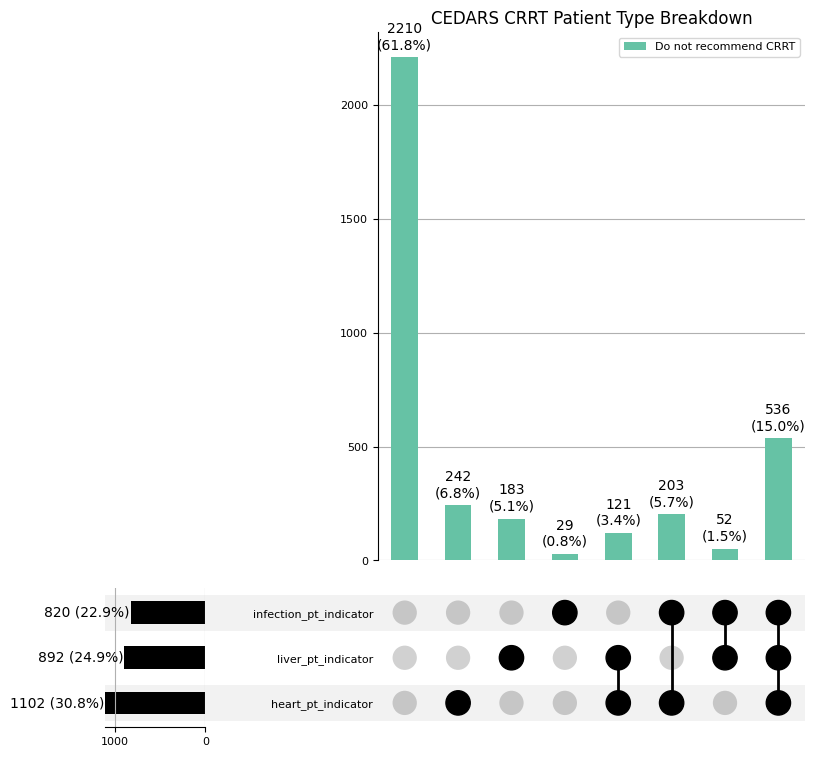

<Figure size 1000x3000 with 0 Axes>

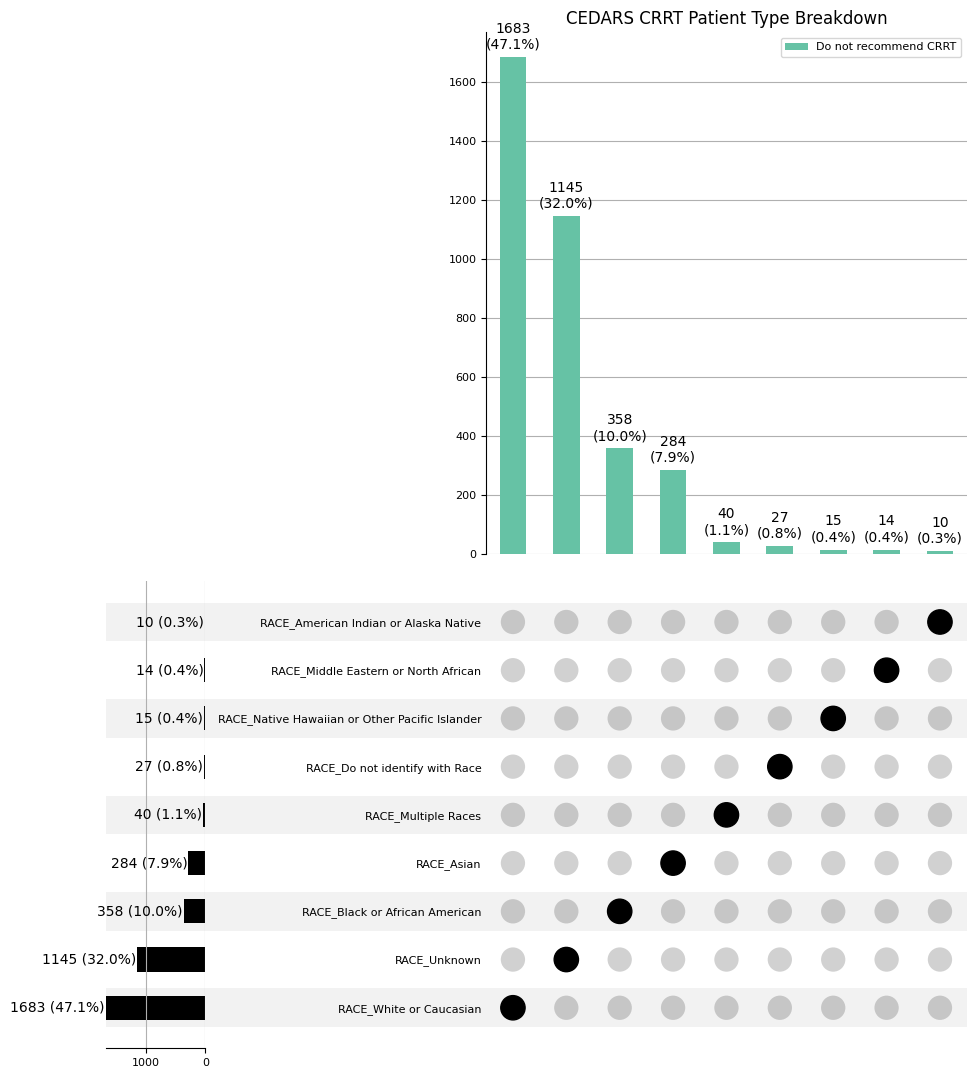

In [9]:
disease_groups =  [f"{name}_pt_indicator" for name in ["heart", "liver", "infection"]]
for columns in [disease_groups, race_cols]:
    plot_upsetplot(preprocessed_df, "CEDARS CRRT", columns)

In [8]:
race_cols = preprocessed_df.columns[preprocessed_df.columns.str.contains("RACE_")].to_list()
race_cols

['RACE_American Indian or Alaska Native',
 'RACE_Asian',
 'RACE_Black or African American',
 'RACE_Multiple Races',
 'RACE_Native Hawaiian or Other Pacific Islander',
 'RACE_Unknown',
 'RACE_White or Caucasian']

<Figure size 1000x3000 with 0 Axes>

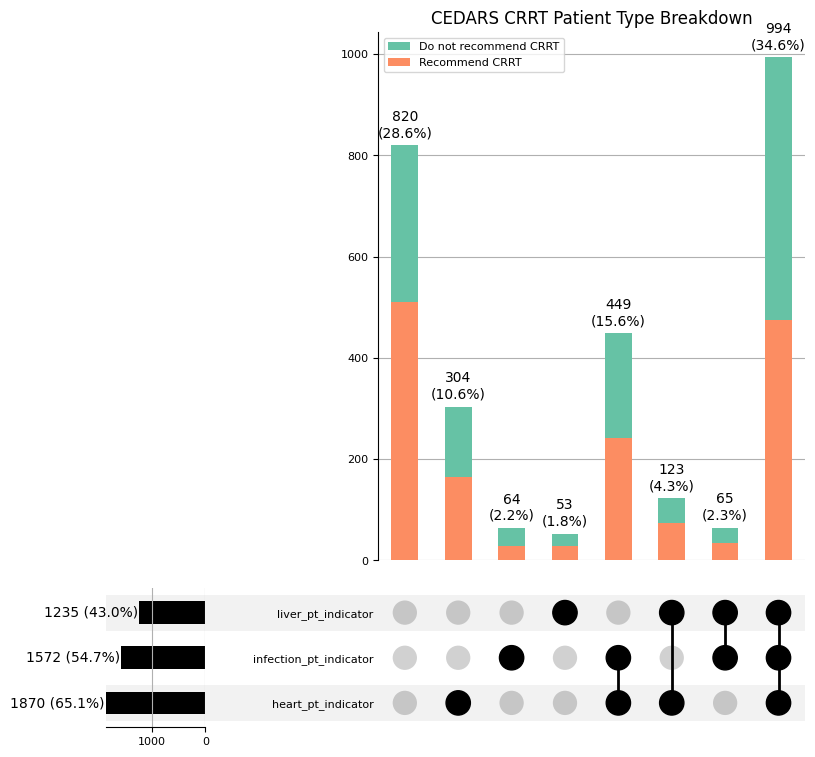

<Figure size 1000x3000 with 0 Axes>

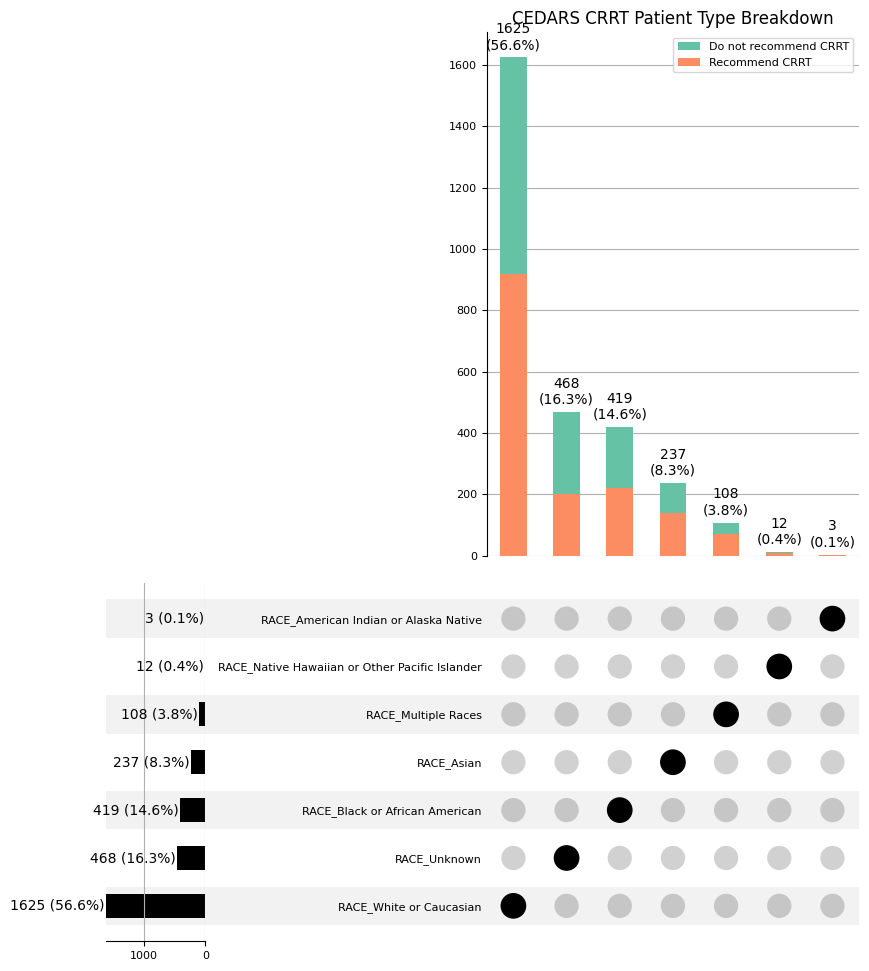

In [9]:
disease_groups =  [f"{name}_pt_indicator" for name in ["heart", "liver", "infection"]]
for columns in [disease_groups, race_cols]:
    plot_upsetplot(preprocessed_df, "CEDARS CRRT", columns)


In [10]:
print(preprocessed_df["recommend_crrt"].value_counts())
print(preprocessed_df["recommend_crrt"].value_counts(normalize=True)*100)

1    1558
0    1314
Name: recommend_crrt, dtype: int64
1    54.247911
0    45.752089
Name: recommend_crrt, dtype: float64


In [11]:
tmp_df = preprocessed_df.drop(preprocessed_df.columns[preprocessed_df.columns.str.contains("^Unnamed")], axis=1)
def print_missing_info(filter = None):
    if filter is not None:
        total_notmissing = sum(~tmp_df[filter].isna().any(axis=1))
    else:
        total_notmissing = sum(~tmp_df.isna().any(axis=1))
    print(f"Number of patients not missing any data: {total_notmissing}, ({total_notmissing/tmp_df.shape[0] * 100}%)")
print("All")
print_missing_info()

All
Number of patients not missing any data: 0, (0.0%)


In [13]:
(tmp_df.drop(["infection_pt_indicator", "liver_pt_indicator", "heart_pt_indicator", "recommend_crrt", "CRRT Year"], axis=1).isna().mean() * 100).sort_values()

amount_missing = tmp_df.drop("recommend_crrt",axis=1).isna().mean().sort_values()
amount_missing.name = "% Missing"
amount_missing.index.name = "Variables"
# (amount_missing*100).to_csv(join("C:/Users/jeffe/OneDrive - UCLA IT Services/UCLA/2023_Winter/Rotation/Data/Cedars", "variables_and_amount_missing.csv"))
amount_missing

Variables
infection_pt_indicator             0.000000
heart_pt_indicator                 0.000000
CRRT Year                          0.000000
Num Prev CRRT Treatments           0.000000
AGE                                0.000000
                                     ...   
LEAD,BLOOD_std                     0.999652
LEAD,BLOOD_len                     0.999652
VARICELLA ZOSTER VIRUS PCR_min     0.999652
STONE WEIGHT-GRAMS_max             0.999652
HERPES SIMPLEX VIRUS 1 IGG_skew    0.999652
Name: % Missing, Length: 3197, dtype: float64

In [14]:
tmp_df[tmp_df.columns[tmp_df.columns.str.contains("_na")]].mean()

dx_CCS_CODE_na     0.980519
pr_CCS_CODE_na     0.672489
CPT_SECTION_na    16.600000
dtype: float64

# Packages

In [ ]:
fuzzywuzzy
jellyfish

# Load for Training/Eval

In [33]:
%reload_ext autoreload
%autoreload 2

import sys
import os
from os import getcwd
from os.path import join
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, join(getcwd(), "../module_code"))
import numpy as np
import data.load
import cli_utils 

sys.argv = [sys.argv[0]]
cli_utils.load_cli_args("../options.yml")
args = cli_utils.init_cli_args()
args.eval_cohort = 'ucla_crrt'
args.max_days_on_crrt= 200
args.min_days_on_crrt= 8

In [39]:
from data.sklearn_loaders import SklearnCRRTDataModule
from exp.static_learning import generate_filters

data = SklearnCRRTDataModule.from_argparse_args(args, filters=generate_filters())

In [40]:
reference_ids = None
original_columns = None
data_transform = None
data.setup(
    args,
    reference_ids=reference_ids,
    reference_cols=original_columns,
    data_transform=data_transform,
)


In [41]:
print(data.train[0].shape)
print(np.unique(data.train[1],return_counts=True))
print(data.val[0].shape)
print(np.unique(data.val[1],return_counts=True))
print(data.test[0].shape)
print(np.unique(data.test[1],return_counts=True))

(930, 7840)
(array([0, 1]), array([399, 531]))
(298, 7840)
(array([0, 1]), array([132, 166]))
(306, 7840)
(array([0, 1]), array([118, 188]))


In [64]:
data.train_filters['White or Caucasian'].value_counts()

True     1400
False    1351
Name: RACE_White or Caucasian, dtype: int64

In [6]:
data.val_filters['White or Caucasian'].value_counts()

False    488
True     424
Name: RACE_White or Caucasian, dtype: int64

In [10]:
data.test_filters['White or Caucasian']

IP_PATIENT_ID                     Start Date
000008E26F8F14E5099662DDB778C698  2009-06-10    False
00000E9A36BEF17ACFB60A48D98B1818  2021-04-01    False
000014471A50BA85E236FC7DDA593FE6  2018-07-31    False
000015CA913525E268FA991FD4AED560  2014-12-20    False
00003FCA905321B0EBB0B71B8714F779  2019-10-07     True
                                                ...  
01749BE3DE9C8083E89554D84D57B239  2009-09-08     True
02654278781F4C7BABA2E65ADE2D2D33  2009-04-07     True
02E498FDEC3F9ED3EE1DC4C68E223BF4  2018-04-28    False
058EC864226D768DF2CD53FDB9EB4E07  2013-05-13    False
094E9A648AD1E5BAEA7AB47AF4788A92  2012-01-23     True
Name: RACE_White or Caucasian, Length: 3576, dtype: bool

In [ ]:
print(data.train[0].shape)
# data.val[0].shape
print(data.test[0].shape)